<a href="https://colab.research.google.com/github/siddharth-gitrepo/AgnosTest/blob/main/OD_Data_Analysis_Grid_Level_1km_category_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check POIs data

In [ ]:
# !pip3 install folium
# !pip3 install geopandas
# !pip3 install osmnx
# !pip3 install contextily
# !pip3 install shapely

In [ ]:
!pip3 install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 MB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 13.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.5-py2.py3-none-any.whl size=317747919 sha256=398b51bb6f3112c9dc6de743d8c03e39dbd9f3e0f9bb46992cbfcfa678be42a2
  Stored in directory: /root/.cache/pip/wheels/0c/7f/b4/0e68c6d8d89d2e582e5498ad88616c16d7c19028680e9d3840
Successfully built pyspark


In [ ]:
# !pip3 install statsmodels

In [ ]:
# !pip3 install keplergl
# !pip3 install datashader
# !pip3 install apache-sedona

In [ ]:
# !pip3 install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
# Program to calculate and plot shortest path by sampling 100 points with an origin point
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point
# import psycopg2
# from psycopg2.extras import execute_values
# from psycopg2 import sql
from shapely import wkb
from shapely.geometry.polygon import Polygon
import numpy as np
import pandas as pd
import datetime
import contextily as ctx
import folium
import math
# import pprint
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Start

In [ ]:
!cp '/content/drive/My Drive/Thesis_Run/transyamuna_trips_formatted_walk.pq' '/content/transyamuna_trips_formatted_walk.pq'

In [ ]:
od_data_df = pd.read_parquet("/content/transyamuna_trips_formatted_walk.pq")
od_data_df.head()

trip_id  \
0  b67c8db9-3bb4-4881-8994-f3d30bdb1d16322   
1    ffb821da-21e0-4866-9c46-fc80efca4f121   
2  995a8a28-2ab9-2d95-99c4-ca9cc7939a04641   
3   0a4ee8ff-298f-2875-9c99-4dcfd44e2df082   
4   86b8225a-40e1-454d-ab14-dd117afeb71130   

                              device_id  start_timestamp start_cell  \
0  b67c8db9-3bb4-4881-8994-f3d30bdb1d16     1.689318e+09    ttnfyyx   
1  ffb821da-21e0-4866-9c46-fc80efca4f12     1.674974e+09    ttngn6z   
2  995a8a28-2ab9-2d95-99c4-ca9cc7939a04     1.674825e+09    ttnfzjh   
3  0a4ee8ff-298f-2875-9c99-4dcfd44e2df0     1.676548e+09    ttnfxqf   
4  86b8225a-40e1-454d-ab14-dd117afeb711     1.673116e+09    ttngpps   

   end_timestamp end_cell  trip_distance_km  trip_duration_hours  \
0     1689324160  ttnfzp1          1.400275             1.600103   
1     1674979749  ttngn3g          0.739250             1.676661   
2     1674829079  ttnfzhu          0.630035             1.120214   
3     1676553902  ttnfxwv          0.756279             1.511930   
4     1673120386  ttngnzn          0.695298             1.335284   

   trip_speed_kmh  trip_observed_speed_kmh home_cell mode_of_transport  \
0        0.875116                 1.881343   ttnfc4d           WALKING   
1        0.440906                 1.153293        \N           WALKING   
2        0.562424                 1.527189        \N           WALKING   
3        0.500208                 1.351037        \N           WALKING   
4        0.520712                 1.349840   ttngpps           WALKING   

                start_location                 end_location  \
0   POINT (77.29979 28.645164)  POINT (77.302257 28.647137)   
1  POINT (77.277695 28.667831)   POINT (77.271955 28.66324)   
2  POINT (77.305859 28.636486)  POINT (77.305321 28.635204)   
3  POINT (77.313919 28.601784)  POINT (77.328674 28.602261)   
4  POINT (77.305794 28.694235)  POINT (77.298416 28.690975)   

                      geometry  
0  POINT (77.302257 28.647137)  
1   POINT (77.271955 28.66324)  
2  POINT (77.305321 28.635204)  
3  POINT (77.328674 28.602261)  
4  POINT (77.298416 28.690975)

In [ ]:
from shapely import wkt
od_data_df["start_location"] = od_data_df["start_location"].apply(wkt.loads)
od_data_df["end_location"] = od_data_df["end_location"].apply(wkt.loads)
od_data_df["geometry"] = od_data_df["geometry"].apply(wkt.loads)

In [ ]:
# Run this: copy to geometry column and set geometry
od_data_df['geometry'] = od_data_df['end_location']
od_data_end_gdf = gpd.GeoDataFrame(od_data_df, geometry='geometry')
od_data_end_gdf.set_crs(epsg=4326, inplace=True)
od_data_end_gdf.head(3)

trip_id  \
0  b67c8db9-3bb4-4881-8994-f3d30bdb1d16322   
1    ffb821da-21e0-4866-9c46-fc80efca4f121   
2  995a8a28-2ab9-2d95-99c4-ca9cc7939a04641   

                              device_id  start_timestamp start_cell  \
0  b67c8db9-3bb4-4881-8994-f3d30bdb1d16     1.689318e+09    ttnfyyx   
1  ffb821da-21e0-4866-9c46-fc80efca4f12     1.674974e+09    ttngn6z   
2  995a8a28-2ab9-2d95-99c4-ca9cc7939a04     1.674825e+09    ttnfzjh   

   end_timestamp end_cell  trip_distance_km  trip_duration_hours  \
0     1689324160  ttnfzp1          1.400275             1.600103   
1     1674979749  ttngn3g          0.739250             1.676661   
2     1674829079  ttnfzhu          0.630035             1.120214   

   trip_speed_kmh  trip_observed_speed_kmh home_cell mode_of_transport  \
0        0.875116                 1.881343   ttnfc4d           WALKING   
1        0.440906                 1.153293        \N           WALKING   
2        0.562424                 1.527189        \N           WALKING   

                start_location                 end_location  \
0   POINT (77.29979 28.645164)  POINT (77.302257 28.647137)   
1  POINT (77.277695 28.667831)   POINT (77.271955 28.66324)   
2  POINT (77.305859 28.636486)  POINT (77.305321 28.635204)   

                    geometry  
0  POINT (77.30226 28.64714)  
1  POINT (77.27196 28.66324)  
2   POINT (77.30532 28.6352)

In [ ]:
od_data_end_gdf.count()

trip_id                    6744955
device_id                  6744955
start_timestamp            6744955
start_cell                 6744955
end_timestamp              6744955
end_cell                   6744955
trip_distance_km           6744955
trip_duration_hours        6744955
trip_speed_kmh             6744955
trip_observed_speed_kmh    6744955
home_cell                  6744955
mode_of_transport          6744955
start_location             6744955
end_location               6744955
geometry                   6744955
dtype: int64

In [ ]:
# END

In [ ]:
# identify outlier points
# plot path from those points to end locations

In [ ]:
# remove points that are not having end points
# how to find out points in end that are not having start points

In [ ]:
center_point = (28.66455, 77.28573)
od_data_end_gdf['trip_id'].count()

np.int64(6744955)

In [ ]:
# Total - in_polygon
8242847 - 8242782

65

In [ ]:
8242847 - 8240610

2237

In [ ]:
# merge + sjoin

In [ ]:
# # points_gdf = od_data_gdf_polygon
# points_gdf = gpd.read_file('./pop_points/population_points.shp')
# polygons_gdf = gpd.read_file('./grid_poly_1km/grid_poly_1km.shp')

In [ ]:
points_gdf

fid      VALUE  area                   geometry
0       290721.0  31.478360   836  POINT (76.84278 28.57778)
1       291804.0  31.478360   836  POINT (76.84361 28.57694)
2       286503.0  31.478360   836  POINT (76.84528 28.58139)
3       293553.0  31.478360   836  POINT (76.84639 28.57556)
4       285721.0  31.478360   836  POINT (76.84750 28.58222)
...          ...        ...   ...                        ...
391048  388203.0  39.691692   836  POINT (77.19028 28.47278)
391049  388903.0  39.691692   836  POINT (77.19167 28.47111)
391050  388902.0  39.691692   836  POINT (77.19056 28.47111)
391051  388900.0  39.691692   836  POINT (77.19000 28.47111)
391052  388784.0  39.691692   836  POINT (77.19000 28.47139)

[391053 rows x 4 columns]

In [ ]:
polygons_gdf

id       left        top      right     bottom  \
0        1.0  76.842778  28.876944  76.851778  28.867944   
1        2.0  76.842778  28.867944  76.851778  28.858944   
2        3.0  76.842778  28.858944  76.851778  28.849944   
3        4.0  76.842778  28.849944  76.851778  28.840944   
4        5.0  76.842778  28.840944  76.851778  28.831944   
...      ...        ...        ...        ...        ...   
2963  2964.0  77.337778  28.444944  77.346778  28.435944   
2964  2965.0  77.337778  28.435944  77.346778  28.426944   
2965  2966.0  77.337778  28.426944  77.346778  28.417944   
2966  2967.0  77.337778  28.417944  77.346778  28.408944   
2967  2968.0  77.337778  28.408944  77.346778  28.399944   

                                               geometry  
0     POLYGON ((76.84278 28.87694, 76.85178 28.87694...  
1     POLYGON ((76.84278 28.86794, 76.85178 28.86794...  
2     POLYGON ((76.84278 28.85894, 76.85178 28.85894...  
3     POLYGON ((76.84278 28.84994, 76.85178 28.84994...  
4     POLYGON ((76.84278 28.84094, 76.85178 28.84094...  
...                                                 ...  
2963  POLYGON ((77.33778 28.44494, 77.34678 28.44494...  
2964  POLYGON ((77.33778 28.43594, 77.34678 28.43594...  
2965  POLYGON ((77.33778 28.42694, 77.34678 28.42694...  
2966  POLYGON ((77.33778 28.41794, 77.34678 28.41794...  
2967  POLYGON ((77.33778 28.40894, 77.34678 28.40894...  

[2968 rows x 6 columns]

In [ ]:
#### START grid + od_data merge ####

<Axes: >

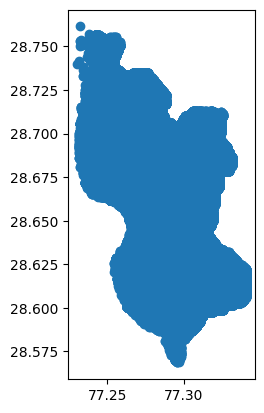

In [ ]:
od_data_end_gdf.plot()

<Axes: >

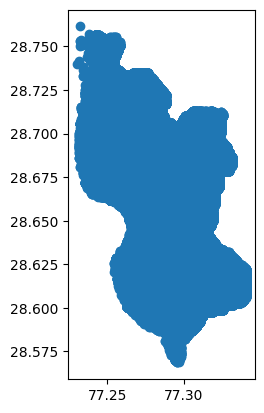

In [ ]:
original need not run
od_data_end_polygon.plot()

In [ ]:
# copy combined_output_poly_centroid_1km for polygons_gdf
# read od_data_gdf_polygon for points_gdf

In [ ]:
!cp '/content/drive/My Drive/Thesis_Run/combined_output_poly_centroid_1km.pq' '/content/combined_output_poly_centroid_1km.pq'

In [ ]:
polygons_gdf = gpd.read_parquet("combined_output_poly_centroid_1km.pq")
polygons_gdf.head(5)

id_polygon                                           geometry   VALUE_sum  \
0           34  POLYGON ((76.84278 28.57994, 76.85178 28.57994...   409.21868   
1           33  POLYGON ((76.84278 28.58894, 76.85178 28.58894...   220.34852   
14          87  POLYGON ((76.85178 28.57994, 76.86078 28.57994...  2675.66060   
26          35  POLYGON ((76.84278 28.57094, 76.85178 28.57094...   220.34852   
33          36  POLYGON ((76.84278 28.56194, 76.85178 28.56194...   566.61048   

                     centroid    grid_id  
0   POINT (76.84728 28.57544)  grid_id_1  
1   POINT (76.84728 28.58444)  grid_id_2  
14  POINT (76.85628 28.57544)  grid_id_3  
26  POINT (76.84728 28.56644)  grid_id_4  
33  POINT (76.84728 28.55744)  grid_id_5

In [ ]:
polygons_gdf.count()

id_polygon    1709
geometry      1709
VALUE_sum     1709
centroid      1709
grid_id       1709
dtype: int64

In [ ]:
# Approach 1 Multiple rows
import geopandas as gpd
from shapely import wkt

# Load the shapefiles
# points_gdf = gpd.read_file('./pop_points/population_points.shp')
points_gdf = od_data_end_gdf # od_data_end_polygon # od_data_gdf_polygon
# polygons_gdf = gpd.read_file('./od_grid/od_grid.shp') # gpd.read_file('./od_grid/od_grid.shp')
# the above is the od_grid independent
# od_data_gdf_polygon

# points_gdf.set_geometry('start_location').rename_geometry('geometry')

# Ensure the coordinate reference systems (CRS) match
points_gdf = points_gdf.to_crs(polygons_gdf.crs)

print(points_gdf.count())
print()
print(polygons_gdf.count())
print(".................")
# Perform spatial join to attach points to polygons
joined_gdf = gpd.sjoin(points_gdf, polygons_gdf, how='inner', predicate='within')

print("joined_gdf=", joined_gdf.count())


trip_id                    6744955
device_id                  6744955
start_timestamp            6744955
start_cell                 6744955
end_timestamp              6744955
end_cell                   6744955
trip_distance_km           6744955
trip_duration_hours        6744955
trip_speed_kmh             6744955
trip_observed_speed_kmh    6744955
home_cell                  6744955
mode_of_transport          6744955
start_location             6744955
end_location               6744955
geometry                   6744955
dtype: int64

id_polygon    1709
geometry      1709
VALUE_sum     1709
centroid      1709
grid_id       1709
dtype: int64
.................
joined_gdf= trip_id                    6735093
device_id                  6735093
start_timestamp            6735093
start_cell                 6735093
end_timestamp              6735093
end_cell                   6735093
trip_distance_km           6735093
trip_duration_hours        6735093
trip_speed_kmh             6735093
trip_obs

In [ ]:
joined_gdf

trip_id  \
0        b67c8db9-3bb4-4881-8994-f3d30bdb1d16322   
1          ffb821da-21e0-4866-9c46-fc80efca4f121   
2        995a8a28-2ab9-2d95-99c4-ca9cc7939a04641   
3         0a4ee8ff-298f-2875-9c99-4dcfd44e2df082   
4         86b8225a-40e1-454d-ab14-dd117afeb71130   
...                                          ...   
8242839   ce8fb580-4d78-4ac5-863d-8c957560ed7861   
8242840  ce8fb580-4d78-4ac5-863d-8c957560ed78151   
8242841  ce8fb580-4d78-4ac5-863d-8c957560ed78226   
8242842    ce9836c8-7204-4fa5-b68a-6084b088c8bb2   
8242843    ce9836c8-7204-4fa5-b68a-6084b088c8bb3   

                                    device_id  start_timestamp start_cell  \
0        b67c8db9-3bb4-4881-8994-f3d30bdb1d16     1.689318e+09    ttnfyyx   
1        ffb821da-21e0-4866-9c46-fc80efca4f12     1.674974e+09    ttngn6z   
2        995a8a28-2ab9-2d95-99c4-ca9cc7939a04     1.674825e+09    ttnfzjh   
3        0a4ee8ff-298f-2875-9c99-4dcfd44e2df0     1.676548e+09    ttnfxqf   
4        86b8225a-40e1-454d-ab14-dd117afeb711     1.673116e+09    ttngpps   
...                                       ...              ...        ...   
8242839  ce8fb580-4d78-4ac5-863d-8c957560ed78     1.673412e+09    ttnfyrj   
8242840  ce8fb580-4d78-4ac5-863d-8c957560ed78     1.674410e+09    ttnfyyq   
8242841  ce8fb580-4d78-4ac5-863d-8c957560ed78     1.675963e+09    ttnfzjb   
8242842  ce9836c8-7204-4fa5-b68a-6084b088c8bb     1.673013e+09    ttnfygq   
8242843  ce9836c8-7204-4fa5-b68a-6084b088c8bb     1.673065e+09    ttnfygy   

         end_timestamp end_cell  trip_distance_km  trip_duration_hours  \
0           1689324160  ttnfzp1          1.400275             1.600103   
1           1674979749  ttngn3g          0.739250             1.676661   
2           1674829079  ttnfzhu          0.630035             1.120214   
3           1676553902  ttnfxwv          0.756279             1.511930   
4           1673120386  ttngnzn          0.695298             1.335284   
...                ...      ...               ...                  ...   
8242839     1673419780  ttnfyqg          0.431000             2.250000   
8242840     1674416650  ttnfyfj          3.721000             1.710000   
8242841     1675966260  ttnfytc          3.064000             0.900000   
8242842     1673018402  ttnfygy          0.498000             1.400000   
8242843     1673068284  ttnfygq          0.226000             0.980000   

         trip_speed_kmh  trip_observed_speed_kmh home_cell mode_of_transport  \
0              0.875116                 1.881343   ttnfc4d           WALKING   
1              0.440906                 1.153293        \N           WALKING   
2              0.562424                 1.527189        \N           WALKING   
3              0.500208                 1.351037        \N           WALKING   
4              0.520712                 1.349840   ttngpps           WALKING   
...                 ...                      ...       ...               ...   
8242839        0.191556                 0.190000   ttnfyyn           WALKING   
8242840        2.176023                 2.170000   ttnfyyn           WALKING   
8242841        3.404444                 3.400000   ttnfyyn           WALKING   
8242842        0.355714                 0.360000        \N           WALKING   
8242843        0.230612                 0.230000        \N           WALKING   

                      start_location                 end_location  \
0         POINT (77.29979 28.645164)  POINT (77.302257 28.647137)   
1        POINT (77.277695 28.667831)   POINT (77.271955 28.66324)   
2        POINT (77.305859 28.636486)  POINT (77.305321 28.635204)   
3        POINT (77.313919 28.601784)  POINT (77.328674 28.602261)   
4        POINT (77.305794 28.694235)  POINT (77.298416 28.690975)   
...                              ...                          ...   
8242839  POINT (77.274403 28.647518)  POINT (77.271071 28.646829)   
8242840    POINT (77.297963 28.6433)   POINT (77.29601 28.619569)   
8242841           PO

In [ ]:
joined_gdf['index_right'].unique()

array([125125, 132561, 125112, 117766, 286517, 128841, 119080, 124314,
       116344, 115873, 117767, 131439, 282261, 287409, 116672, 125938,
       132451, 131845, 132922, 287740, 284328, 118597, 282554, 133067,
       118805, 118794, 125561, 287035, 127856, 133949, 132562, 119011,
       119434, 287247, 115865, 131173, 129655, 293056, 293995, 125132,
       284013, 128848, 116154, 116314, 128168, 119722, 133825, 283462,
       294682, 291815, 131479, 115982, 125993, 286455, 291608, 293098,
       118529, 130319, 128647, 286608, 291851, 285750, 130309, 136176,
       122861, 124731, 297613, 128312, 115893, 118938, 118333, 131132,
       116131, 131541, 117904, 286016, 131133, 126511, 126835, 294827,
       124783, 289443, 118092, 133821, 287612, 118585, 125458, 122478,
       120243, 289536, 123389, 122674, 283139, 282521, 285513, 285705,
       115929, 128640, 133392, 293840, 124373, 128728, 119431, 294658,
       289131, 283086, 285326, 118495, 289444, 118846, 296721, 136252,
      

In [ ]:
joined_gdf['index_right'].value_counts()

index_right
119011    153625
128168    132671
132562    118540
127856    118326
133067    117058
           ...  
45801         12
131055        12
299830        10
127637         2
45481          1
Name: count, Length: 171, dtype: int64

In [ ]:
# points_per_polygon = joined_gdf.groupby('index_right').size()
points_per_polygon = joined_gdf.groupby('index_right').size().reset_index(name='point_count')
points_per_polygon

index_right  point_count
0          45481            1
1          45801           12
2          45802         4064
3          45809         2081
4         115865        58697
..           ...          ...
166       299307          277
167       299337         4212
168       299593         4004
169       299830           10
170       300342           15

[171 rows x 2 columns]

In [ ]:
pop_aggregated = joined_gdf.groupby('index_right')['VALUE_sum'].sum().reset_index()
pop_aggregated

index_right     VALUE_sum
0          45481  1.022823e+03
1          45801  1.028565e+04
2          45802  8.053707e+07
3          45809  2.288131e+07
4         115865  1.353304e+09
..           ...           ...
166       299307  4.745642e+06
167       299337  2.934913e+08
168       299593  5.546789e+07
169       299830  9.002017e+02
170       300342  2.109572e+04

[171 rows x 2 columns]

In [ ]:
unassigned_points = od_data_end_gdf[~od_data_end_gdf.index.isin(joined_gdf.index)]
print(f"Unassigned points count: {len(unassigned_points)}")

Unassigned points count: 9862


<Axes: >

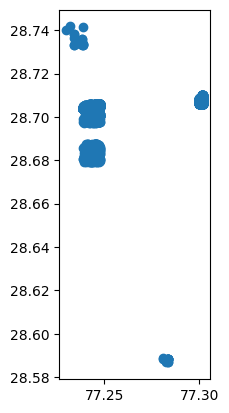

In [ ]:
unassigned_points.plot()

In [ ]:
# # plot on folium
# map_center_location = (28.62944444399997, 77.07227777799999)
# map_5 = folium.Map(location=[map_center_location[0], map_center_location[1]], zoom_start=13)
# unassigned_points.explore(m=map_5, color='red')


In [ ]:
od_data_end_gdf.explore(m=map_5, color='blue') # ran for 20 mins without result

In [ ]:
all_polygons = set(polygons_gdf.index)  # All 1709 polygons
polygons_with_points = set(joined_gdf['index_right'].unique())  # 171 polygons with points

missing_polygons = all_polygons - polygons_with_points  # Polygons that got no points
print(f"Polygons with no points: {len(missing_polygons)}")

Polygons with no points: 1538


In [ ]:
# combined_gdf.explore(m=map_5, color='blue')

<Axes: >

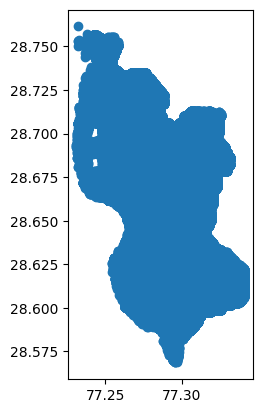

In [ ]:
joined_gdf.plot()

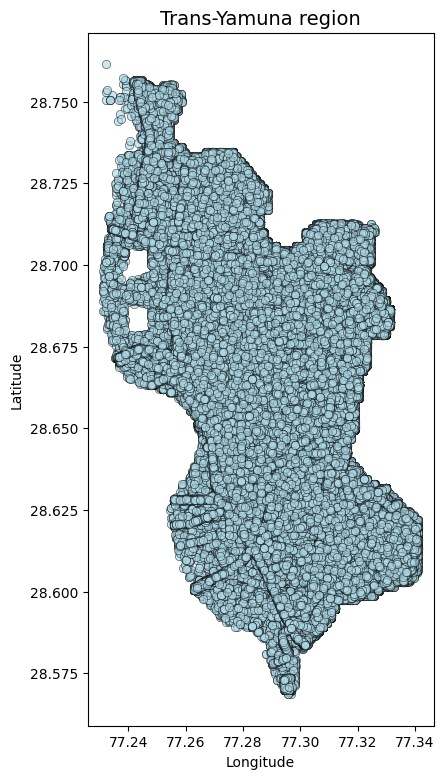

In [ ]:
joined_gdf_uniq = joined_gdf.drop_duplicates(subset="geometry")  # Keep only unique geometries
fig, ax = plt.subplots(figsize=(15, 9))
joined_gdf_uniq.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.6, linewidth=0.5)

# Add titles and labels
ax.set_title("Trans-Yamuna region", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [ ]:
joined_gdf['index_right']

0          125125
1          132561
2          125112
3          117766
4          286517
            ...  
8242839    126511
8242840    116154
8242841    125938
8242842    116344
8242843    116344
Name: index_right, Length: 6735093, dtype: int64

In [ ]:
# Join the polygons with the points, duplicating polygons for each point
combined_gdf = joined_gdf.merge(polygons_gdf, left_on='index_right', right_index=True, suffixes=('_point', '_polygon'))

print("combined_gdf=", combined_gdf.count())


combined_gdf= trip_id                    6735093
device_id                  6735093
start_timestamp            6735093
start_cell                 6735093
end_timestamp              6735093
end_cell                   6735093
trip_distance_km           6735093
trip_duration_hours        6735093
trip_speed_kmh             6735093
trip_observed_speed_kmh    6735093
home_cell                  6735093
mode_of_transport          6735093
start_location             6735093
end_location               6735093
geometry_point             6735093
index_right                6735093
id_polygon_point           6735093
VALUE_sum_point            6735093
centroid_point             6735093
grid_id_point              6735093
id_polygon_polygon         6735093
geometry_polygon           6735093
VALUE_sum_polygon          6735093
centroid_polygon           6735093
grid_id_polygon            6735093
dtype: int64


In [ ]:
# Keep only the necessary columns (including the point geometry)
# combined_gdf = combined_gdf[['geometry_point', 'geometry_polygon', 'id_polygon']]
# 'trip_id', 'device_id', 'start_timestamp', 'start_cell', 'end_timestamp', 'end_cell', 'trip_distance_km', 'trip_duration_hours', 'trip_speed_kmh', 'trip_observed_speed_kmh', 'home_cell',

In [ ]:
type(combined_gdf['geometry_polygon'][0])

shapely.geometry.polygon.Polygon

In [ ]:
# combined_gdf['geometry_point'] = combined_gdf['geometry_point'].apply(wkt.loads)
# combined_gdf['geometry_polygon'] = combined_gdf['geometry_polygon'].apply(wkt.loads)

# combined_gdf['geometry_point'] = combined_gdf['geometry_point'].apply(lambda geom: geom.wkt)
# combined_gdf['geometry_polygon'] = combined_gdf['geometry_polygon'].apply(lambda geom: geom.wkt)
# combined_gdf['fid'] = combined_gdf['fid'].apply(lambda geom: geom.wkt)
# combined_gdf['fid'] = combined_gdf['fid'].astype(int)
combined_gdf['id_polygon_polygon'] = combined_gdf['id_polygon_polygon'].astype(int)

# Rename columns for clarity
combined_gdf.rename(columns={'geometry_point': 'point', 'geometry_polygon': 'geometry'}, inplace=True)

# combined_gdf['geometry'] = combined_gdf['geometry'].apply(wkt.loads)

# Convert back to GeoDataFrame
combined_gdf = gpd.GeoDataFrame(combined_gdf, geometry='geometry')

# Save the combined GeoDataFrame as a new shapefile
# combined_gdf.to_file('combined_output_poly_1km.shp')

print("Done")

Done


In [ ]:
#### START

In [ ]:
combined_gdf.head(3)

trip_id  \
0  b67c8db9-3bb4-4881-8994-f3d30bdb1d16322   
1    ffb821da-21e0-4866-9c46-fc80efca4f121   
2  995a8a28-2ab9-2d95-99c4-ca9cc7939a04641   

                              device_id  start_timestamp start_cell  \
0  b67c8db9-3bb4-4881-8994-f3d30bdb1d16     1.689318e+09    ttnfyyx   
1  ffb821da-21e0-4866-9c46-fc80efca4f12     1.674974e+09    ttngn6z   
2  995a8a28-2ab9-2d95-99c4-ca9cc7939a04     1.674825e+09    ttnfzjh   

   end_timestamp end_cell  trip_distance_km  trip_duration_hours  \
0     1689324160  ttnfzp1          1.400275             1.600103   
1     1674979749  ttngn3g          0.739250             1.676661   
2     1674829079  ttnfzhu          0.630035             1.120214   

   trip_speed_kmh  trip_observed_speed_kmh  ... index_right id_polygon_point  \
0        0.875116                 1.881343  ...      125125             2729   
1        0.440906                 1.153293  ...      132561             2515   
2        0.562424                 1.527189  ...      125112             2730   

  VALUE_sum_point             centroid_point grid_id_point  \
0    12461.666568  POINT (77.30628 28.64744)   grid_id_801   
1    55252.696276  POINT (77.27028 28.66544)   grid_id_837   
2    30439.253892  POINT (77.30628 28.63844)   grid_id_800   

   id_polygon_polygon                                           geometry  \
0                2729  POLYGON ((77.30178 28.65194, 77.31078 28.65194...   
1                2515  POLYGON ((77.26578 28.66994, 77.27478 28.66994...   
2                2730  POLYGON ((77.30178 28.64294, 77.31078 28.64294...   

   VALUE_sum_polygon           centroid_polygon grid_id_polygon  
0       12461.666568  POINT (77.30628 28.64744)     grid_id_801  
1       55252.696276  POINT (77.27028 28.66544)     grid_id_837  
2       30439.253892  POINT (77.30628 28.63844)     grid_id_800  

[3 rows x 25 columns]

In [ ]:
combined_gdf.count()

trip_id                    6735093
device_id                  6735093
start_timestamp            6735093
start_cell                 6735093
end_timestamp              6735093
end_cell                   6735093
trip_distance_km           6735093
trip_duration_hours        6735093
trip_speed_kmh             6735093
trip_observed_speed_kmh    6735093
home_cell                  6735093
mode_of_transport          6735093
start_location             6735093
end_location               6735093
point                      6735093
index_right                6735093
id_polygon_point           6735093
VALUE_sum_point            6735093
centroid_point             6735093
grid_id_point              6735093
id_polygon_polygon         6735093
geometry                   6735093
VALUE_sum_polygon          6735093
centroid_polygon           6735093
grid_id_polygon            6735093
dtype: int64

In [ ]:
points_per_polygon = joined_gdf.groupby('index_right').size().reset_index(name='point_count')

In [ ]:
column_has_none = combined_gdf['geometry'].isna().any()
print("Any None values in 'geometry_point' column:", column_has_none)

Any None values in 'geometry_point' column: False


<Axes: >

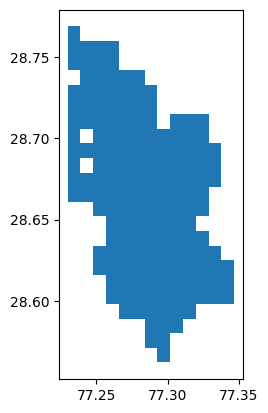

In [ ]:
combined_gdf.plot()

In [ ]:
list(combined_gdf.select_dtypes('geometry'))

['point', 'centroid_point', 'geometry', 'centroid_polygon']

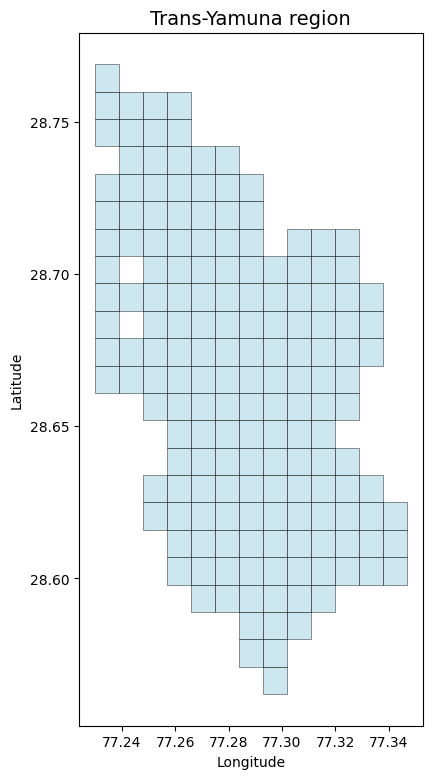

In [ ]:
combined_gdf_uniq = combined_gdf.drop_duplicates(subset="geometry")  # Keep only unique geometries
combined_gdf_uniq.count()

fig, ax = plt.subplots(figsize=(15, 9))
combined_gdf_uniq.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.6, linewidth=0.5)

# Add titles and labels
ax.set_title("Trans-Yamuna region", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [ ]:
combined_gdf_uniq.count()

trip_id                    171
device_id                  171
start_timestamp            171
start_cell                 171
end_timestamp              171
end_cell                   171
trip_distance_km           171
trip_duration_hours        171
trip_speed_kmh             171
trip_observed_speed_kmh    171
home_cell                  171
mode_of_transport          171
start_location             171
end_location               171
point                      171
index_right                171
id_polygon_point           171
VALUE_sum_point            171
centroid_point             171
grid_id_point              171
id_polygon_polygon         171
geometry                   171
VALUE_sum_polygon          171
centroid_polygon           171
grid_id_polygon            171
dtype: int64

In [ ]:
# !pip3 install datashader

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

#### **Projected and actual volume calculation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

96

In [ ]:
MINIMUM_WALKING_DISTANCE = 400

In [ ]:
CATEGORIES = {
'transportation': ["parking", "gas_station", "bus_station", "train_station|subway_station", "taxi_stand", "transit_station", "light_rail_station", "car_rental"],
'food_and_daily': ["bar|restaurant", "bakery", "cafe", "convenience_store|grocery_or_supermarket", "supermarket", "food", "meal_delivery", "meal_takeaway"],
'shopping': ["shopping_mall|department_store", "clothing_store|shoe_store|jewelry_store", "electronics_store", "hardware_store", "furniture_store", "bicycle_store", "store", "florist", "home_goods_store", "pet_store"],
'health': ["doctor|dentist", "hospital", "beauty_salon|hair_care|spa|gym", "drugstore", "pharmacy", "veterinary_care", "physiotherapist", "health"],
'finance': ["atm|bank", "finance"],
'education': ["school|university", "primary_school", "secondary_school"],
'entertainment': ["art_gallery|museum", "book_store", "library", "movie_rental", "movie_theater", "night_club", "bowling_alley"],
'sports': ["stadium", "amusement_park|rv_park|campground|zoo|aquarium", "park"],
'utility': ["laundry", "car_wash", "post_office", "locksmith", "electrician", "plumber", "car_repair"],
'safety': ["fire_station", "police"],
'religion': ["church|hindu_temple|mosque|place_of_worship|synagogue"]
}


In [ ]:
# Read POIs

In [ ]:
!cp -r '/content/drive/My Drive/Thesis_Run/pois_layer_new' '/content/pois_layer_new'

In [ ]:
# load poi data
poi_gdf = gpd.read_file('/content/pois_layer_new/pois_layer_new.shp')

In [ ]:
poi_gdf.loc[:, 'poi_id'] = ['poi_id_' + str(i + 1) for i in range(len(poi_gdf))]

In [ ]:
# import re

# # Ensure both GeoDataFrames are in the same projected CRS (e.g., UTM for meters)
# # pop_gdf = pop_gdf.to_crs(epsg=3857)
# poi_gdf = poi_gdf.to_crs(epsg=3857)

# SP_MAP_DICT = {}
# for category, subCategories in CATEGORIES.items():
#     pattern = '|'.join(map(re.escape, subCategories))
#     # Filter rows where the categories column contains any of the subcategories
#     SP_MAP_DICT[category] = poi_gdf.loc[poi_gdf['categories'].str.contains(pattern, regex=True, na=False)]

In [ ]:
# Ensure both GeoDataFrames are in the same projected CRS (e.g., UTM for meters)
SP_MAP_DICT = {}
for category, subCategories in CATEGORIES.items():

    pattern = '|'.join(subCategories)  # No escaping
    print(f"{category}: {pattern}")  # Debugging output

    # escaped_subcategories = [re.escape(sub) for sub in subCategories]
    # pattern = '|'.join(escaped_subcategories)  # Join with regex OR
    # print(f"{category}: {pattern}")  # Debugging

    # pattern = '|'.join(map(re.escape, subCategories))
    # print(pattern)

    # Filter rows where the categories column contains any of the subcategories
    SP_MAP_DICT[category] = poi_gdf.loc[poi_gdf['categories'].str.contains(pattern, regex=True, na=False)]

transportation: parking|gas_station|bus_station|train_station|subway_station|taxi_stand|transit_station|light_rail_station|car_rental
food_and_daily: bar|restaurant|bakery|cafe|convenience_store|grocery_or_supermarket|supermarket|food|meal_delivery|meal_takeaway
shopping: shopping_mall|department_store|clothing_store|shoe_store|jewelry_store|electronics_store|hardware_store|furniture_store|bicycle_store|store|florist|home_goods_store|pet_store
health: doctor|dentist|hospital|beauty_salon|hair_care|spa|gym|drugstore|pharmacy|veterinary_care|physiotherapist|health
finance: atm|bank|finance
education: school|university|primary_school|secondary_school
entertainment: art_gallery|museum|book_store|library|movie_rental|movie_theater|night_club|bowling_alley
sports: stadium|amusement_park|rv_park|campground|zoo|aquarium|park
utility: laundry|car_wash|post_office|locksmith|electrician|plumber|car_repair
safety: fire_station|police
religion: church|hindu_temple|mosque|place_of_worship|synagogue


In [ ]:
# Load graph

In [ ]:
!cp -r '/content/drive/My Drive/Thesis_Run/delhi_trans_yamuna_graph.graphml' '/content/delhi_trans_yamuna_graph.graphml'

In [ ]:
# G_download
# find center point and radius
# map_center_location = (28.62944444399997, 77.07227777799999)
# G_download = ox.graph_from_point(map_center_location, 28000, network_type='walk', simplify=True)
# 77.19008,28.77645
# 77.35949,28.52944
# G_download = ox.graph_from_bbox((77.19008,28.77645, 77.35949,28.52944), network_type='walk')
G_download = ox.load_graphml('./delhi_trans_yamuna_graph.graphml')

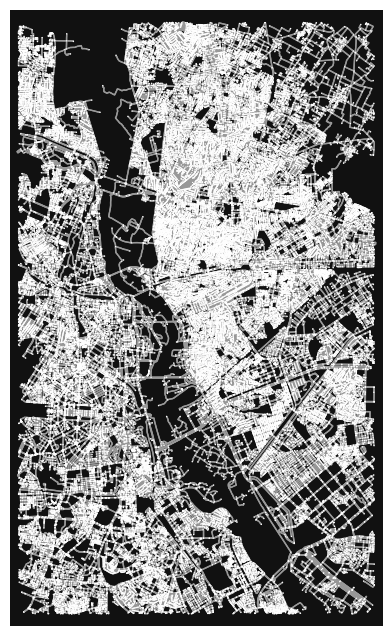

In [ ]:
fig, ax = ox.plot_graph(G_download,node_size=1, show=False, close=False)

In [ ]:
SP_MAP_DICT['transportation']

name                     place_id  \
57      Indian Gas Agency  ChIJn_YrwegPDTkR8TnngEkfuLs   
108            Tuda Mandi  ChIJq5-xGuYPDTkRoTW5Ke1WDt0   
110            Tura Mandi  ChIJoXCcI-YPDTkRlKIThuqrF7E   
305       Deenpur Village  ChIJc8_0dhkQDTkRDWMml44iHEA   
310       Deenpur Village  ChIJcwXudBkQDTkRhfT3-LihFZk   
...                   ...                          ...   
405329     Suvidha Kendra  ChIJUwGGVFQfDTkR0t3jm7uXcRQ   
405511  E-2 Rohini Sec-15  ChIJnZzE3BYBDTkRKrago_Z9SWE   
405535         CNG Refill  ChIJ74_Kj6QBDTkRw0EQ97Vn0oo   
405580     Madhuban Chowk  ChIJsVKbKd8DDTkR39UnoFyvyRo   
405582     Madhuban Chowk  ChIJ7avRPN8DDTkRKNSlhfFrDzw   

                                                  address  \
57      b 64a, Tehsil Road, Naya Bazar, Najafgarh Exte...   
108                                                 India   
110         Roshan Mandi, Masudabad, Najafgarh, New Delhi   
305                                                 India   
310                                                 India   
...                                                   ...   
405329                          A12, Aya Nagar, New Delhi   
405511                                              India   
405535  near Cng Pump, opposite Guru Nanak Dev Campus,...   
405580                                              India   
405582                                              India   

                                             categories             type  \
57          gas_station|point_of_interest|establishment      gas_station   
108     transit_station|point_of_interest|establishment  transit_station   
110     transit_station|point_of_interest|establishment  transit_station   
305     transit_station|point_of_interest|establishment  transit_station   
310     transit_station|point_of_interest|establishment  transit_station   
...                                                 ...              ...   
405329          parking|point_of_interest|establishment          parking   
405511  transit_station|point_of_interest|establishment  transit_station   
405535      gas_station|point_of_interest|establishment      gas_station   
405580  transit_station|point_of_interest|establishment  transit_station   
405582  transit_station|point_of_interest|establishment  transit_station   

                         geometry         poi_id  
57      POINT (76.99201 28.61477)      poi_id_58  
108     POINT (76.99236 28.61251)     poi_id_109  
110     POINT (76.99219 28.61248)     poi_id_111  
305      POINT (76.99214 28.5933)     poi_id_306  
310     POINT (76.99194 28.59339)     poi_id_311  
...                           ...            ...  
405329  POINT (77.12928 28.47746)  poi_id_405330  
405511   POINT (77.1301 28.73762)  poi_id_405512  
405535  POINT (77.13128 28.73403)  poi_id_405536  
405580  POINT (77.13085 28.70408)  poi_id_405581  
405582  POINT (77.13007 28.70459)  poi_id_405583  

[11108 rows x 7 columns]

In [ ]:
len(SP_MAP_DICT['religion'])

18119

In [ ]:
len(combined_gdf['geometry'].unique())

171

In [ ]:
# combined_gdf[['centroid_point', 'centroid_polygon', 'geometry']]

In [ ]:
# combined_gdf_uniq[['point', 'centroid_point', 'centroid_polygon', 'geometry']]

In [ ]:
# population grid data + od data -> uniique (so only 1st record taken) - columns renamed and geometry set to polygon

In [ ]:
# combined_gdf['geometry'] = combined_gdf['centroid_point']
# combined_gdf = combined_gdf.set_geometry('geometry')
# combined_gdf.to_crs(epsg=3857, inplace=True)
pop_gdf = combined_gdf_uniq.copy()
pop_gdf.to_crs(epsg=4326, inplace=True)
pop_gdf["centroid"] = pop_gdf["geometry"].centroid
pop_gdf = pop_gdf.set_geometry('centroid')
pop_gdf.rename(columns={'geometry': 'polygon'}, inplace=True)
pop_gdf.rename(columns={'id_polygon_polygon': 'id_polygon', 'grid_id_polygon':'grid_id', 'VALUE_sum_polygon':'VALUE_sum', 'centroid': 'geometry'}, inplace=True)
pop_gdf = pop_gdf.set_geometry('geometry')
pop_gdf = pop_gdf.drop(columns=['index_right', 'id_polygon_point', 'grid_id_point', 'VALUE_sum_point', 'centroid_point', 'centroid_polygon', 'point'], axis=1)

<ipython-input-50-22e1a41719b0>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pop_gdf["centroid"] = pop_gdf["geometry"].centroid


In [ ]:
pop_gdf

trip_id  \
0        b67c8db9-3bb4-4881-8994-f3d30bdb1d16322   
1          ffb821da-21e0-4866-9c46-fc80efca4f121   
2        995a8a28-2ab9-2d95-99c4-ca9cc7939a04641   
3         0a4ee8ff-298f-2875-9c99-4dcfd44e2df082   
4         86b8225a-40e1-454d-ab14-dd117afeb71130   
...                                          ...   
222825    12ad767e-a395-413d-b243-1bd1f5cb507072   
1294686  04bbc129-0257-2e18-553e-99397d9bfbd3450   
2229269    b196751b-f13d-4839-8b36-77762757c0525   
4372435    ea535096-9523-45fe-b2e8-c99c53c69f6c1   
6599794    0c091f99-7cb4-4fa9-b6ce-7b2874eade299   

                                    device_id  start_timestamp start_cell  \
0        b67c8db9-3bb4-4881-8994-f3d30bdb1d16     1.689318e+09    ttnfyyx   
1        ffb821da-21e0-4866-9c46-fc80efca4f12     1.674974e+09    ttngn6z   
2        995a8a28-2ab9-2d95-99c4-ca9cc7939a04     1.674825e+09    ttnfzjh   
3        0a4ee8ff-298f-2875-9c99-4dcfd44e2df0     1.676548e+09    ttnfxqf   
4        86b8225a-40e1-454d-ab14-dd117afeb711     1.673116e+09    ttngpps   
...                                       ...              ...        ...   
222825   12ad767e-a395-413d-b243-1bd1f5cb5070     1.688314e+09    ttngtbc   
1294686  04bbc129-0257-2e18-553e-99397d9bfbd3     1.676702e+09    ttngjer   
2229269  b196751b-f13d-4839-8b36-77762757c052     1.675597e+09    ttngt96   
4372435  ea535096-9523-45fe-b2e8-c99c53c69f6c     1.674033e+09    ttngjt7   
6599794  0c091f99-7cb4-4fa9-b6ce-7b2874eade29     1.676089e+09    ttngtf9   

         end_timestamp end_cell  trip_distance_km  trip_duration_hours  \
0           1689324160  ttnfzp1          1.400275             1.600103   
1           1674979749  ttngn3g          0.739250             1.676661   
2           1674829079  ttnfzhu          0.630035             1.120214   
3           1676553902  ttnfxwv          0.756279             1.511930   
4           1673120386  ttngnzn          0.695298             1.335284   
...                ...      ...               ...                  ...   
222825      1688321248  ttngtd4          2.108385             1.943077   
1294686     1676704831  ttngje4          0.556662             0.910318   
2229269     1675610789  ttngt97          0.136000             3.790000   
4372435     1674040171  ttngn18          2.881000             1.860000   
6599794     1676091938  ttngt7y          1.605000             0.950000   

         trip_speed_kmh  trip_observed_speed_kmh home_cell mode_of_transport  \
0              0.875116                 1.881343   ttnfc4d           WALKING   
1              0.440906                 1.153293        \N           WALKING   
2              0.562424                 1.527189        \N           WALKING   
3              0.500208                 1.351037        \N           WALKING   
4              0.520712                 1.349840   ttngpps           WALKING   
...                 ...                      ...       ...               ...   
222825         1.085075                 1.563846   ttngtbf           WALKING   
1294686        0.611503                 1.495393        \N           WALKING   
2229269        0.035884                 0.040000        \N           WALKING   
4372435        1.548925                 1.550000        \N           WALKING   
6599794        1.689474                 1.680000        \N           WALKING   

                      start_location                 end_location  id_polygon  \
0         POINT (77.29979 28.645164)  POINT (77.302257 28.647137)        2729   
1        POINT (77.277695 28.667831)   POINT (77.271955 28.66324)        2515   
2        POINT (77.305859 28.636486)  POINT (77.305321 28.635204)        2730   
3        POINT (77.313919 28.601784)  POINT (77.328674 28.602261)        2840   
4        POINT (77.305794 28.694235)  POINT (77.298416 28.690975)        2671   
...                              ...                          ...         ...   
222825    POINT (77.247139 28.74523)  POINT (77.237226 28.751522)        2

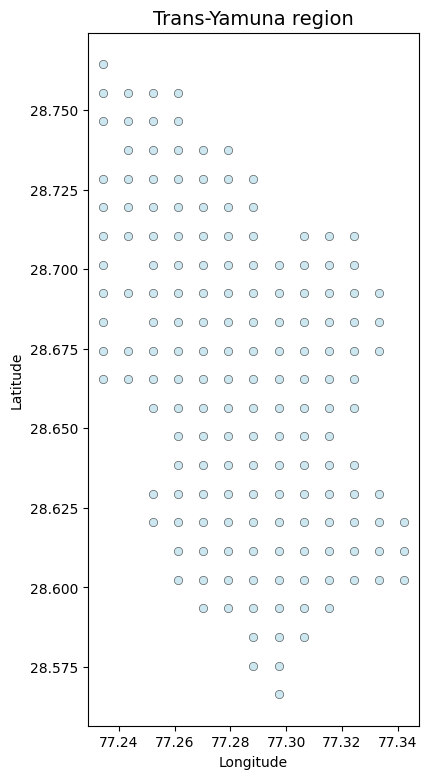

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
pop_gdf.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.6, linewidth=0.5)

# Add titles and labels
ax.set_title("Trans-Yamuna region", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [ ]:
pop_gdf.count()

trip_id                    171
device_id                  171
start_timestamp            171
start_cell                 171
end_timestamp              171
end_cell                   171
trip_distance_km           171
trip_duration_hours        171
trip_speed_kmh             171
trip_observed_speed_kmh    171
home_cell                  171
mode_of_transport          171
start_location             171
end_location               171
id_polygon                 171
polygon                    171
VALUE_sum                  171
grid_id                    171
geometry                   171
dtype: int64

In [ ]:
# store start to end points for each category
SP_MAP_RESULTS_DICT = {}

In [ ]:
# pop_gdf = pop_gdf.to_crs(epsg=3857)
# poi_gdf = poi_gdf.to_crs(epsg=3857)

In [ ]:
# SP_MAP_RESULTS_DICT
# pop_gdf.centroid.buffer(500)
# create function for creating stat-end point map
from shapely.geometry import Point

def create_start_end_point_map(category):
    poi_category_gdf = SP_MAP_DICT[category]

    global pop_gdf
    global poi_gdf

    pop_gdf = pop_gdf.to_crs(epsg=3857)
    poi_gdf = poi_gdf.to_crs(epsg=3857)
    poi_category_gdf = poi_category_gdf.to_crs(epsg=3857)

    # Buffer population points by 500 meters to create a search radius
    pop_gdf['buffer'] = pop_gdf.geometry.buffer(500)
    pop_gdf['id'] = pop_gdf.index

    # Use sjoin to find POIs within the buffer zone
    poi_category_gdf['id'] = poi_category_gdf.index  # Assign unique IDs to POIs
    poi_pop_map = gpd.sjoin(poi_category_gdf, pop_gdf.set_geometry('buffer'), how='inner', predicate='within')
    pop_gdf = pop_gdf.set_geometry('geometry')

    # print(poi_category_gdf)
    # print(poi_pop_map)

    # Format the output
    result = (poi_pop_map.groupby('index_right')
          .agg({'geometry': list, 'id_right': list, 'categories': list})  # Include category in grouping
          .rename(columns={'geometry': 'end', 'id': 'poi_id', 'categories': 'categories'})
          .reset_index()
          .merge(pop_gdf, left_on='index_right', right_index=True)
          .rename(columns={'geometry': 'start'}))

    # print(result)

    result = gpd.GeoDataFrame(result, geometry='start')  # or 'end', depending on your column

    # # Set the CRS of 'result' if it doesn't already have one (use the appropriate EPSG code)
    # result.set_crs('EPSG:3857', allow_override=True, inplace=True)  # if the current CRS is different

    # # Convert CRS to EPSG:4326 (or whatever target CRS you need)
    result = result.to_crs(epsg=4326)

    def transform_end_points(end_points):
        # Convert each point in the list to a GeoSeries and apply to_crs
        return [gpd.GeoSeries([point]).set_crs('EPSG:3857').to_crs(epsg=4326).iloc[0] for point in end_points]

    # Apply the transformation function to the 'end' column
    result['end'] = result['end'].apply(transform_end_points)

    result = result.drop(columns=['index_right', 'id_right', 'id'], axis=1)

    SP_MAP_RESULTS_DICT[category] = result


In [ ]:
import time
for category, subCategories in CATEGORIES.items():
    start_time = time.time()
    create_start_end_point_map(category)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time taken in {category} to filter POIs in 500m and create start to end point map: {elapsed_time:.4f} seconds")

Time taken in transportation to filter POIs in 500m and create start to end point map: 1.3870 seconds
Time taken in food_and_daily to filter POIs in 500m and create start to end point map: 7.8480 seconds
Time taken in shopping to filter POIs in 500m and create start to end point map: 15.0124 seconds
Time taken in health to filter POIs in 500m and create start to end point map: 8.8548 seconds
Time taken in finance to filter POIs in 500m and create start to end point map: 1.0336 seconds
Time taken in education to filter POIs in 500m and create start to end point map: 2.0234 seconds
Time taken in entertainment to filter POIs in 500m and create start to end point map: 0.5399 seconds
Time taken in sports to filter POIs in 500m and create start to end point map: 2.0493 seconds
Time taken in utility to filter POIs in 500m and create start to end point map: 1.5773 seconds
Time taken in safety to filter POIs in 500m and create start to end point map: 0.1408 seconds
Time taken in religion to fil

In [ ]:
import pandas as pd
pd.set_option('display.width', 580)

In [ ]:
SP_MAP_RESULTS_DICT['transportation'][['end']]

end
0    [POINT (77.303487 28.648353999999998), POINT (...
1    [POINT (77.27022609999999 28.663742700000004),...
2    [POINT (77.305266 28.637026999999996), POINT (...
3    [POINT (77.32166899999999 28.599451500000004),...
4    [POINT (77.29590400000001 28.689435999999986),...
..                                                 ...
127                     [POINT (77.271046 28.6144947)]
128  [POINT (77.24783 28.62957), POINT (77.251463 2...
129              [POINT (77.324868 28.63588169999999)]
130  [POINT (77.24848899999998 28.620844999999992),...
131  [POINT (77.232151 28.668492999999987), POINT (...

[132 rows x 1 columns]

In [ ]:
len(SP_MAP_RESULTS_DICT['religion'])

151

In [ ]:
# !pip3 install pyspark

In [ ]:
# SPARK 3 RUN complete
import networkx as nx
import osmnx as ox
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
import time

# Initialize Spark
conf = SparkConf().setAppName("ShortestPathComputation").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)

# Function to check if a path is walkable
def is_walkable(sp_length, threshold=400):
    return sp_length <= threshold

# Function to process each row
def process_row(row_data):
    category, row = row_data  # Extract category and row data

    result_map_all = []
    grid_sp_map = []

    # Convert row from Pandas Series to a dictionary for attribute access
    row = row.to_dict()

    start_point = row['start']
    end_points = row['end']
    grid_id = row['grid_id']
    categories = row['categories']
    pop_sum = row['VALUE_sum']

    start_time = time.time()
    origin_node = ox.distance.nearest_nodes(G_download, start_point.x, start_point.y)
    print(f"Time taken to process start nearest node: {time.time() - start_time:.4f} seconds")

    start_time = time.time()
    subgraph = nx.ego_graph(G_download, origin_node, radius=2000, distance='length')
    print(f"Time taken to process subgraph: {time.time() - start_time:.4f} seconds")

    for target_point in end_points:
        start_time = time.time()
        target_node = ox.distance.nearest_nodes(subgraph, target_point.x, target_point.y)
        print(f"Time taken to process nearest nodes: {time.time() - start_time:.4f} seconds")

        start_time = time.time()
        sp_length = nx.shortest_path_length(subgraph, source=origin_node, target=target_node, weight='length')
        print(f"Time taken to process shortest path: {time.time() - start_time:.4f} seconds")

        walkable = is_walkable(sp_length)

        path_data = {
            "grid_id": grid_id,
            "origin": (start_point.x, start_point.y),
            "target": (target_point.x, target_point.y),
            "sp_length": sp_length,
            "isWalkable": walkable,
            "pop_sum": pop_sum,
            "category": category,
            "categories": categories
        }

        result_map_all.append(path_data)
        grid_sp_map.append(path_data)

    if grid_sp_map:
        min_dict = min(grid_sp_map, key=lambda x: x["sp_length"])
        return [(category, result_map_all, min_dict)]

    return []

# Prepare data for parallelization
data_to_parallelize = [
    (category, row) for category, df in SP_MAP_RESULTS_DICT.items() for _, row in df.iterrows()
]

# Create an RDD from all rows
rdd = sc.parallelize(data_to_parallelize, numSlices=96)  # Adjust `numSlices` based on resources

# Process each row in parallel
result_rdd = rdd.flatMap(process_row)

# Collect results
results = result_rdd.collect()

# Reconstruct SP_CATEGORY_MAP and SP_CATEGORY_MAP_ALL
SP_CATEGORY_MAP_ALL = {}
SP_CATEGORY_MAP = {}

for category, result_map_all, min_dict in results:
    if category not in SP_CATEGORY_MAP_ALL:
        SP_CATEGORY_MAP_ALL[category] = []
    SP_CATEGORY_MAP_ALL[category].extend(result_map_all)

    if category not in SP_CATEGORY_MAP:
        SP_CATEGORY_MAP[category] = []
    SP_CATEGORY_MAP[category].append(min_dict)

# Convert results to Pandas DataFrame
df_all = pd.DataFrame([row for category in SP_CATEGORY_MAP_ALL for row in SP_CATEGORY_MAP_ALL[category]])
df_shortest = pd.DataFrame([row for category in SP_CATEGORY_MAP for row in SP_CATEGORY_MAP[category]])

# Save to CSV
df_all.to_csv("sp_category_map_all_trans.csv", index=False)
df_shortest.to_csv("sp_category_map_trans.csv", index=False)

print("Saved results to CSV successfully.")


Saved results to CSV successfully.


Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
!cp '/content/sp_category_map_all_trans.csv' '/content/drive/My Drive/Thesis_Run/sp_category_map_all_trans.csv'

In [ ]:
!cp '/content/sp_category_map_trans.csv' '/content/drive/My Drive/Thesis_Run/sp_category_map_trans.csv'

In [ ]:
!cp '/content/drive/My Drive/Thesis_Run/sp_category_map_trans.csv' '/content/sp_category_map_trans.csv'

# **Actual Volume (by points in polygon)**

In [ ]:
# count points in each polygon
# try intersects instead of within
#

In [ ]:
# now let's find POINTS in POLYGON
# trans-yamuna polygons and their points

In [ ]:
# points_per_polygon = joined_gdf.groupby('index_right').size().reset_index(name='point_count')
# points_per_polygon

In [ ]:
pop_gdf_pip = combined_gdf.copy()
pop_gdf_pip.to_crs(epsg=4326, inplace=True)
pop_gdf_pip["centroid"] = pop_gdf_pip["geometry"].centroid
# pop_gdf = pop_gdf.set_geometry('centroid')
# pop_gdf.rename(columns={'geometry': 'polygon'}, inplace=True)
pop_gdf_pip.rename(columns={'id_polygon_polygon': 'id_polygon', 'grid_id_polygon':'grid_id', 'VALUE_sum_polygon':'VALUE_sum'}, inplace=True)
pop_gdf_pip = pop_gdf_pip.set_geometry('geometry')
pop_gdf_pip = pop_gdf_pip.drop(columns=['index_right', 'id_polygon_point', 'grid_id_point', 'VALUE_sum_point', 'centroid_point', 'centroid_polygon', 'point'], axis=1)

<ipython-input-58-c0929629be69>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pop_gdf_pip["centroid"] = pop_gdf_pip["geometry"].centroid


In [ ]:
pop_gdf_pip.count()

trip_id                    6735093
device_id                  6735093
start_timestamp            6735093
start_cell                 6735093
end_timestamp              6735093
end_cell                   6735093
trip_distance_km           6735093
trip_duration_hours        6735093
trip_speed_kmh             6735093
trip_observed_speed_kmh    6735093
home_cell                  6735093
mode_of_transport          6735093
start_location             6735093
end_location               6735093
id_polygon                 6735093
geometry                   6735093
VALUE_sum                  6735093
grid_id                    6735093
centroid                   6735093
dtype: int64

In [ ]:
points_per_polygon = pop_gdf_pip.groupby('geometry').size().reset_index(name='point_count')
points_per_polygon

geometry  point_count
0    POLYGON ((77.25678 28.61594, 77.26578 28.61594...          410
1    POLYGON ((77.25678 28.60694, 77.26578 28.60694...         1101
2    POLYGON ((77.28378 28.57994, 77.29278 28.57994...          676
3    POLYGON ((77.28378 28.58894, 77.29278 28.58894...          132
4    POLYGON ((77.27478 28.60694, 77.28378 28.60694...         3158
..                                                 ...          ...
166  POLYGON ((77.31978 28.60694, 77.32878 28.60694...        23357
167  POLYGON ((77.32878 28.60694, 77.33778 28.60694...        23528
168  POLYGON ((77.32878 28.61594, 77.33778 28.61594...        57226
169  POLYGON ((77.33778 28.61594, 77.34678 28.61594...        11337
170  POLYGON ((77.33778 28.60694, 77.34678 28.60694...          846

[171 rows x 2 columns]

In [ ]:
pop_gdf_pip_grouped = (
    pop_gdf_pip.groupby("geometry")
    .size()
    .reset_index(name="point_count")
    .merge(pop_gdf_pip[['geometry', 'grid_id', 'centroid']], on='geometry', how='left')
    .drop_duplicates()
)

pop_gdf_pip_grouped.head()


geometry  point_count      grid_id                   centroid
0     POLYGON ((77.25678 28.61594, 77.26578 28.61594...          410  grid_id_773  POINT (77.26128 28.61144)
410   POLYGON ((77.25678 28.60694, 77.26578 28.60694...         1101  grid_id_738  POINT (77.26128 28.60244)
1511  POLYGON ((77.28378 28.57994, 77.29278 28.57994...          676  grid_id_845  POINT (77.28828 28.57544)
2187  POLYGON ((77.28378 28.58894, 77.29278 28.58894...          132  grid_id_749  POINT (77.28828 28.58444)
2319  POLYGON ((77.27478 28.60694, 77.28378 28.60694...         3158  grid_id_752  POINT (77.27928 28.60244)

In [ ]:
pop_gdf_pip_grouped = (
    pop_gdf_pip.groupby(["geometry", "grid_id", "centroid"])
    .size()
    .reset_index(name="point_count")
)

pop_gdf_pip_grouped.head()


geometry      grid_id                   centroid  point_count
0  POLYGON ((77.25678 28.61594, 77.26578 28.61594...  grid_id_773  POINT (77.26128 28.61144)          410
1  POLYGON ((77.25678 28.60694, 77.26578 28.60694...  grid_id_738  POINT (77.26128 28.60244)         1101
2  POLYGON ((77.28378 28.57994, 77.29278 28.57994...  grid_id_845  POINT (77.28828 28.57544)          676
3  POLYGON ((77.28378 28.58894, 77.29278 28.58894...  grid_id_749  POINT (77.28828 28.58444)          132
4  POLYGON ((77.27478 28.60694, 77.28378 28.60694...  grid_id_752  POINT (77.27928 28.60244)         3158

In [ ]:
len(pop_gdf_pip_grouped)

171

In [ ]:
pop_gdf_pip_grouped['grid_id']

0      grid_id_773
1      grid_id_738
2      grid_id_845
3      grid_id_749
4      grid_id_752
          ...     
166    grid_id_742
167    grid_id_765
168    grid_id_767
169    grid_id_766
170    grid_id_768
Name: grid_id, Length: 171, dtype: object

In [ ]:
points_per_polygon

In [ ]:
pop_gdf_pip_grouped.to_csv('points_per_polygon.csv', index=False)

In [ ]:
!cp '/content/points_per_polygon.csv' '/content/drive/My Drive/Thesis_Run/points_per_polygon.csv'

In [ ]:
points_per_polygon.to_csv('points_per_polygon.csv', index=False)

# **REMAINING => projected volume computation**

In [ ]:
#### REMAINING => projected volume computation

In [ ]:
# read csv sp_category_map for grid to sp map
def readcsv(path):
    df = pd.read_csv(path)
    return df

sp_df = readcsv("/content/sp_category_map_trans.csv")

In [ ]:
sp_df.drop('categories', axis=1)

grid_id                                   origin                                   target    sp_length  isWalkable       pop_sum        category
0      grid_id_801  (77.30627777800001, 28.647444443999966)           (77.30554, 28.650909999999996)   388.547412        True  12461.666568  transportation
1      grid_id_837  (77.27027777800001, 28.665444443999966)  (77.27022609999999, 28.663742700000004)   233.423477        True  55252.696276  transportation
2      grid_id_800  (77.30627777800001, 28.638444443999962)  (77.30812499999999, 28.635917999999993)   940.151076       False  30439.253892  transportation
3      grid_id_742   (77.32427777800002, 28.60244444399997)                   (77.325465, 28.602621)    55.293807        True  19688.072688  transportation
4     grid_id_1391       (77.297277778, 28.692444443999968)  (77.30048029999999, 28.690484699999992)   467.744288       False  67554.706991  transportation
...            ...                                      ...                                      ...          ...         ...           ...             ...
1444   grid_id_810  (77.26127777800001, 28.638444443999962)                  (77.263672, 28.6392689)     0.000000        True   3642.715749        religion
1445  grid_id_1281   (77.23427777799999, 28.68344444399997)   (77.23209199999998, 28.68591999999999)   533.027521       False    315.070602        religion
1446   grid_id_828  (77.23427777799999, 28.665444443999966)  (77.23375279999999, 28.664010199999996)   189.716755        True  17099.468128        religion
1447   grid_id_813   (77.25227777799999, 28.65644444399996)                 (77.2493882, 28.6535891)  1925.965639       False   2419.379864        religion
1448   grid_id_361  (77.23427777799999, 28.764444443999956)         (77.2366212, 28.762676300000003)     0.000000        True   1022.822856        religion

[1449 rows x 7 columns]

In [ ]:
sp_df[sp_df['grid_id']=='grid_id_801']

grid_id                                   origin                                   target   sp_length  isWalkable       pop_sum        category                                         categories
0     grid_id_801  (77.30627777800001, 28.647444443999966)           (77.30554, 28.650909999999996)  388.547412        True  12461.666568  transportation  ['gas_station|point_of_interest|establishment'...
132   grid_id_801  (77.30627777800001, 28.647444443999966)         (77.3065249, 28.649321199999996)  239.151843        True  12461.666568  food_and_daily  ['restaurant|food|point_of_interest|establishm...
281   grid_id_801  (77.30627777800001, 28.647444443999966)  (77.30646549999999, 28.649306799999987)  239.151843        True  12461.666568        shopping  ['pharmacy|health|store|point_of_interest|esta...
430   grid_id_801  (77.30627777800001, 28.647444443999966)          (77.3062858, 28.64947619999999)  239.151843        True  12461.666568          health  ['pharmacy|health|store|point_of_interest|esta...
578   grid_id_801  (77.30627777800001, 28.647444443999966)   (77.30580479999999, 28.64837219999999)  247.556808        True  12461.666568         finance  ['insurance_agency|finance|health|point_of_int...
706   grid_id_801  (77.30627777800001, 28.647444443999966)  (77.30672880000002, 28.647455400000002)    0.000000        True  12461.666568       education  ['university|school|health|point_of_interest|e...
846   grid_id_801  (77.30627777800001, 28.647444443999966)           (77.30469909999998, 28.649915)  472.005091       False  12461.666568   entertainment  ['book_store|point_of_interest|store|establish...
959   grid_id_801  (77.30627777800001, 28.647444443999966)  (77.30694669999998, 28.647588399999997)    0.000000        True  12461.666568          sports  ['parking|point_of_interest|establishment', 'p...
1099  grid_id_801  (77.30627777800001, 28.647444443999966)         (77.3058892, 28.648521600000002)  247.556808        True  12461.666568         utility  ['car_repair|point_of_interest|establishment',...
1234  grid_id_801  (77.30627777800001, 28.647444443999966)  (77.30564449999999, 28.648440799999996)  545.404254       False  12461.666568          safety         ['police|point_of_interest|establishment']
1298  grid_id_801  (77.30627777800001, 28.647444443999966)         (77.3057486, 28.650096399999995)  343.453776        True  12461.666568        religion  ['place_of_worship|point_of_interest|establish...

In [ ]:
# GRID_ARR_len = 171 # pop_gdf['centroid'].values.count

In [ ]:
import pandas as pd
import numpy as np

# Convert 'isWalkable' to 1 (True) or 0 (False)
sp_df['isWalkable'] = sp_df['isWalkable'].astype(int)

# Get the full list of grids (1709 total)
all_grid_ids = [f'grid_id_{i}' for i in range(1, 1710)]  # Ensure all grid IDs exist
categories = sorted(sp_df['category'].unique())  # Get unique categories

# Create an empty DataFrame with all grid_ids and categories
M_df = pd.DataFrame(0, index=all_grid_ids, columns=categories)

# Fill matrix where we have data in sp_df
for (grid_id, category), group in sp_df.groupby(['grid_id', 'category']):
    M_df.at[grid_id, category] = int(group['isWalkable'].max())  # Set 1 if any isWalkable=True

# Convert to NumPy array if needed
M = M_df.values

print("Matrix M:")
M_df  # Print as DataFrame for readability

Matrix M:


education  entertainment  finance  food_and_daily  health  religion  safety  shopping  sports  transportation  utility
grid_id_1             0              0        0               0       0         0       0         0       0               0        0
grid_id_2             0              0        0               0       0         0       0         0       0               0        0
grid_id_3             0              0        0               0       0         0       0         0       0               0        0
grid_id_4             0              0        0               0       0         0       0         0       0               0        0
grid_id_5             0              0        0               0       0         0       0         0       0               0        0
...                 ...            ...      ...             ...     ...       ...     ...       ...     ...             ...      ...
grid_id_1705          0              0        0               0       0         0       0         0       0               0        0
grid_id_1706          0              0        0               0       0         0       0         0       0               0        0
grid_id_1707          0              0        0               0       0         0       0         0       0               0        0
grid_id_1708          0              0        0               0       0         0       0         0       0               0        0
grid_id_1709          0              0        0               0       0         0       0         0       0               0        0

[1709 rows x 11 columns]

In [ ]:
filtered_M_df = M_df[M_df.index.isin(pop_gdf_pip_grouped['grid_id'])]
M_df = filtered_M_df

In [ ]:
# Debugging: Check the number of grids
print(f"Total grids in M_df: {M_df.shape[0]} (should be 1709)")
print(M_df.count())  # Verify counts per category

Total grids in M_df: 171 (should be 1709)
education         171
entertainment     171
finance           171
food_and_daily    171
health            171
religion          171
safety            171
shopping          171
sports            171
transportation    171
utility           171
dtype: int64


In [ ]:
grid_sum = M_df.sum(axis=1).to_frame(name="sum")

# Print result
print("Total walkable SUM of all categories for GRID:\n", grid_sum)

Total walkable SUM of all categories for GRID:
               sum
grid_id_361     1
grid_id_368     0
grid_id_369     8
grid_id_370     5
grid_id_720    10
...           ...
grid_id_1427    0
grid_id_1428    8
grid_id_1429    6
grid_id_1430    0
grid_id_1431    0

[171 rows x 1 columns]


In [ ]:
# Merge population data with grid sum based on grid_id
pop_with_sum = sp_df.merge(grid_sum, left_on="grid_id", right_index=True, how="left")
pop_with_sum

grid_id                                   origin                                   target    sp_length  isWalkable       pop_sum        category                                         categories  sum
0      grid_id_801  (77.30627777800001, 28.647444443999966)           (77.30554, 28.650909999999996)   388.547412           1  12461.666568  transportation  ['gas_station|point_of_interest|establishment'...    9
1      grid_id_837  (77.27027777800001, 28.665444443999966)  (77.27022609999999, 28.663742700000004)   233.423477           1  55252.696276  transportation  ['parking|point_of_interest|establishment', 'p...   11
2      grid_id_800  (77.30627777800001, 28.638444443999962)  (77.30812499999999, 28.635917999999993)   940.151076           0  30439.253892  transportation  ['transit_station|point_of_interest|establishm...    7
3      grid_id_742   (77.32427777800002, 28.60244444399997)                   (77.325465, 28.602621)    55.293807           1  19688.072688  transportation  ['transit_station|point_of_interest|establishm...   10
4     grid_id_1391       (77.297277778, 28.692444443999968)  (77.30048029999999, 28.690484699999992)   467.744288           0  67554.706991  transportation  ['transit_station|point_of_interest|establishm...    8
...            ...                                      ...                                      ...          ...         ...           ...             ...                                                ...  ...
1444   grid_id_810  (77.26127777800001, 28.638444443999962)                  (77.263672, 28.6392689)     0.000000           1   3642.715749        religion  ['hindu_temple|place_of_worship|point_of_inter...    1
1445  grid_id_1281   (77.23427777799999, 28.68344444399997)   (77.23209199999998, 28.68591999999999)   533.027521           0    315.070602        religion  ['place_of_worship|point_of_interest|establish...    0
1446   grid_id_828  (77.23427777799999, 28.665444443999966)  (77.23375279999999, 28.664010199999996)   189.716755           1  17099.468128        religion  ['mosque|place_of_worship|point_of_interest|es...   10
1447   grid_id_813   (77.25227777799999, 28.65644444399996)                 (77.2493882, 28.6535891)  1925.965639           0   2419.379864        religion  ['hindu_temple|place_of_worship|point_of_inter...    0
1448   grid_id_361  (77.23427777799999, 28.764444443999956)         (77.2366212, 28.762676300000003)     0.000000           1   1022.822856        religion  ['hindu_temple|place_of_worship|point_of_inter...    1

[1449 rows x 9 columns]

In [ ]:
pop_truncated_gdf = pop_gdf[['grid_id', 'VALUE_sum']]
pop_with_sum['grid_id'] = pop_with_sum['grid_id'].astype(str)
pop_truncated_gdf['grid_id'] = pop_truncated_gdf['grid_id'].astype(str)

<ipython-input-72-cf7ea3b93370>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_truncated_gdf['grid_id'] = pop_truncated_gdf['grid_id'].astype(str)


In [ ]:
print(pop_with_sum['grid_id'].dtype)
print(pop_truncated_gdf['grid_id'].dtype)

object
object


In [ ]:
# Merge population data with grid sum and sp_df based on grid_id
pop_with_sum = pop_with_sum.merge(pop_truncated_gdf, on="grid_id", how="left")
pop_with_sum

grid_id                                   origin                                   target    sp_length  isWalkable       pop_sum        category                                         categories  sum     VALUE_sum
0      grid_id_801  (77.30627777800001, 28.647444443999966)           (77.30554, 28.650909999999996)   388.547412           1  12461.666568  transportation  ['gas_station|point_of_interest|establishment'...    9  12461.666568
1      grid_id_837  (77.27027777800001, 28.665444443999966)  (77.27022609999999, 28.663742700000004)   233.423477           1  55252.696276  transportation  ['parking|point_of_interest|establishment', 'p...   11  55252.696276
2      grid_id_800  (77.30627777800001, 28.638444443999962)  (77.30812499999999, 28.635917999999993)   940.151076           0  30439.253892  transportation  ['transit_station|point_of_interest|establishm...    7  30439.253892
3      grid_id_742   (77.32427777800002, 28.60244444399997)                   (77.325465, 28.602621)    55.293807           1  19688.072688  transportation  ['transit_station|point_of_interest|establishm...   10  19688.072688
4     grid_id_1391       (77.297277778, 28.692444443999968)  (77.30048029999999, 28.690484699999992)   467.744288           0  67554.706991  transportation  ['transit_station|point_of_interest|establishm...    8  67554.706991
...            ...                                      ...                                      ...          ...         ...           ...             ...                                                ...  ...           ...
1444   grid_id_810  (77.26127777800001, 28.638444443999962)                  (77.263672, 28.6392689)     0.000000           1   3642.715749        religion  ['hindu_temple|place_of_worship|point_of_inter...    1   3642.715749
1445  grid_id_1281   (77.23427777799999, 28.68344444399997)   (77.23209199999998, 28.68591999999999)   533.027521           0    315.070602        religion  ['place_of_worship|point_of_interest|establish...    0    315.070602
1446   grid_id_828  (77.23427777799999, 28.665444443999966)  (77.23375279999999, 28.664010199999996)   189.716755           1  17099.468128        religion  ['mosque|place_of_worship|point_of_interest|es...   10  17099.468128
1447   grid_id_813   (77.25227777799999, 28.65644444399996)                 (77.2493882, 28.6535891)  1925.965639           0   2419.379864        religion  ['hindu_temple|place_of_worship|point_of_inter...    0   2419.379864
1448   grid_id_361  (77.23427777799999, 28.764444443999956)         (77.2366212, 28.762676300000003)     0.000000           1   1022.822856        religion  ['hindu_temple|place_of_worship|point_of_inter...    1   1022.822856

[1449 rows x 10 columns]

In [ ]:
original
# Ensure grid_id matches the format used in M_df and grid_sum
# pop_gdf["grid_id"] = pop_gdf["grid_id"].str.upper().replace("GRID_", "grid_id_", regex=True)

# Merge population data with grid sum based on grid_id
pop_with_sum = pop_gdf.merge(grid_sum, left_on="grid_id", right_index=True, how="left")

pop_with_sum

trip_id                             device_id  start_timestamp start_cell  end_timestamp end_cell  trip_distance_km  trip_duration_hours  trip_speed_kmh  trip_observed_speed_kmh  ...               start_location                 end_location id_polygon                                            polygon     VALUE_sum       grid_id  \
0        b67c8db9-3bb4-4881-8994-f3d30bdb1d16322  b67c8db9-3bb4-4881-8994-f3d30bdb1d16     1.689318e+09    ttnfyyx     1689324160  ttnfzp1          1.400275             1.600103        0.875116                 1.881343  ...   POINT (77.29979 28.645164)  POINT (77.302257 28.647137)       2729  POLYGON ((77.30178 28.65194, 77.31078 28.65194...  12461.666568   grid_id_801   
1          ffb821da-21e0-4866-9c46-fc80efca4f121  ffb821da-21e0-4866-9c46-fc80efca4f12     1.674974e+09    ttngn6z     1674979749  ttngn3g          0.739250             1.676661        0.440906                 1.153293  ...  POINT (77.277695 28.667831)   POINT (77.271955 28.66324)       2515  POLYGON ((77.26578 28.66994, 77.27478 28.66994...  55252.696276   grid_id_837   
2        995a8a28-2ab9-2d95-99c4-ca9cc7939a04641  995a8a28-2ab9-2d95-99c4-ca9cc7939a04     1.674825e+09    ttnfzjh     1674829079  ttnfzhu          0.630035             1.120214        0.562424                 1.527189  ...  POINT (77.305859 28.636486)  POINT (77.305321 28.635204)       2730  POLYGON ((77.30178 28.64294, 77.31078 28.64294...  30439.253892   grid_id_800   
3         0a4ee8ff-298f-2875-9c99-4dcfd44e2df082  0a4ee8ff-298f-2875-9c99-4dcfd44e2df0     1.676548e+09    ttnfxqf     1676553902  ttnfxwv          0.756279             1.511930        0.500208                 1.351037  ...  POINT (77.313919 28.601784)  POINT (77.328674 28.602261)       2840  POLYGON ((77.31978 28.60694, 77.32878 28.60694...  19688.072688   grid_id_742   
4         86b8225a-40e1-454d-ab14-dd117afeb71130  86b8225a-40e1-454d-ab14-dd117afeb711     1.673116e+09    ttngpps     1673120386  ttngnzn          0.695298             1.335284        0.520712                 1.349840  ...  POINT (77.305794 28.694235)  POINT (77.298416 28.690975)       2671  POLYGON ((77.29278 28.69694, 77.30178 28.69694...  67554.706991  grid_id_1391   
...                                          ...                                   ...              ...        ...            ...      ...               ...                  ...             ...                      ...  ...                          ...                          ...        ...                                                ...           ...           ...   
222825    12ad767e-a395-413d-b243-1bd1f5cb507072  12ad767e-a395-413d-b243-1bd1f5cb5070     1.688314e+09    ttngtbc     1688321248  ttngtd4          2.108385             1.943077        1.085075                 1.563846  ...   POINT (77.247139 28.74523)  POINT (77.237226 28.751522)       2293  POLYGON ((77.22978 28.75994, 77.23878 28.75994...    857.137314   grid_id_368   
1294686  04bbc129-0257-2e18-553e-99397d9bfbd3450  04bbc129-0257-2e18-553e-99397d9bfbd3     1.676702e+09    ttngjer     1676704831  ttngje4          0.556662             0.910318        0.611503                 1.495393  ...  POINT (77.244278 28.670816)  POINT (77.236771 28.669287)       2303  POLYGON ((77.22978 28.66994, 77.23878 28.66994...  17099.468128   grid_id_828   
2229269    b196751b-f13d-4839-8b36-77762757c0525  b196751b-f13d-4839-8b36-77762757c052     1.675597e+09    ttngt96     1675610789  ttngt97          0.136000             3.790000        0.035884                 0.040000  ...   POINT (77.23727 28.747629)   POINT (77.23864 28.747648)       2294  POLYGON ((77.22978 28.75094, 77.23878 28.75094...     90.020172  grid_id_1430   
4372435    ea535096-9523-45fe-b2e8-c99c53c69f6c1  ea535096-9523-45fe-b2e8-c99c53c69f6c     1.674033e+09    ttngjt7     1674040171  ttngn18          2.881000             1.860000        1.548925                 1.550000  ...   POINT (77.239037 28.68198)  POINT (77.256053 28.660876)       241

In [ ]:
# Multiply population sum with category sum
pop_with_sum["product"] = pop_with_sum["VALUE_sum"] * pop_with_sum["sum"]

# Format the product column for readability
pop_with_sum["max_volume"] = pop_with_sum["product"].apply(lambda x: f"{x:,.2f}")

# Create DataFrame for output
grid_pop_product = pop_with_sum[["grid_id", "max_volume"]].set_index("grid_id")
grid_pop_product = grid_pop_product.reset_index() # otherwise grid_id remains as index and not column

# Print result
print(grid_pop_product)

           grid_id  max_volume
0      grid_id_801  112,155.00
1      grid_id_837  607,779.66
2      grid_id_800  213,074.78
3      grid_id_742  196,880.73
4     grid_id_1391  540,437.66
...            ...         ...
1444   grid_id_810    3,642.72
1445  grid_id_1281        0.00
1446   grid_id_828  170,994.68
1447   grid_id_813        0.00
1448   grid_id_361    1,022.82

[1449 rows x 2 columns]


In [ ]:
grid_pop_product

In [ ]:
pop_with_sum

In [ ]:
grid_pop_product.to_csv('grid_pop_product_trans.csv', index=False)

In [ ]:
!cp '/content/grid_pop_product_trans.csv' '/content/drive/My Drive/Thesis_Run/grid_pop_product_trans.csv'

In [ ]:
pop_with_sum[pop_with_sum['grid_id']=='grid_id_801']

grid_id                                   origin                                   target   sp_length  isWalkable       pop_sum        category                                         categories  sum     VALUE_sum        product  max_volume
0     grid_id_801  (77.30627777800001, 28.647444443999966)           (77.30554, 28.650909999999996)  388.547412           1  12461.666568  transportation  ['gas_station|point_of_interest|establishment'...    9  12461.666568  112154.999112  112,155.00
132   grid_id_801  (77.30627777800001, 28.647444443999966)         (77.3065249, 28.649321199999996)  239.151843           1  12461.666568  food_and_daily  ['restaurant|food|point_of_interest|establishm...    9  12461.666568  112154.999112  112,155.00
281   grid_id_801  (77.30627777800001, 28.647444443999966)  (77.30646549999999, 28.649306799999987)  239.151843           1  12461.666568        shopping  ['pharmacy|health|store|point_of_interest|esta...    9  12461.666568  112154.999112  112,155.00
430   grid_id_801  (77.30627777800001, 28.647444443999966)          (77.3062858, 28.64947619999999)  239.151843           1  12461.666568          health  ['pharmacy|health|store|point_of_interest|esta...    9  12461.666568  112154.999112  112,155.00
578   grid_id_801  (77.30627777800001, 28.647444443999966)   (77.30580479999999, 28.64837219999999)  247.556808           1  12461.666568         finance  ['insurance_agency|finance|health|point_of_int...    9  12461.666568  112154.999112  112,155.00
706   grid_id_801  (77.30627777800001, 28.647444443999966)  (77.30672880000002, 28.647455400000002)    0.000000           1  12461.666568       education  ['university|school|health|point_of_interest|e...    9  12461.666568  112154.999112  112,155.00
846   grid_id_801  (77.30627777800001, 28.647444443999966)           (77.30469909999998, 28.649915)  472.005091           0  12461.666568   entertainment  ['book_store|point_of_interest|store|establish...    9  12461.666568  112154.999112  112,155.00
959   grid_id_801  (77.30627777800001, 28.647444443999966)  (77.30694669999998, 28.647588399999997)    0.000000           1  12461.666568          sports  ['parking|point_of_interest|establishment', 'p...    9  12461.666568  112154.999112  112,155.00
1099  grid_id_801  (77.30627777800001, 28.647444443999966)         (77.3058892, 28.648521600000002)  247.556808           1  12461.666568         utility  ['car_repair|point_of_interest|establishment',...    9  12461.666568  112154.999112  112,155.00
1234  grid_id_801  (77.30627777800001, 28.647444443999966)  (77.30564449999999, 28.648440799999996)  545.404254           0  12461.666568          safety         ['police|point_of_interest|establishment']    9  12461.666568  112154.999112  112,155.00
1298  grid_id_801  (77.30627777800001, 28.647444443999966)         (77.3057486, 28.650096399999995)  343.453776           1  12461.666568        religion  ['place_of_worship|point_of_interest|establish...    9  12461.666568  112154.999112  112,155.00

In [ ]:
# grid_pop_product = grid_pop_product.merge(pop_with_sum, on="grid_id", how="left")
# grid_pop_product

In [ ]:
pop_gdf_pip_grouped

geometry      grid_id                   centroid  point_count
0    POLYGON ((77.25678 28.61594, 77.26578 28.61594...  grid_id_773  POINT (77.26128 28.61144)          410
1    POLYGON ((77.25678 28.60694, 77.26578 28.60694...  grid_id_738  POINT (77.26128 28.60244)         1101
2    POLYGON ((77.28378 28.57994, 77.29278 28.57994...  grid_id_845  POINT (77.28828 28.57544)          676
3    POLYGON ((77.28378 28.58894, 77.29278 28.58894...  grid_id_749  POINT (77.28828 28.58444)          132
4    POLYGON ((77.27478 28.60694, 77.28378 28.60694...  grid_id_752  POINT (77.27928 28.60244)         3158
..                                                 ...          ...                        ...          ...
166  POLYGON ((77.31978 28.60694, 77.32878 28.60694...  grid_id_742  POINT (77.32428 28.60244)        23357
167  POLYGON ((77.32878 28.60694, 77.33778 28.60694...  grid_id_765  POINT (77.33328 28.60244)        23528
168  POLYGON ((77.32878 28.61594, 77.33778 28.61594...  grid_id_767  POINT (77.33328 28.61144)        57226
169  POLYGON ((77.33778 28.61594, 77.34678 28.61594...  grid_id_766  POINT (77.34228 28.61144)        11337
170  POLYGON ((77.33778 28.60694, 77.34678 28.60694...  grid_id_768  POINT (77.34228 28.60244)          846

[171 rows x 4 columns]

In [ ]:
# there were 1246 rows in pop_with_sum, 171 in pop_gdf_pip_grouped and output is 1259 in merged_gdf because: 1246 + (171-158=13) = 1259
# total grids are 171 in pop_gdf_pip_grouped with all having OD point_count
# for 1246 rows in pop_with_sum, there are only 158 grids covered, remaining 13 are not there becoz: there are no POIs present

## Merged gdf

In [ ]:
merged_gdf = pop_gdf_pip_grouped.merge(pop_with_sum, on="grid_id", how="left")
merged_gdf

geometry      grid_id                   centroid  point_count                                   origin                                   target   sp_length  isWalkable      pop_sum        category                                         categories  sum    VALUE_sum       product max_volume
0     POLYGON ((77.25678 28.61594, 77.26578 28.61594...  grid_id_773  POINT (77.26128 28.61144)          410  (77.26127777800001, 28.611444443999964)         (77.2593765, 28.613910399999988)    0.000000         1.0   192.794368         utility     ['car_repair|point_of_interest|establishment']  1.0   192.794368    192.794368     192.79
1     POLYGON ((77.25678 28.60694, 77.26578 28.60694...  grid_id_738  POINT (77.26128 28.60244)         1101   (77.26127777800001, 28.60244444399997)   (77.26040679999998, 28.60037409999999)    0.000000         1.0  2547.349684  food_and_daily  ['cafe|food|point_of_interest|store|establishm...  4.0  2547.349684  10189.398736  10,189.40
2     POLYGON ((77.25678 28.60694, 77.26578 28.60694...  grid_id_738  POINT (77.26128 28.60244)         1101   (77.26127777800001, 28.60244444399997)   (77.26040679999998, 28.60037409999999)    0.000000         1.0  2547.349684        shopping  ['cafe|food|point_of_interest|store|establishm...  4.0  2547.349684  10189.398736  10,189.40
3     POLYGON ((77.25678 28.60694, 77.26578 28.60694...  grid_id_738  POINT (77.26128 28.60244)         1101   (77.26127777800001, 28.60244444399997)         (77.2652614, 28.601822899999995)  355.227123         1.0  2547.349684         finance    ['atm|finance|point_of_interest|establishment']  4.0  2547.349684  10189.398736  10,189.40
4     POLYGON ((77.25678 28.60694, 77.26578 28.60694...  grid_id_738  POINT (77.26128 28.60244)         1101   (77.26127777800001, 28.60244444399997)  (77.25948549999998, 28.599555200000005)    0.000000         1.0  2547.349684        religion  ['hindu_temple|place_of_worship|point_of_inter...  4.0  2547.349684  10189.398736  10,189.40
...                                                 ...          ...                        ...          ...                                      ...                                      ...         ...         ...          ...             ...                                                ...  ...          ...           ...        ...
1453  POLYGON ((77.33778 28.61594, 77.34678 28.61594...  grid_id_766  POINT (77.34228 28.61144)        11337       (77.342277778, 28.611444443999964)         (77.3428515, 28.611255399999994)   98.182546         1.0  7771.607640          sports  ['park|premise|point_of_interest|establishment...  6.0  7771.607640  46629.645840  46,629.65
1454  POLYGON ((77.33778 28.61594, 77.34678 28.61594...  grid_id_766  POINT (77.34228 28.61144)        11337       (77.342277778, 28.611444443999964)         (77.3416458, 28.614347000000002)  702.307212         0.0  7771.607640         utility  ['electrician|point_of_interest|establishment'...  6.0  7771.607640  46629.645840  46,629.65
1455  POLYGON ((77.33778 28.61594, 77.34678 28.61594...  grid_id_766  POINT (77.34228 28.61144)        11337       (77.342277778, 28.611444443999964)         (77.3416087, 28.611511900000007)  432.901588         0.0  7771.607640          safety  ['police|point_of_interest|establishment', 'po...  6.0  7771.607640  46629.645840  46,629.65
1456  POLYGON ((77.33778 28.61594, 77.34678 28.61594...  grid_id_766  POINT (77.34228 28.61144)        11337       (77.342277778, 28.611444443999964)                 (77.3421993, 28.6106806)  348.539263         1.0  7771.607640        religion  ['hindu_temple|place_of_worship|point_of_inter...  6.0  7771.607640  46629.645840  46,629.65
1457  POLYGON ((77.33778 28.60694, 77.34678 28.60694...  grid_id_768  POINT (77.34228 28.60244)          846                                      NaN                                      NaN         NaN         NaN          NaN             NaN                                                NaN  NaN          NaN           NaN   

In [ ]:
# merged_gdf = pop_gdf_pip_grouped.merge(grid_pop_product, on="grid_id", how="left")
# merged_gdf

In [ ]:
original
merged_gdf.head()

geometry  point_count  \
0  POLYGON ((77.25678 28.61594, 77.26578 28.61594...          410   
1  POLYGON ((77.25678 28.60694, 77.26578 28.60694...         1101   
2  POLYGON ((77.28378 28.57994, 77.29278 28.57994...          676   
3  POLYGON ((77.28378 28.58894, 77.29278 28.58894...          132   
4  POLYGON ((77.27478 28.60694, 77.28378 28.60694...         3158   

       grid_id                   centroid max_volume  
0  grid_id_773  POINT (77.26128 28.61144)     192.79  
1  grid_id_738  POINT (77.26128 28.60244)   7,642.05  
2  grid_id_845  POINT (77.28828 28.57544)  24,132.79  
3  grid_id_749  POINT (77.28828 28.58444)       0.00  
4  grid_id_752  POINT (77.27928 28.60244)   8,361.29

In [ ]:
merged_gdf['grid_id'] = merged_gdf['grid_id'].astype(str)

In [ ]:
merged_gdf["max_volume"] = merged_gdf["max_volume"].astype(str).str.replace(",", "").astype(float)
# merged_gdf.drop(columns=["max_volume_x", "max_volume_y"], inplace=True)

In [ ]:
# merged_gdf["point_count"] = merged_gdf["point_count"].astype(str).str.replace(",", "").astype(float)
merged_gdf["point_count"] = merged_gdf["point_count"].astype(int)

In [ ]:
merged_gdf['sum'].head(10)

0    1.0
1    4.0
2    4.0
3    4.0
4    4.0
5    8.0
6    8.0
7    8.0
8    8.0
9    8.0
Name: sum, dtype: float64

In [ ]:
### START for relation analysis

In [ ]:
# merged_gdf.drop_duplicates(subset=['grid_id'], inplace=True)
# cannot do this becoz for each category the grids are repeated

In [ ]:
merged_gdf.count()

geometry       1458
grid_id        1458
centroid       1458
point_count    1458
origin         1449
target         1449
sp_length      1449
isWalkable     1449
pop_sum        1449
category       1449
categories     1449
sum            1449
VALUE_sum      1449
product        1449
max_volume     1449
dtype: int64

In [ ]:
# Alternative for same result as above
# merged_gdf_1 = pop_gdf_pip_grouped.merge(grid_pop_product, on="grid_id", how="left")
# merged_gdf_1.drop_duplicates(subset="grid_id", inplace=True)
# merged_gdf_1[['max_volume']] = merged_gdf_1[['max_volume']].fillna(0)
# merged_gdf_1["max_volume"] = merged_gdf_1["max_volume"].astype(str).str.replace(",", "").astype(float)

In [ ]:
# DONE 1.

In [ ]:
# now group category
# then find R2, correlation, plot
# no need for na
# only for 0

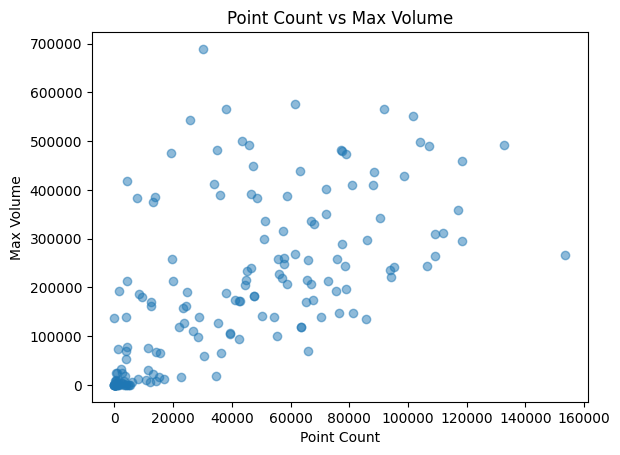

In [ ]:
original
import matplotlib.pyplot as plt

plt.scatter(merged_gdf["point_count"], merged_gdf["max_volume"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Point Count vs Max Volume")
plt.show()


### Merged gdf group by category



In [ ]:
grouped_filtered = merged_gdf.groupby('grid_id').agg({
    'geometry': 'first',
    'centroid': 'first',
    'origin': 'first',
    'point_count': 'first',
    'VALUE_sum': 'first',
    'max_volume': 'first',
    'sum': 'first',
    'category': lambda x: list(set(x.unique())),  # List of unique categories (remove .unique() if you want duplicates)
})

# Reset index if needed
grouped_filtered = grouped_filtered.reset_index()

# Make it a GeoDataFrame (optional)
grouped_filtered = gpd.GeoDataFrame(grouped_filtered, geometry='geometry', crs=4326)

# Check result
grouped_filtered.head()

grid_id                                           geometry                   centroid                                   origin  point_count    VALUE_sum  max_volume  sum                                      category
0  grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...  POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)          103  1305.292494     1305.29  1.0                  [health, religion, shopping]
1  grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...  POINT (77.23428 28.72844)                                     None           69          NaN         NaN  NaN                                         [nan]
2  grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...  POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)          125   135.030258        0.00  0.0                                      [sports]
3  grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...  POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)         2409   810.181548     3240.73  4.0  [health, food_and_daily, religion, shopping]
4  grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)   (77.23427777799999, 28.68344444399997)          160   315.070602        0.00  0.0                                    [religion]

In [ ]:
# Set numeric columns to 0 where NaN
grouped_filtered[['max_volume', 'sum', 'VALUE_sum']] = grouped_filtered[['max_volume', 'sum', 'VALUE_sum']].fillna(0)

# Replace [nan] in 'category' with []
def clean_category(val):
    if isinstance(val, list) and all(pd.isna(x) for x in val):
        return []
    return val

grouped_filtered['category'] = grouped_filtered['category'].apply(clean_category)

In [ ]:
grouped_filtered

grid_id                                           geometry                   centroid                                   origin  point_count     VALUE_sum  max_volume   sum                                           category
0    grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...  POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)          103   1305.292494     1305.29   1.0                       [health, religion, shopping]
1    grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...  POINT (77.23428 28.72844)                                     None           69      0.000000        0.00   0.0                                                 []
2    grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...  POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)          125    135.030258        0.00   0.0                                           [sports]
3    grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...  POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)         2409    810.181548     3240.73   4.0       [health, food_and_daily, religion, shopping]
4    grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)   (77.23427777799999, 28.68344444399997)          160    315.070602        0.00   0.0                                         [religion]
..            ...                                                ...                        ...                                      ...          ...           ...         ...   ...                                                ...
166   grid_id_843  POLYGON ((77.28378 28.68794, 77.29278 28.68794...  POINT (77.28828 28.68344)        (77.288277778, 28.68344444399997)        77358  47958.383851   527542.22  11.0  [shopping, utility, food_and_daily, religion, ...
167   grid_id_844  POLYGON ((77.29278 28.68794, 77.30178 28.68794...  POINT (77.29728 28.68344)        (77.297277778, 28.68344444399997)        66937  42006.003127   420060.03  10.0  [shopping, utility, food_and_daily, religion, ...
168   grid_id_845  POLYGON ((77.28378 28.57994, 77.29278 28.57994...  POINT (77.28828 28.57544)        (77.288277778, 28.57544444399996)          676   4022.131080    32177.05   8.0  [shopping, utility, food_and_daily, religion, ...
169   grid_id_846  POLYGON ((77.29278 28.57994, 77.30178 28.57994...  POINT (77.29728 28.57544)                                     None         3112      0.000000        0.00   0.0                                                 []
170   grid_id_859  POLYGON ((77.29278 28.57094, 77.30178 28.57094...  POINT (77.29728 28.56644)        (77.297277778, 28.56644444399997)          511   1541.816914     3083.63   2.0  [shopping, food_and_daily, religion, health, s...

[171 rows x 9 columns]

In [ ]:
import pandas as pd

# Calculate correlation
correlation = grouped_filtered[['max_volume', 'point_count']].corr()
correlation

max_volume  point_count
max_volume     1.000000     0.635094
point_count    0.635094     1.000000

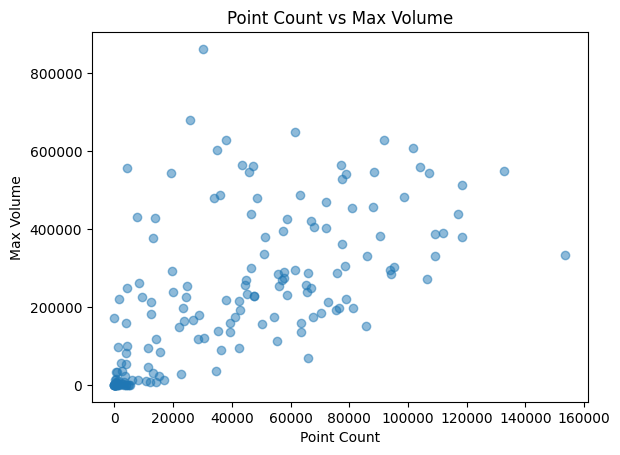

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(grouped_filtered["point_count"], grouped_filtered["max_volume"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Point Count vs Max Volume")
plt.show()

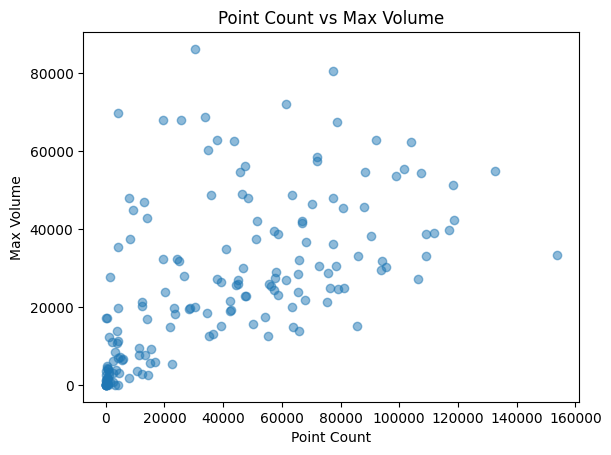

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(grouped_filtered["point_count"], grouped_filtered["VALUE_sum"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Point Count vs Max Volume")
plt.show()

In [ ]:
# for below first nan were removed and this filtered gdf was then grouped
# rather than this we should group and then filter

In [ ]:
import numpy as np
import statsmodels.api as sm

X = grouped_filtered["max_volume"]
y = grouped_filtered["point_count"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            point_count   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     114.2
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.07e-20
Time:                        15:36:11   Log-Likelihood:                -1992.2
No. Observations:                 171   AIC:                             3988.
Df Residuals:                     169   BIC:                             3995.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.338e+04   3237.724      4.132      0.000    6986.011    1.98e+04
max_volume     0.1165      0.011     10.689      0.000       0.095       0.138
==============================================================================
Omnibus:                        6.613   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                7.848
Skew:                           0.277   Prob(JB):                       0.0198
Kurtosis:                       3.891   Cond. No.                     4.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import numpy as np
import statsmodels.api as sm

X = grouped_filtered["VALUE_sum"]
y = grouped_filtered["point_count"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            point_count   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     89.20
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           2.88e-17
Time:                        15:36:11   Log-Likelihood:                -2000.1
No. Observations:                 171   AIC:                             4004.
Df Residuals:                     169   BIC:                             4011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.292e+04   3585.691      3.603      0.000    5841.293       2e+04
VALUE_sum      1.0374      0.110      9.445      0.000       0.821       1.254
==============================================================================
Omnibus:                        7.979   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.291
Skew:                           0.409   Prob(JB):                       0.0158
Kurtosis:                       3.703   Cond. No.                     5.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Log values

In [ ]:
# updated_grid['max_volume']
grouped_filtered["log_max_volume"] = np.log1p(grouped_filtered["max_volume"])  # log1p handles 0s safely
grouped_filtered.loc[grouped_filtered["max_volume"] == 0, "log_max_volume"] = 1

In [ ]:
# updated_grid['point_count']
grouped_filtered["log_point_count"] = np.log1p(grouped_filtered["point_count"])  # log1p handles 0s safely
grouped_filtered.loc[grouped_filtered["point_count"] == 0, "log_point_count"] = 1

In [ ]:
# updated_grid['VALUE_sum']
grouped_filtered["log_VALUE_sum"] = np.log1p(grouped_filtered["VALUE_sum"])  # log1p handles 0s safely
grouped_filtered.loc[grouped_filtered["VALUE_sum"] == 0, "log_VALUE_sum"] = 1

In [ ]:
!pip3 install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import statsmodels.api as sm

X = grouped_filtered["log_max_volume"]
y = grouped_filtered["log_point_count"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_point_count   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     224.8
Date:                Thu, 01 May 2025   Prob (F-statistic):           7.27e-33
Time:                        12:10:37   Log-Likelihood:                -316.31
No. Observations:                 171   AIC:                             636.6
Df Residuals:                     169   BIC:                             642.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.6070      0.343     13.445      0.000       3.931       5.283
log_max_volume     0.4598      0.031     14.994      0.000       0.399       0.520
==============================================================================
Omnibus:                       69.510   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.314
Skew:                          -1.556   Prob(JB):                     2.97e-57
Kurtosis:                       8.182   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
import statsmodels.api as sm

X = grouped_filtered["log_VALUE_sum"]
y = grouped_filtered["log_point_count"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_point_count   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     209.2
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.25e-31
Time:                        12:10:39   Log-Likelihood:                -319.77
No. Observations:                 171   AIC:                             643.5
Df Residuals:                     169   BIC:                             649.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5652      0.490      5.239      0.000       1.599       3.532
log_VALUE_sum     0.7440      0.051     14.464      0.000       0.642       0.846
==============================================================================
Omnibus:                       83.918   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.162
Skew:                          -1.830   Prob(JB):                     1.55e-86
Kurtosis:                       9.485   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. With categories

In [ ]:
# 3. filter categories - DONE

In [ ]:
# Use merged_gdf it containns all rows category wise
# Or use filtered_gdf_0 it has nan set to 0

In [ ]:
# 3. filter categories
# Define your categories to filter for
categories_of_interest = ['food_and_daily', 'shopping', 'transportation', 'shopping', 'finance', 'health', 'finance', 'education', 'entertainment', 'sports', 'utility', 'safety', 'religion']

# Filter where any category in the list exists in the row's 'category' field
grouped_filtered_cat = grouped_filtered[grouped_filtered['category'].apply(lambda x: any(cat in x for cat in categories_of_interest))]

In [ ]:
grouped_filtered_cat

grid_id                                           geometry  \
0    grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...   
2    grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...   
3    grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...   
5    grid_id_1282  POLYGON ((77.22978 28.67894, 77.23878 28.67894...   
6    grid_id_1373  POLYGON ((77.25678 28.68794, 77.26578 28.68794...   
..            ...                                                ...   
165   grid_id_842  POLYGON ((77.27478 28.68794, 77.28378 28.68794...   
166   grid_id_843  POLYGON ((77.28378 28.68794, 77.29278 28.68794...   
167   grid_id_844  POLYGON ((77.29278 28.68794, 77.30178 28.68794...   
168   grid_id_845  POLYGON ((77.28378 28.57994, 77.29278 28.57994...   
170   grid_id_859  POLYGON ((77.29278 28.57094, 77.30178 28.57094...   

                      centroid                                   origin  \
0    POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)   
2    POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)   
3    POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)   
5    POINT (77.23428 28.67444)   (77.23427777799999, 28.67444444399997)   
6    POINT (77.26128 28.68344)   (77.26127777800001, 28.68344444399997)   
..                         ...                                      ...   
165  POINT (77.27928 28.68344)   (77.27927777799998, 28.68344444399997)   
166  POINT (77.28828 28.68344)        (77.288277778, 28.68344444399997)   
167  POINT (77.29728 28.68344)        (77.297277778, 28.68344444399997)   
168  POINT (77.28828 28.57544)        (77.288277778, 28.57544444399996)   
170  POINT (77.29728 28.56644)        (77.297277778, 28.56644444399997)   

     point_count     VALUE_sum  max_volume   sum  \
0            103   1305.292494        0.00   0.0   
2            125    135.030258        0.00   0.0   
3           2409    810.181548     2430.54   3.0   
5           3434   3721.962357    18609.81   5.0   
6          58733  38739.415671   387394.16  10.0   
..           ...           ...         ...   ...   
165        80779  45500.879088   409507.91   9.0   
166        77358  47958.383851   479583.84  10.0   
167        66937  42006.003127   336048.03   8.0   
168          676   4022.131080    24132.79   6.0   
170          511   1541.816914     1541.82   1.0   

                                              category  
0                                   [health, shopping]  
2                                             [sports]  
3                   [health, food_and_daily, shopping]  
5    [health, food_and_daily, shopping, entertainme...  
6    [transportation, health, utility, entertainmen...  
..                                                 ...  
165  [transportation, health, utility, entertainmen...  
166  [transportation, health, utility, entertainmen...  
167  [transportation, health, utility, entertainmen...  
168  [health, utility, food_and_daily, shopping, en...  
170         [sports, health, food_and_daily, shopping]  

[158 rows x 9 columns]

In [ ]:
### There are ssome rows without any category

In [ ]:
import numpy as np
import statsmodels.api as sm

X = grouped_filtered_cat["point_count"]
y = grouped_filtered_cat["max_volume"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             max_volume   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     87.07
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           9.98e-17
Time:                        13:18:54   Log-Likelihood:                -2089.1
No. Observations:                 158   AIC:                             4182.
Df Residuals:                     156   BIC:                             4188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.462e+04   1.67e+04      5.064      0.000    5.16e+04    1.18e+05
point_count     2.8110      0.301      9.331      0.000       2.216       3.406
==============================================================================
Omnibus:                       36.150   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.270
Skew:                           1.252   Prob(JB):                     2.71e-12
Kurtosis:                       4.351   Cond. No.                     8.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

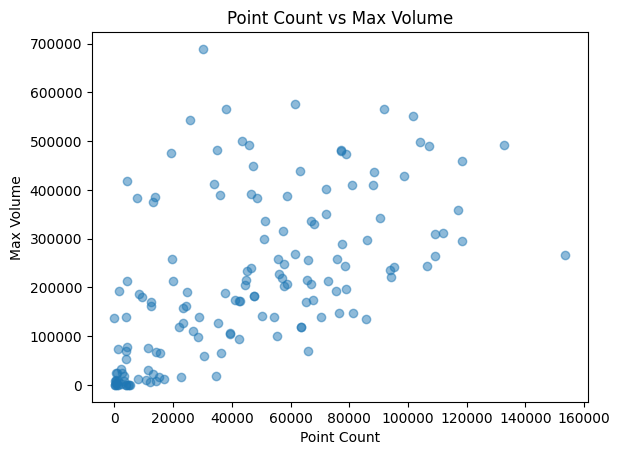

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(grouped_filtered_cat["point_count"], grouped_filtered_cat["max_volume"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Point Count vs Max Volume")
plt.show()

### 4. Outlier points

In [ ]:
# 4. outlier points - DONE
# filter where ratio > 0.5

In [ ]:
# ratio of max_volume/point_count
merged_gdf["ratio"] = merged_gdf["max_volume"] / merged_gdf["point_count"]

In [ ]:
# To check outlier points, set nan to 0 and group on category column: becoz max_volume is same in a grid, for each category
# then filter by max_volume value

In [ ]:
import statsmodels.api as sm

outllier_gdf = grouped_filtered.copy()

X = outllier_gdf['point_count']
y = outllier_gdf['max_volume']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get standardized residuals
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

# Flag outliers: abs(std_residual) > 2 (typical threshold)
outllier_gdf['std_residual'] = standardized_residuals
outliers = outllier_gdf[abs(outllier_gdf['std_residual']) > 2]
outliers

grid_id                                           geometry  \
13   grid_id_1380  POLYGON ((77.26578 28.69694, 77.27478 28.69694...   
20   grid_id_1387  POLYGON ((77.31978 28.70594, 77.32878 28.70594...   
21   grid_id_1388  POLYGON ((77.31078 28.70594, 77.31978 28.70594...   
27   grid_id_1394  POLYGON ((77.29278 28.70594, 77.30178 28.70594...   
33   grid_id_1400  POLYGON ((77.24778 28.71494, 77.25678 28.71494...   
35   grid_id_1402  POLYGON ((77.28378 28.72394, 77.29278 28.72394...   
41   grid_id_1408  POLYGON ((77.27478 28.72394, 77.28378 28.72394...   
46   grid_id_1413  POLYGON ((77.24778 28.72394, 77.25678 28.72394...   
48   grid_id_1415  POLYGON ((77.25678 28.73294, 77.26578 28.73294...   
49   grid_id_1416  POLYGON ((77.26578 28.73294, 77.27478 28.73294...   
52   grid_id_1419  POLYGON ((77.27478 28.73294, 77.28378 28.73294...   
61   grid_id_1428  POLYGON ((77.24778 28.75094, 77.25678 28.75094...   
103   grid_id_763  POLYGON ((77.27478 28.63394, 77.28378 28.63394...   

                      centroid                                   origin  \
13   POINT (77.27028 28.69244)  (77.27027777800001, 28.692444443999968)   
20   POINT (77.32428 28.70144)  (77.32427777800002, 28.701444443999964)   
21   POINT (77.31528 28.70144)       (77.315277778, 28.701444443999964)   
27   POINT (77.29728 28.70144)       (77.297277778, 28.701444443999964)   
33   POINT (77.25228 28.71044)   (77.25227777799999, 28.71044444399997)   
35   POINT (77.28828 28.71944)       (77.288277778, 28.719444443999965)   
41   POINT (77.27928 28.71944)  (77.27927777799998, 28.719444443999965)   
46   POINT (77.25228 28.71944)  (77.25227777799999, 28.719444443999965)   
48   POINT (77.26128 28.72844)  (77.26127777800001, 28.728444443999962)   
49   POINT (77.27028 28.72844)  (77.27027777800001, 28.728444443999962)   
52   POINT (77.27928 28.72844)  (77.27927777799998, 28.728444443999962)   
61   POINT (77.25228 28.74644)  (77.25227777799999, 28.746444443999966)   
103  POINT (77.27928 28.62944)  (77.27927777799998, 28.629444443999976)   

     point_count     VALUE_sum  max_volume  sum  \
13         61566  72109.011348   576872.09  8.0   
20         13097  46942.889223   375543.11  8.0   
21         34809  60126.325304   481010.60  8.0   
27         45847  54619.393614   491574.54  9.0   
33         43613  62561.165799   500489.33  8.0   
35          7833  47944.821375   383558.57  8.0   
41         37944  62903.605644   566132.45  9.0   
46         13950  42825.605097   385430.45  9.0   
48         25611  67889.867067   543118.94  8.0   
49         30293  86172.825618   689382.60  8.0   
52         19397  67889.867067   475229.07  7.0   
61          4212  69679.807065   418078.84  6.0   
103       153625  33288.386058   266307.09  8.0   

                                              category  std_residual  
13   [transportation, health, utility, entertainmen...      2.461287  
20   [transportation, health, utility, entertainmen...      2.036685  
21   [transportation, health, utility, food_and_dai...      2.340905  
27   [transportation, health, utility, entertainmen...      2.167837  
33   [transportation, health, utility, entertainmen...      2.287334  
35   [transportation, health, utility, entertainmen...      2.220967  
41   [transportation, health, utility, entertainmen...      2.919920  
46   [transportation, health, utility, entertainmen...      2.092581  
48   [transportation, health, utility, entertainmen...      3.028926  
49   [transportation, health, utility, entertainmen...      4.039676  
52   [transportation, health, utility, entertainmen...      2.653606  
61   [health, utility, entertainment, education, fo...      2.570604  
103  [transportation, health, utility, entertainmen...     -2.099130

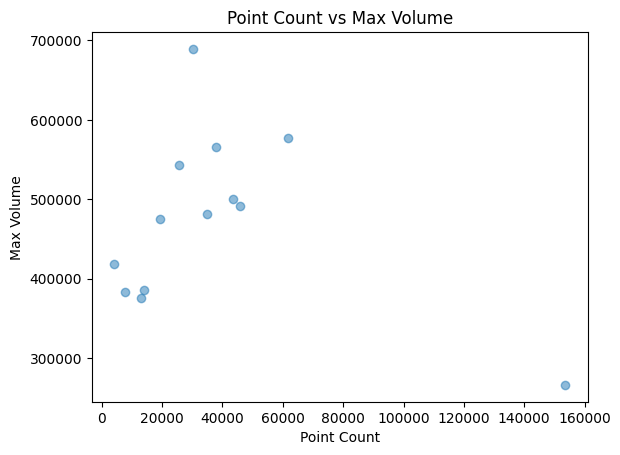

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(outliers["point_count"], outliers["max_volume"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Point Count vs Max Volume")
plt.show()

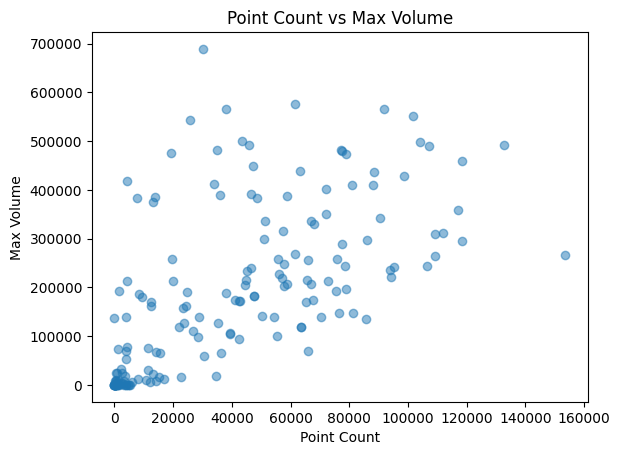

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(grouped_filtered["point_count"], grouped_filtered["max_volume"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Point Count vs Max Volume")
plt.show()

In [ ]:
grouped_filtered['ratio'] = grouped_filtered['max_volume'] / grouped_filtered['point_count']
outliers_ratio = grouped_filtered[grouped_filtered['ratio'] > grouped_filtered['ratio'].quantile(0.99)]
outliers_ratio

grid_id                                           geometry                   centroid                                   origin  point_count     VALUE_sum  max_volume  sum                                           category         ratio
50   grid_id_1417  POLYGON ((77.25678 28.74194, 77.26578 28.74194...  POINT (77.26128 28.73744)  (77.26127777800001, 28.737444443999966)         1551  27616.217112   220929.74  8.0  [education, utility, health, shopping, food_an...    142.443417
151   grid_id_828  POLYGON ((77.22978 28.66994, 77.23878 28.66994...  POINT (77.23428 28.66544)  (77.23427777799999, 28.665444443999966)           12  17099.468128   153895.21  9.0  [education, utility, health, shopping, food_an...  12824.600833

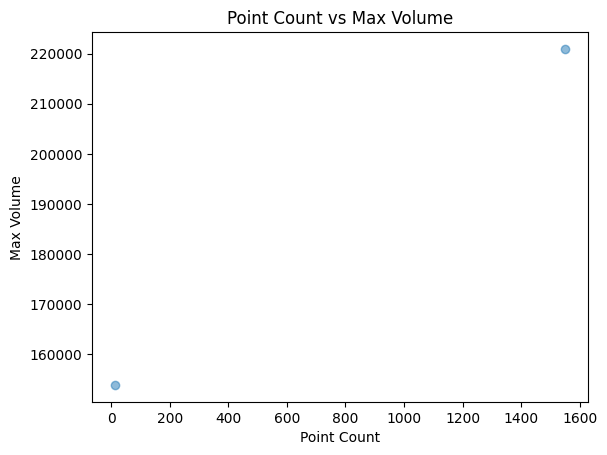

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(outliers_ratio["point_count"], outliers_ratio["max_volume"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Point Count vs Max Volume")
plt.show()

In [ ]:
# IQR method
Q1 = grouped_filtered['ratio'].quantile(0.25)
Q3 = grouped_filtered['ratio'].quantile(0.75)
IQR = Q3 - Q1

outliers_ratio_iqr = grouped_filtered[(grouped_filtered['ratio'] < Q1 - 1.5 * IQR) | (grouped_filtered['ratio'] > Q3 + 1.5 * IQR)]
outliers_ratio_iqr

grid_id                                           geometry  \
20   grid_id_1387  POLYGON ((77.31978 28.70594, 77.32878 28.70594...   
35   grid_id_1402  POLYGON ((77.28378 28.72394, 77.29278 28.72394...   
36   grid_id_1403  POLYGON ((77.31078 28.71494, 77.31978 28.71494...   
37   grid_id_1404  POLYGON ((77.31978 28.71494, 77.32878 28.71494...   
41   grid_id_1408  POLYGON ((77.27478 28.72394, 77.28378 28.72394...   
46   grid_id_1413  POLYGON ((77.24778 28.72394, 77.25678 28.72394...   
48   grid_id_1415  POLYGON ((77.25678 28.73294, 77.26578 28.73294...   
49   grid_id_1416  POLYGON ((77.26578 28.73294, 77.27478 28.73294...   
50   grid_id_1417  POLYGON ((77.25678 28.74194, 77.26578 28.74194...   
52   grid_id_1419  POLYGON ((77.27478 28.73294, 77.28378 28.73294...   
55   grid_id_1422  POLYGON ((77.28378 28.73294, 77.29278 28.73294...   
57   grid_id_1424  POLYGON ((77.27478 28.74194, 77.28378 28.74194...   
58   grid_id_1425  POLYGON ((77.24778 28.74194, 77.25678 28.74194...   
61   grid_id_1428  POLYGON ((77.24778 28.75094, 77.25678 28.75094...   
62   grid_id_1429  POLYGON ((77.23878 28.75094, 77.24778 28.75094...   
67    grid_id_369  POLYGON ((77.23878 28.75994, 77.24778 28.75994...   
68    grid_id_370  POLYGON ((77.24778 28.75994, 77.25678 28.75994...   
90    grid_id_750  POLYGON ((77.27478 28.59794, 77.28378 28.59794...   
110   grid_id_770  POLYGON ((77.33778 28.62494, 77.34678 28.62494...   
113   grid_id_776  POLYGON ((77.24778 28.62494, 77.25678 28.62494...   
120   grid_id_794  POLYGON ((77.24778 28.63394, 77.25678 28.63394...   
151   grid_id_828  POLYGON ((77.22978 28.66994, 77.23878 28.66994...   
168   grid_id_845  POLYGON ((77.28378 28.57994, 77.29278 28.57994...   

                      centroid                                   origin  \
20   POINT (77.32428 28.70144)  (77.32427777800002, 28.701444443999964)   
35   POINT (77.28828 28.71944)       (77.288277778, 28.719444443999965)   
36   POINT (77.31528 28.71044)        (77.315277778, 28.71044444399997)   
37   POINT (77.32428 28.71044)   (77.32427777800002, 28.71044444399997)   
41   POINT (77.27928 28.71944)  (77.27927777799998, 28.719444443999965)   
46   POINT (77.25228 28.71944)  (77.25227777799999, 28.719444443999965)   
48   POINT (77.26128 28.72844)  (77.26127777800001, 28.728444443999962)   
49   POINT (77.27028 28.72844)  (77.27027777800001, 28.728444443999962)   
50   POINT (77.26128 28.73744)  (77.26127777800001, 28.737444443999966)   
52   POINT (77.27928 28.72844)  (77.27927777799998, 28.728444443999962)   
55   POINT (77.28828 28.72844)       (77.288277778, 28.728444443999962)   
57   POINT (77.27928 28.73744)  (77.27927777799998, 28.737444443999966)   
58   POINT (77.25228 28.73744)  (77.25227777799999, 28.737444443999966)   
61   POINT (77.25228 28.74644)  (77.25227777799999, 28.746444443999966)   
62   POINT (77.24328 28.74644)  (77.24327777799999, 28.746444443999966)   
67   POINT (77.24328 28.75544)  (77.24327777799999, 28.755444443999963)   
68   POINT (77.25228 28.75544)  (77.25227777799999, 28.755444443999963)   
90   POINT (77.27928 28.59344)  (77.27927777799998, 28.593444443999978)   
110  POINT (77.34228 28.62044)        (77.342277778, 28.62044444399997)   
113  POINT (77.25228 28.62044)   (77.25227777799999, 28.62044444399997)   
120  POINT (77.25228 28.62944)  (77.25227777799999, 28.629444443999976)   
151  POINT (77.23428 28.66544)  (77.23427777799999, 28.665444443999966)   
168  POINT (77.28828 28.57544)        (77.288277778, 28.57544444399996)   

     point_count     VALUE_sum  max_volume  sum  \
20         13097  46942.889223   375543.11  8.0   
35          7833  47944.821375   383558.57  8.0   
36          8308  37455.743632   187278.72  5.0   
37          4194  35484.388704   212906.33  6.0   
41         37944  62903.605644   566132.45  9.0   
46         13950  42825.605097   385430.45  9.0   
48         25611  67889.867067   543118.94  8.0   
49         30293  86172.825618   689382.60  8.0   
50          1551  276

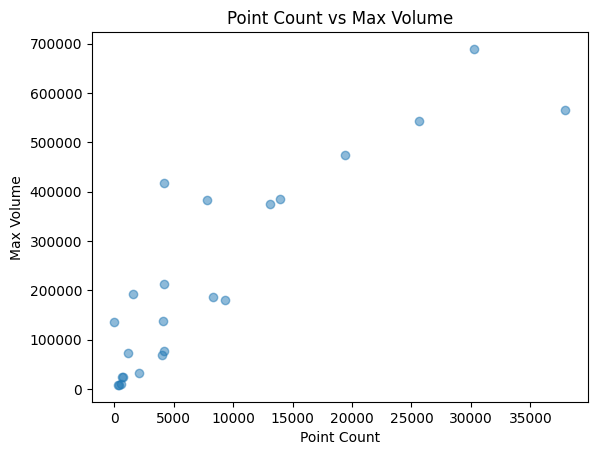

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(outliers_ratio_iqr["point_count"], outliers_ratio_iqr["max_volume"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Point Count vs Max Volume")
plt.show()

In [ ]:
# grouped_filtered_6 = grouped_filtered_6[grouped_filtered_6['ratio'] > 1]

In [ ]:
grouped_filtered[grouped_filtered['max_volume'] > 600000]['category']

48    [education, utility, health, shopping, food_an...
49    [education, utility, health, shopping, food_an...
Name: category, dtype: object

In [ ]:
import numpy as np
import statsmodels.api as sm

X = grouped_filtered_6["point_count"]
y = grouped_filtered_6["max_volume"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             max_volume   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     87.07
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           9.98e-17
Time:                        11:45:58   Log-Likelihood:                -2089.1
No. Observations:                 158   AIC:                             4182.
Df Residuals:                     156   BIC:                             4188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.462e+04   1.67e+04      5.064      0.000    5.16e+04    1.18e+05
point_count     2.8110      0.301      9.331      0.000       2.216       3.406
==============================================================================
Omnibus:                       36.150   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.270
Skew:                           1.252   Prob(JB):                     2.71e-12
Kurtosis:                       4.351   Cond. No.                     8.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
grouped_filtered_6.to_csv('')

',grid_id,geometry,centroid,origin,point_count,VALUE_sum,max_volume,sum,category,ratio\n0,grid_id_1254,"POLYGON ((77.229777778 28.72394444399997, 77.238777778 28.72394444399997, 77.238777778 28.71494444399997, 77.229777778 28.71494444399997, 77.229777778 28.72394444399997))",POINT (77.234277778 28.719444443999965),"(77.23427777799999, 28.719444443999965)",103,1305.292494,1305.29,1.0,"[\'health\', \'religion\', \'shopping\']",3.1836341463414635\n1,grid_id_1277,"POLYGON ((77.229777778 28.696944443999968, 77.238777778 28.696944443999968, 77.238777778 28.687944443999967, 77.229777778 28.687944443999967, 77.229777778 28.696944443999968))",POINT (77.234277778 28.692444443999964),"(77.23427777799999, 28.692444443999968)",125,135.030258,0.0,0.0,[\'sports\'],0.0\n2,grid_id_1280,"POLYGON ((77.229777778 28.71494444399997, 77.238777778 28.71494444399997, 77.238777778 28.705944443999968, 77.229777778 28.705944443999968, 77.229777778 28.71494444399997))",POINT (77.234277778 28.71044444399997),"(77.2

### Lesser points (Zoom-in)

In [ ]:
grouped_filtered_less = merged_gdf[merged_gdf['max_volume'] < 50000]
grouped_filtered_less = grouped_filtered_less[grouped_filtered_less['point_count'] < 10000]

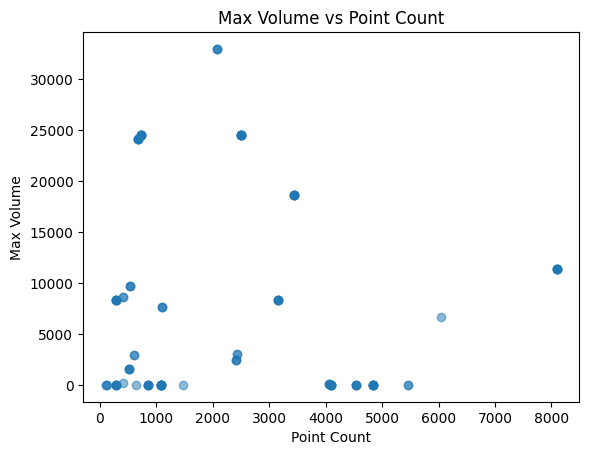

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(grouped_filtered_less["point_count"], grouped_filtered_less["max_volume"], alpha=0.5)
plt.xlabel("Point Count")
plt.ylabel("Max Volume")
plt.title("Max Volume vs Point Count")
plt.show()

In [ ]:
print(X.isnull().sum())
print(y.isnull().sum())

const          0
point_count    0
dtype: int64
9


In [ ]:
y

0          192.79
1        10189.40
2        10189.40
3        10189.40
4        10189.40
           ...   
14244    46629.65
14245    46629.65
14246    46629.65
14247    46629.65
14248         NaN
Name: max_volume, Length: 14249, dtype: float64

### original

In [ ]:
original
import numpy as np
import statsmodels.api as sm

X = merged_gdf["point_count"]
y = merged_gdf["max_volume"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             max_volume   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     116.7
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           5.07e-21
Time:                        08:32:37   Log-Likelihood:                -2256.6
No. Observations:                 171   AIC:                             4517.
Df Residuals:                     169   BIC:                             4523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.051e+04   1.49e+04      4.743      0.000    4.12e+04    9.99e+04
point_count     3.0124      0.279     10.804      0.000       2.462       3.563
==============================================================================
Omnibus:                       45.369   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.036
Skew:                           1.356   Prob(JB):                     3.08e-17
Kurtosis:                       4.821   Cond. No.                     7.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = grouped_filtered[["max_volume"]]
y = grouped_filtered["point_count"]

# Transform features for polynomial regression
poly = PolynomialFeatures(degree=2)  # Try different degrees
X_poly = poly.fit_transform(X)

# Fit regression model
model = LinearRegression().fit(X_poly, y)
print(model.coef_, model.intercept_)


[ 0.00000000e+00  2.96284565e-01 -3.14899950e-07] 1028.7051259331347


In [ ]:
model.coef_

array([ 0.00000000e+00,  2.96284565e-01, -3.14899950e-07])

In [ ]:
model.intercept_

np.float64(1028.7051259331347)

In [ ]:
#### DONE ####

In [ ]:
G = G_download

In [ ]:
nodes, edges = ox.graph_to_gdfs(G)

In [ ]:
# !pip3 install momepy

In [ ]:
# Betweennness only

In [ ]:
import geopandas as gpd
import pandas as pd
import networkx as nx
import osmnx as ox
from shapely.geometry import Point
from tqdm import tqdm

def compute_grid_betweenness(G, grid_gdf, nodes_gdf, sample_per_grid=3, weight='length'):
    """
    Compute approximate betweenness centrality using a few sampled nodes per grid.

    Args:
        G: networkx graph (entire city graph)
        grid_gdf: GeoDataFrame of square grids with 'grid_id' and geometry
        nodes_gdf: GeoDataFrame of nodes (from ox.graph_to_gdfs)
        sample_per_grid: number of source nodes to sample per grid
        weight: edge weight to use (usually 'length')

    Returns:
        grid_gdf with new columns: 'mean_betweenness', 'max_betweenness'
    """
    sampled_nodes = []

    # Ensure CRS match
    if grid_gdf.crs != nodes_gdf.crs:
        nodes_gdf = nodes_gdf.to_crs(grid_gdf.crs)

    # Step 1: Sample nodes per grid
    for _, row in tqdm(grid_gdf.iterrows(), total=len(grid_gdf), desc="Sampling nodes"):
        nodes_in_grid = nodes_gdf[nodes_gdf.within(row.geometry)]
        if not nodes_in_grid.empty:
            sample = nodes_in_grid.sample(min(sample_per_grid, len(nodes_in_grid)), random_state=42)
            sampled_nodes.extend(sample.index.tolist())

    print(f"Total sampled nodes: {len(sampled_nodes)}")

    # Step 2: Compute betweenness centrality subset
    print("Computing betweenness_centrality_subset...")
    bc_dict = nx.betweenness_centrality_subset(
        G,
        sources=sampled_nodes,
        targets=G.nodes,
        weight=weight,
        normalized=True
    )

    # Step 3: Attach to node GeoDataFrame
    nodes_gdf["betweenness"] = nodes_gdf.index.map(bc_dict)

    # Step 4: Spatial join nodes to grid
    joined = gpd.sjoin(nodes_gdf[["betweenness", "geometry"]], grid_gdf[["grid_id", "geometry"]], how="inner", predicate="within")

    # Step 5: Aggregate mean and max betweenness per grid
    grid_stats = joined.groupby("grid_id")["betweenness"].agg(["mean", "max"]).reset_index()
    grid_stats.columns = ["grid_id", "mean_betweenness", "max_betweenness"]

    # Step 6: Merge back to grid GeoDataFrame
    grid_gdf = grid_gdf.merge(grid_stats, on="grid_id", how="left")

    return grid_gdf


In [ ]:
# type(grouped_filtered)
grouped_filtered.shape

(171, 9)

In [ ]:
grid_gdf = grouped_filtered
updated_grid = compute_grid_betweenness(G, grid_gdf, nodes, sample_per_grid=10)

Sampling nodes: 100%|██████████| 171/171 [00:01<00:00, 107.36it/s]


Total sampled nodes: 1628
Computing betweenness_centrality_subset...


In [ ]:
updated_grid

grid_id                                           geometry                   centroid                                   origin  point_count     VALUE_sum  max_volume   sum                                           category  mean_betweenness  max_betweenness
0    grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...  POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)          103   1305.292494        0.00   0.0                                 [shopping, health]          0.000022         0.000090
1    grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...  POINT (77.23428 28.72844)                                     None           69      0.000000        0.00   0.0                                                 []               NaN              NaN
2    grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...  POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)          125    135.030258        0.00   0.0                                           [sports]          0.000000         0.000000
3    grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...  POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)         2409    810.181548     2430.54   3.0                 [shopping, health, food_and_daily]          0.000304         0.001136
4    grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)                                     None          160      0.000000        0.00   0.0                                                 []          0.000042         0.000085
..            ...                                                ...                        ...                                      ...          ...           ...         ...   ...                                                ...               ...              ...
166   grid_id_843  POLYGON ((77.28378 28.68794, 77.29278 28.68794...  POINT (77.28828 28.68344)        (77.288277778, 28.68344444399997)        77358  47958.383851   479583.84  10.0  [health, transportation, sports, safety, finan...          0.000048         0.000596
167   grid_id_844  POLYGON ((77.29278 28.68794, 77.30178 28.68794...  POINT (77.29728 28.68344)        (77.297277778, 28.68344444399997)        66937  42006.003127   378054.03   9.0  [health, transportation, sports, safety, finan...          0.000053         0.000556
168   grid_id_845  POLYGON ((77.28378 28.57994, 77.29278 28.57994...  POINT (77.28828 28.57544)        (77.288277778, 28.57544444399996)          676   4022.131080    28154.92   7.0  [health, finance, entertainment, utility, food...          0.000015         0.000112
169   grid_id_846  POLYGON ((77.29278 28.57994, 77.30178 28.57994...  POINT (77.29728 28.57544)                                     None         3112      0.000000        0.00   0.0                                                 []          0.000023         0.000090
170   grid_id_859  POLYGON ((77.29278 28.57094, 77.30178 28.57094...  POINT (77.29728 28.56644)        (77.297277778, 28.56644444399997)          511   1541.816914     1541.82   1.0         [sports, shopping, health, food_and_daily]          0.000008         0.000023

[171 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
updated_grid["betweenness_scaled"] = scaler.fit_transform(updated_grid[["mean_betweenness"]])

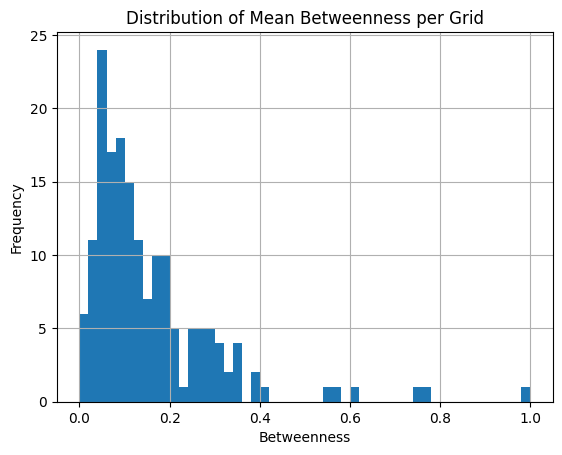

In [ ]:
import matplotlib.pyplot as plt
plt.hist(updated_grid["betweenness_scaled"], bins=50)
plt.title("Distribution of Mean Betweenness per Grid")
plt.xlabel("Betweenness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
updated_grid[['mean_betweenness', 'betweenness_scaled']] = updated_grid[['mean_betweenness', 'betweenness_scaled']].fillna(0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["max_volume", "betweenness_scaled"]]
y = updated_grid["point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.1310
beta (betweenness) = 24532.3484
intercept = 9344.35


In [ ]:
updated_grid["est_volume"] = (
    alpha * updated_grid["max_volume"] +
    beta * updated_grid["betweenness_scaled"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["est_volume"])
mae = mean_absolute_error(y, updated_grid["est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.418
Mean Absolute Error: 20870.99


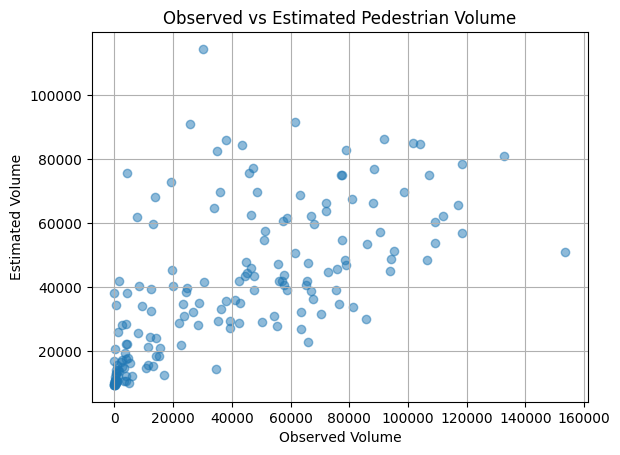

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()


In [ ]:
# BETWEENNESS with SPARK

In [ ]:
grid_gdf = grouped_filtered

In [ ]:
from shapely.geometry import shape
import geopandas as gpd
import networkx as nx

def process_grid_partition(partition):
    results = []
    for grid_row in partition:
        grid_id = grid_row["grid_id"]
        geom = shape(grid_row["geometry"])
        sample_count = 10

        try:
            # Get all nodes within grid
            local_nodes = [node for node, data in broadcast_nodes.value.items() if geom.contains(data["geometry"])]
            if len(local_nodes) == 0:
                continue

            # Sample source nodes
            sources = local_nodes[:sample_count] if len(local_nodes) <= sample_count else random.sample(local_nodes, sample_count)

            # Compute betweenness for full graph with sources
            bc = nx.betweenness_centrality_subset(
                broadcast_graph.value,
                sources=sources,
                targets=broadcast_graph.value.nodes,
                weight="length",
                normalized=True
            )

            # Filter betweenness to just nodes inside this grid
            grid_bc_values = [bc[n] for n in local_nodes if n in bc]
            if not grid_bc_values:
                continue

            results.append({
                "grid_id": grid_id,
                "mean_betweenness": sum(grid_bc_values) / len(grid_bc_values),
                "max_betweenness": max(grid_bc_values)
            })

        except Exception as e:
            print(f"Error processing grid {grid_id}: {e}")
            continue

    return results


In [ ]:
from pyspark import SparkContext
import random

nodes, edges = ox.graph_to_gdfs(G)
nodes_gdf = nodes

# Step 1: Broadcast the graph and node geometries
graph_dict = G.copy()
node_geom_dict = {
    node: {"geometry": geom} for node, geom in zip(nodes_gdf.index, nodes_gdf.geometry)
}

broadcast_graph = sc.broadcast(graph_dict)
broadcast_nodes = sc.broadcast(node_geom_dict)

# Step 2: Convert GeoDataFrame to a serializable format
grid_records = grid_gdf[["grid_id", "geometry"]].to_dict("records")

# Step 3: Create RDD and run parallel processing
rdd = sc.parallelize(grid_records, numSlices=96)  # Adjust based on your CPU
result_rdd = rdd.mapPartitions(process_grid_partition)

# Step 4: Collect and convert to DataFrame
results = result_rdd.collect()
result_df = pd.DataFrame(results)

# Step 5: Merge with grid_gdf
updated_grid = grid_gdf.merge(result_df, on="grid_id", how="left")


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
updated_grid["betweenness_scaled"] = scaler.fit_transform(updated_grid[["mean_betweenness"]])

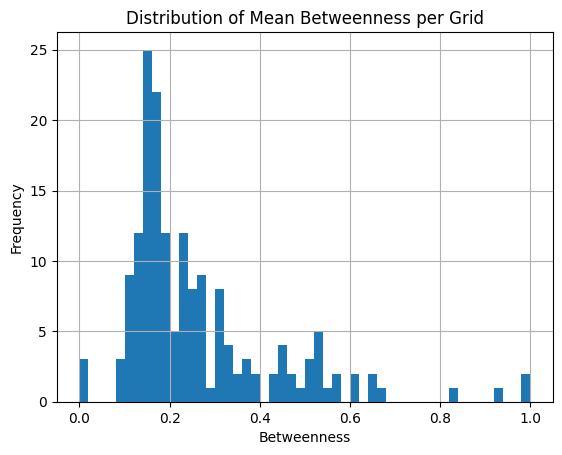

In [ ]:
import matplotlib.pyplot as plt
plt.hist(updated_grid["betweenness_scaled"], bins=50)
plt.title("Distribution of Mean Betweenness per Grid")
plt.xlabel("Betweenness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
updated_grid[['mean_betweenness', 'betweenness_scaled']] = updated_grid[['mean_betweenness', 'betweenness_scaled']].fillna(0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
updated_grid["max_volume_scaled"] = scaler.fit_transform(updated_grid[["max_volume"]])
updated_grid["point_count_scaled"] = scaler.fit_transform(updated_grid[["point_count"]])
updated_grid["VALUE_sum_scaled"] = scaler.fit_transform(updated_grid[["VALUE_sum"]])

In [ ]:
# updated_grid['max_volume']
updated_grid["log_mean_betweenness"] = np.log1p(updated_grid["mean_betweenness"])  # log1p handles 0s safely
updated_grid.loc[updated_grid["mean_betweenness"] == 0, "log_mean_betweenness"] = 1

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["log_max_volume", "log_mean_betweenness"]]
y = updated_grid["log_point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.4079
beta (betweenness) = -3.1887
intercept = 5.25


In [ ]:
updated_grid["log_est_volume"] = (
    alpha * updated_grid["log_max_volume"] +
    beta * updated_grid["log_mean_betweenness"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["log_est_volume"])
mae = mean_absolute_error(y, updated_grid["log_est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.616
Mean Absolute Error: 1.05


In [ ]:
# take log inverse

In [ ]:
# Inverse log1p
updated_grid["est_volume"] = updated_grid["log_est_volume"].apply(
    lambda x: np.expm1(x) if x != 1 else 0
)
y = updated_grid["point_count"]

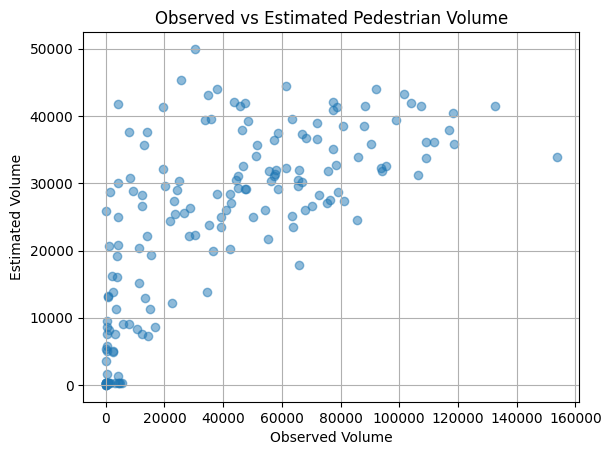

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()


In [ ]:
updated_grid[updated_grid['est_volume'] < 0]

Empty GeoDataFrame
Columns: [grid_id, geometry, centroid, origin, point_count, VALUE_sum, max_volume, sum, category, log_point_count, log_VALUE_sum, log_max_volume, mean_betweenness, max_betweenness, betweenness_scaled, max_volume_scaled, point_count_scaled, VALUE_sum_scaled, log_mean_betweenness, log_est_volume, est_volume]
Index: []

[0 rows x 21 columns]

In [ ]:
# CLOSENESS

In [ ]:
# wait
# import osmnx as ox
# import networkx as nx
# import geopandas as gpd
# from tqdm import tqdm

# # Step 1: Load graph and node GeoDataFrame
# # If not already available
# # G = ox.graph_from_place("Your City", network_type="walk")
# nodes, edges = ox.graph_to_gdfs(G)

# # Step 2: Compute closeness centrality (based on edge 'length')
# print("Computing closeness centrality...")
# closeness = nx.closeness_centrality(G, distance='length')

# # Step 3: Add closeness to nodes GeoDataFrame
# nodes["closeness"] = nodes.index.map(closeness)

# # Step 4: Spatial join with grid GeoDataFrame
# # Ensure CRS match
# updated_grid = updated_grid.to_crs(nodes.crs)

# # Optional: use spatial index to speed up
# nodes_sindex = nodes.sindex

# # Fast spatial join with tqdm
# joined_closeness = gpd.sjoin(nodes[["closeness", "geometry"]], updated_grid[["grid_id", "geometry"]], how="inner", predicate="within")

# # Step 5: Aggregate per grid
# grid_closeness_stats = joined_closeness.groupby("grid_id")["closeness"].agg(["mean", "max"]).reset_index()
# grid_closeness_stats.columns = ["grid_id", "mean_closeness", "max_closeness"]

# # Step 6: Merge with original grid_gdf
# updated_grid = updated_grid.merge(grid_closeness_stats, on="grid_id", how="left")


In [ ]:
# Closeness without spark

In [ ]:
# !pip3 install tqdm

In [ ]:
def compute_grid_closeness(G, grid_gdf, nodes_gdf, sample_per_grid=5, weight='length'):
    """
    Compute closeness centrality by sampling a few nodes per grid and computing global closeness.

    Args:
        G: networkx graph (entire city graph)
        grid_gdf: GeoDataFrame with 'grid_id' and geometry
        nodes_gdf: GeoDataFrame from ox.graph_to_gdfs
        sample_per_grid: number of nodes to sample per grid
        weight: edge weight to use (e.g., 'length')

    Returns:
        grid_gdf with new columns: 'mean_closeness', 'max_closeness'
    """
    sampled_nodes = []

    if grid_gdf.crs != nodes_gdf.crs:
        nodes_gdf = nodes_gdf.to_crs(grid_gdf.crs)

    # Step 1: Sample nodes per grid
    for _, row in tqdm(grid_gdf.iterrows(), total=len(grid_gdf), desc="Sampling nodes for closeness"):
        nodes_in_grid = nodes_gdf[nodes_gdf.within(row.geometry)]
        if not nodes_in_grid.empty:
            sample = nodes_in_grid.sample(min(sample_per_grid, len(nodes_in_grid)), random_state=42)
            sampled_nodes.extend(sample.index.tolist())

    print(f"Total sampled nodes: {len(sampled_nodes)}")

    # Step 2: Compute closeness for sampled nodes only
    print("Computing closeness centrality for sampled nodes...")
    closeness_dict = {}
    for node in tqdm(sampled_nodes, desc="Running Dijkstra"):
        lengths = nx.single_source_dijkstra_path_length(G, node, weight=weight)
        total_distance = sum(lengths.values())
        if total_distance > 0:
            closeness_dict[node] = 1 / total_distance
        else:
            closeness_dict[node] = 0

    # Step 3: Attach to GeoDataFrame
    nodes_gdf["closeness"] = nodes_gdf.index.map(closeness_dict)

    # Step 4: Spatial join nodes to grid
    joined = gpd.sjoin(nodes_gdf[["closeness", "geometry"]], grid_gdf[["grid_id", "geometry"]], how="inner", predicate="within")

    # Step 5: Aggregate per grid
    grid_stats = joined.groupby("grid_id")["closeness"].agg(["mean", "max"]).reset_index()
    grid_stats.columns = ["grid_id", "mean_closeness", "max_closeness"]

    # Step 6: Merge with original grid
    updated_grid = updated_grid.merge(grid_stats, on="grid_id", how="left")

    return updated_grid


In [ ]:
# grid_gdf = grouped_filtered
updated_grid = compute_grid_closeness(G, grid_gdf, nodes, sample_per_grid=10)

NameError: name 'tqdm' is not defined

In [ ]:
# Closeness SPARK

In [ ]:
from shapely.geometry import shape
import random
import networkx as nx
import numpy as np

def process_closeness_partition(partition):
    results = []
    for row in partition:
        grid_id = row["grid_id"]
        grid_geom = shape(row["geometry"])

        # Find local nodes
        local_nodes = [
            node for node, data in broadcast_nodes.value.items()
            if grid_geom.contains(data["geometry"])
        ]

        if not local_nodes:
            continue

        # Sample source nodes with deterministic randomness
        # seed = abs(hash(grid_id)) % (10**6)
        # rng = random.Random(seed)

        # if len(local_nodes) <= sample_per_grid:
        #     sources = local_nodes
        # else:
        #     sources = rng.sample(local_nodes, sample_per_grid)
        sources = local_nodes[:sample_per_grid] if len(local_nodes) <= sample_per_grid else random.sample(local_nodes, sample_per_grid)

        # Compute closeness = 1 / sum of dijkstra path lengths
        closeness_values = []
        for node in sources:
            lengths = nx.single_source_dijkstra_path_length(broadcast_graph.value, node, weight="length")
            total_dist = sum(lengths.values())
            if total_dist > 0:
                closeness_values.append(1 / total_dist)

        if closeness_values:
            results.append({
                "grid_id": grid_id,
                "mean_closeness": np.mean(closeness_values),
                "max_closeness": np.max(closeness_values)
            })

    return results


In [ ]:
# Prepare SparkContext
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

# Convert node geometry to dict
node_dict = {
    node: {"geometry": geom} for node, geom in zip(nodes_gdf.index, nodes_gdf.geometry)
}

# Broadcast graph and nodes
broadcast_graph = sc.broadcast(G)
broadcast_nodes = sc.broadcast(node_dict)

sample_per_grid = 10

# Prepare grid data
grid_records = grid_gdf[["grid_id", "geometry"]].to_dict("records")

# Parallelize
rdd = sc.parallelize(grid_records, numSlices=96)
result_rdd = rdd.mapPartitions(process_closeness_partition)

# Collect
closeness_results = result_rdd.collect()

# Merge to grid_gdf
closeness_df = pd.DataFrame(closeness_results)
updated_grid = updated_grid.merge(closeness_df, on="grid_id", how="left")


In [ ]:
updated_grid

grid_id                                           geometry                   centroid                                   origin  point_count     VALUE_sum  max_volume   sum                                           category  log_point_count  ...  max_betweenness  betweenness_scaled  max_volume_scaled  point_count_scaled  VALUE_sum_scaled  log_mean_betweenness  log_est_volume    est_volume  mean_closeness  max_closeness
0    grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...  POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)          103   1305.292494     1305.29   1.0                       [health, religion, shopping]         4.644391  ...         0.000067            0.533432           0.001515            0.000664          0.015147              0.000013        8.171517   3537.707590    9.022762e-10   9.230463e-10
1    grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...  POINT (77.23428 28.72844)                                     None           69      0.000000        0.00   0.0                                                 []         4.248495  ...              NaN            0.000000           0.000000            0.000443          0.000000              1.000000        2.464260     10.754785             NaN            NaN
2    grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...  POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)          125    135.030258        0.00   0.0                                           [sports]         4.836282  ...         0.000000            0.000000           0.000000            0.000807          0.001567              1.000000        2.464260     10.754785    9.466119e-10   9.466119e-10
3    grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...  POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)         2409    810.181548     3240.73   4.0       [health, food_and_daily, religion, shopping]         7.787382  ...         0.000052            0.619557           0.003761            0.015675          0.009402              0.000015        8.542233   5125.781247    9.603398e-10   9.888809e-10
4    grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)   (77.23427777799999, 28.68344444399997)          160    315.070602        0.00   0.0                                         [religion]         5.081404  ...         0.000060            1.000000           0.000000            0.001035          0.003656              0.000024        5.652882    284.112105    9.803998e-10   9.987789e-10
..            ...                                                ...                        ...                                      ...          ...           ...         ...   ...                                                ...              ...  ...              ...                 ...                ...                 ...               ...                   ...             ...           ...             ...            ...
166   grid_id_843  POLYGON ((77.28378 28.68794, 77.29278 28.68794...  POINT (77.28828 28.68344)        (77.288277778, 28.68344444399997)        77358  47958.383851   527542.22  11.0  [shopping, utility, food_and_daily, religion, ...        11.256212  ...         0.000016            0.102649           0.612191            0.503548          0.556537              0.000002       10.619217  40912.549478    1.143496e-09   1.158353e-09
167   grid_id_844  POLYGON ((77.29278 28.68794, 77.30178 28.68794...  POINT (77.29728 28.68344)        (77.297277778, 28.68344444399997)        66937  42006.003127   420060.03  10.0  [shopping, utility, food_and_daily, religion, ...        11.111522  ...         0.000031            0.122752           0.487462            0.435713          0.487462              0.000003       10.526289  37281.854263    1.102063e-09   1.132463e-09
168   grid_id_845  POLYGON ((77.28378 28.57994, 77.29278 28.57994...  POINT (77.28828 28.57544)        (77.288277778, 28.5

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
updated_grid["betweenness_scaled"] = scaler.fit_transform(updated_grid[["mean_betweenness"]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
updated_grid["closeness_scaled"] = scaler.fit_transform(updated_grid[["mean_closeness"]])

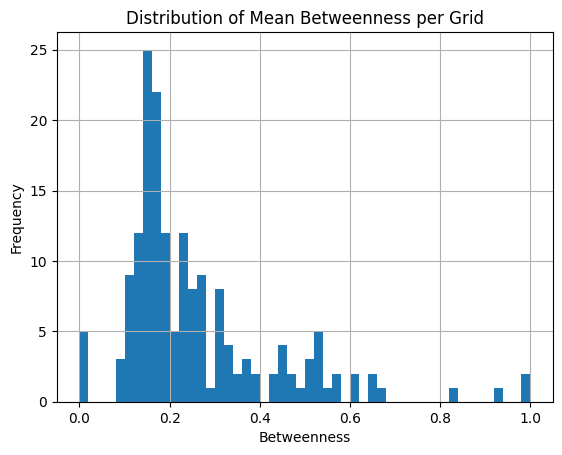

In [ ]:
import matplotlib.pyplot as plt
plt.hist(updated_grid["betweenness_scaled"], bins=50)
plt.title("Distribution of Mean Betweenness per Grid")
plt.xlabel("Betweenness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


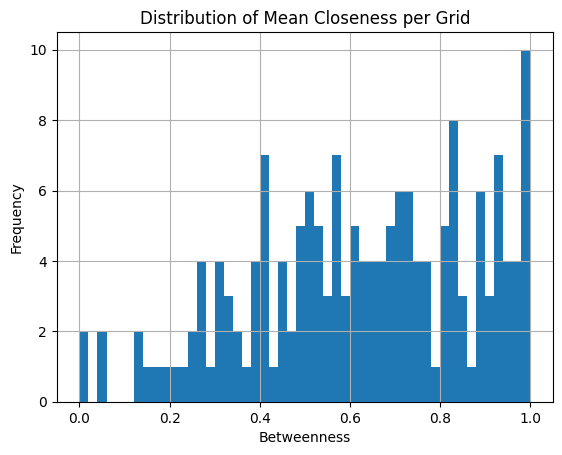

In [ ]:
import matplotlib.pyplot as plt
plt.hist(updated_grid["closeness_scaled"], bins=50)
plt.title("Distribution of Mean Closeness per Grid")
plt.xlabel("Betweenness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
updated_grid[['mean_betweenness', 'betweenness_scaled']] = updated_grid[['mean_betweenness', 'betweenness_scaled']].fillna(0)

In [ ]:
updated_grid[['mean_closeness', 'closeness_scaled']] = updated_grid[['mean_closeness', 'closeness_scaled']].fillna(0)

In [ ]:
# updated_grid['max_volume']
updated_grid["log_mean_closeness"] = np.log1p(updated_grid["mean_closeness"])  # log1p handles 0s safely
updated_grid.loc[updated_grid["mean_closeness"] == 0, "log_mean_closeness"] = 1

In [ ]:
# log Max volume, log Point count

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["log_max_volume", "log_mean_betweenness", "log_mean_closeness"]]
y = updated_grid["log_point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.4096
beta (betweenness) = -3.8038
gamma (closeness) = 1.5741
intercept = 5.23


In [ ]:
updated_grid["log_est_volume"] = (
    alpha * updated_grid["log_max_volume"] +
    beta * updated_grid["log_mean_betweenness"] +
    gamma * updated_grid["log_mean_closeness"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["log_est_volume"])
mae = mean_absolute_error(y, updated_grid["log_est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.619
Mean Absolute Error: 1.06


Log plots

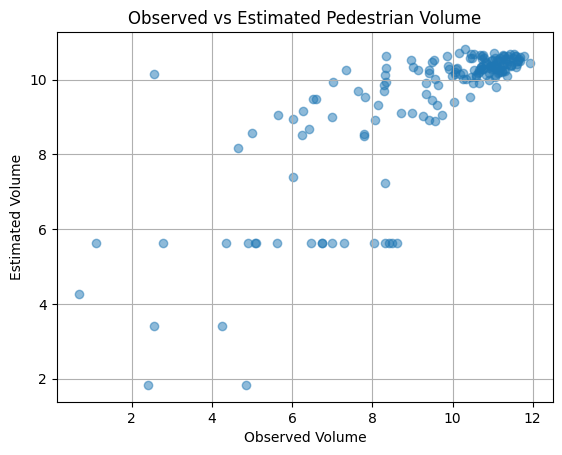

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["log_est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()

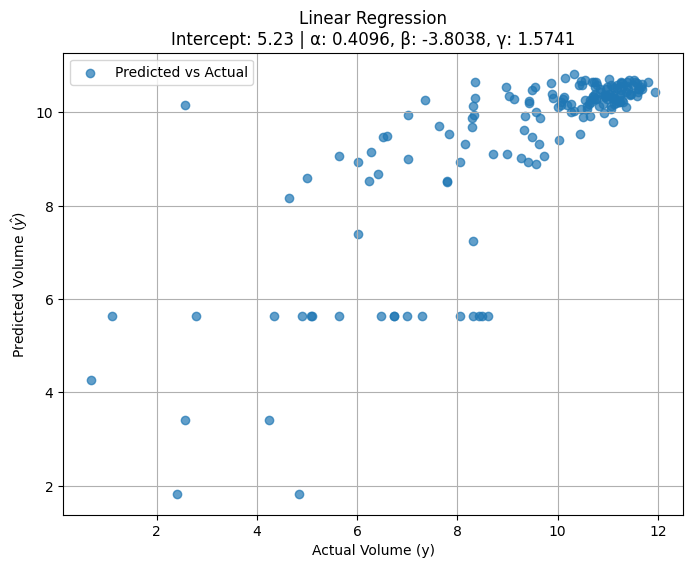

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict using the model
y_pred = model.predict(X)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot(label="Perfect Fit Line") # [y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2,
plt.xlabel("Actual Volume (y)")
plt.ylabel("Predicted Volume ($\\hat{y}$)")
plt.title(f"Linear Regression\nIntercept: {intercept:.2f} | α: {alpha:.4f}, β: {beta:.4f}, γ: {gamma:.4f}")
plt.legend()
plt.grid(True)
plt.show()

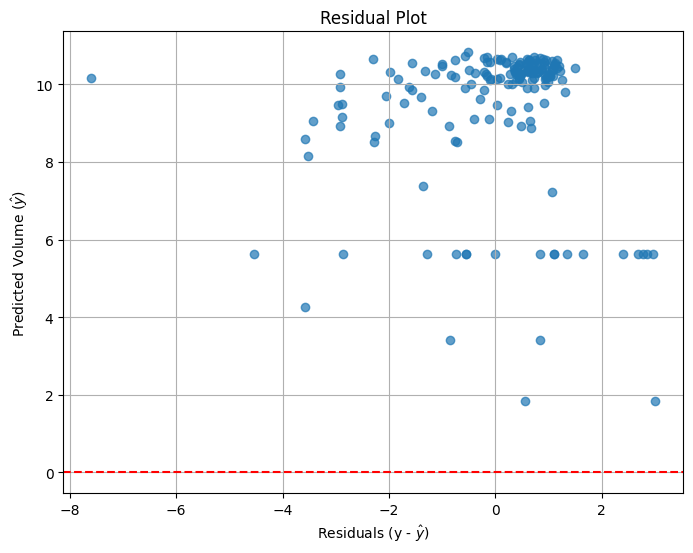

In [ ]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(residuals, y_pred, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Residuals (y - $\\hat{y}$)")
plt.ylabel("Predicted Volume ($\\hat{y}$)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [ ]:
# Max volume, Point count

In [ ]:
# Inverse log1p
updated_grid["est_volume"] = updated_grid["log_est_volume"].apply(
    lambda x: np.expm1(x) if x != 1 else 0
)
y = updated_grid["point_count"]
X = updated_grid[["max_volume", "mean_betweenness", "mean_closeness"]]


In [ ]:
updated_grid[updated_grid['est_volume'] < 0]

Empty GeoDataFrame
Columns: [grid_id, geometry, centroid, origin, point_count, VALUE_sum, max_volume, sum, category, log_point_count, log_VALUE_sum, log_max_volume, mean_betweenness, max_betweenness, betweenness_scaled, max_volume_scaled, point_count_scaled, VALUE_sum_scaled, log_mean_betweenness, log_est_volume, est_volume, mean_closeness, max_closeness, closeness_scaled, log_mean_closeness]
Index: []

[0 rows x 25 columns]

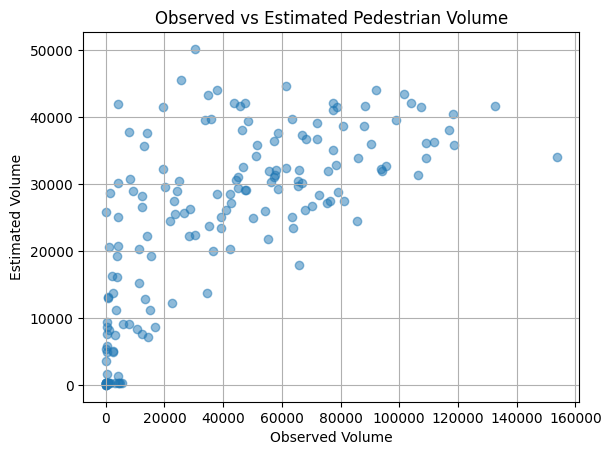

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["max_volume", "mean_betweenness", "mean_closeness"]]
y = updated_grid["point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.0997
beta (betweenness) = -1722951850.6765
gamma (closeness) = -7989.8129
intercept = 27849.54


In [ ]:
updated_grid["est_volume"] = (
    alpha * updated_grid["max_volume"] +
    beta * updated_grid["mean_betweenness"] +
    gamma * updated_grid["mean_closeness"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["est_volume"])
mae = mean_absolute_error(y, updated_grid["est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.436
Mean Absolute Error: 20855.74


In [ ]:
updated_grid[updated_grid['est_volume'] < 0]

grid_id                                           geometry                   centroid                                   origin  point_count    VALUE_sum  max_volume  sum                                           category  log_point_count  ...  max_volume_scaled  point_count_scaled  VALUE_sum_scaled  log_mean_betweenness  log_est_volume    est_volume  mean_closeness  max_closeness  closeness_scaled  log_mean_closeness
4    grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)   (77.23427777799999, 28.68344444399997)          160   315.070602        0.00  0.0                                         [religion]         5.081404  ...           0.000000            0.001035          0.003656              0.000024        5.636287 -13474.607765    9.803998e-10   9.987789e-10          0.596249        9.803998e-10
31   grid_id_1398  POLYGON ((77.23878 28.69694, 77.24778 28.69694...  POINT (77.24328 28.69244)  (77.24327777799999, 28.692444443999968)          646   127.852857        0.00  0.0                                           [sports]         6.472346  ...           0.000000            0.004199          0.001484              0.000024        5.636288 -12914.191385    9.899219e-10   1.052609e-09          0.615061        9.899219e-10
113   grid_id_776  POLYGON ((77.24778 28.62494, 77.25678 28.62494...  POINT (77.25228 28.62044)   (77.25227777799999, 28.62044444399997)          279  1670.796150    11695.57  7.0  [shopping, utility, food_and_daily, religion, ...         5.634790  ...           0.013572            0.001810          0.019389              0.000020        9.063256  -5591.687028    9.893720e-10   1.009684e-09          0.613975        9.893720e-10
169   grid_id_846  POLYGON ((77.29278 28.57994, 77.30178 28.57994...  POINT (77.29728 28.57544)                                     None         3112     0.000000        0.00  0.0                                                 []         8.043342  ...           0.000000            0.020251          0.000000              0.000022        5.636294 -10448.745168    7.452122e-10   7.966943e-10          0.131615        7.452122e-10

[4 rows x 25 columns]

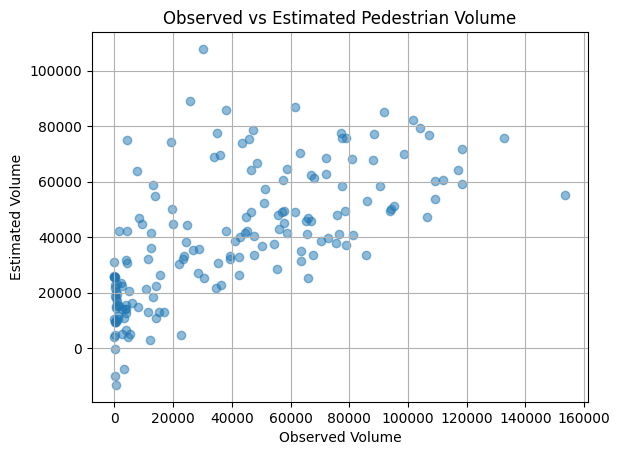

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()

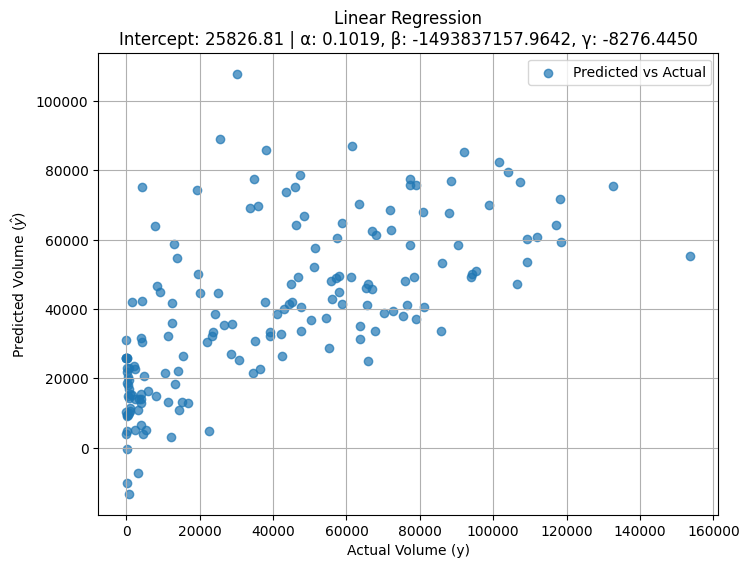

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict using the model
y_pred = model.predict(X)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot(label="Perfect Fit Line") # [y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2,
plt.xlabel("Actual Volume (y)")
plt.ylabel("Predicted Volume ($\\hat{y}$)")
plt.title(f"Linear Regression\nIntercept: {intercept:.2f} | α: {alpha:.4f}, β: {beta:.4f}, γ: {gamma:.4f}")
plt.legend()
plt.grid(True)
plt.show()


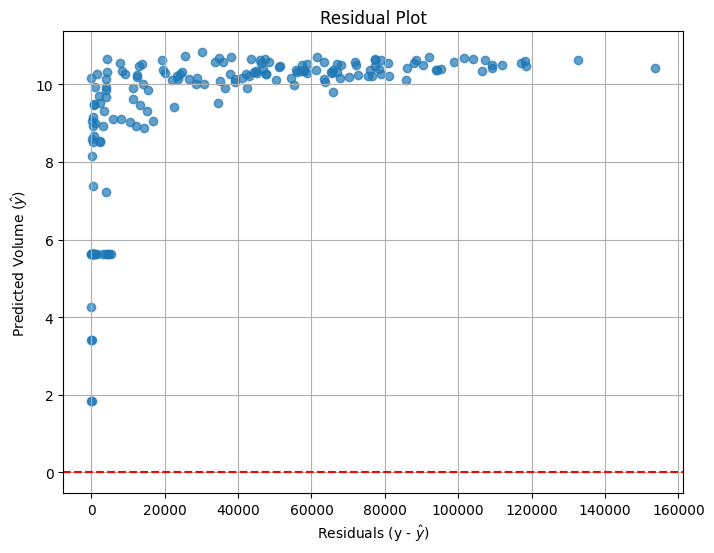

In [ ]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(residuals, y_pred, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Residuals (y - $\\hat{y}$)")
plt.ylabel("Predicted Volume ($\\hat{y}$)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [ ]:
# Integration

In [ ]:
# !pip3 install pyspark

In [ ]:
col_name_r400 = "integration_r400"
col_name_r1200 = "integration_r1200"
col_name_full = "integration_full"

In [ ]:
radius = 400
isRadius = True
col_name = col_name_r400

In [ ]:
# updated_grid.drop(columns=['mean_integration_full_x',	'max_integration_full_x',	'mean_integration_full_y',	'max_integration_full_y'], inplace=True) # 'integration_r400_scaled', 'max_integration_r1200_x', 'mean_integration_r1200_y', 'max_integration_r1200_y', 'mean_integration_full', 'max_integration_full'

In [ ]:
import networkx as nx

def compute_local_integration_partition(partition, radius=400, weight="length"):
    results = []
    G = broadcast_graph.value

    for row in partition:
        node = row["node"]
        try:
            if isRadius == True:
                lengths = nx.single_source_dijkstra_path_length(G, node, cutoff=radius, weight=weight)
                total_dist = sum(lengths.values())
                integration = 1 / total_dist if total_dist > 0 else 0
            else:
              lengths = nx.single_source_dijkstra_path_length(G, node, weight=weight)
              total_dist = sum(lengths.values())
              integration = 1 / total_dist if total_dist > 0 else 0
        except:
            integration = 0

        results.append({"node": node, col_name: integration})

    return results

In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

# Broadcast graph
broadcast_graph = sc.broadcast(G)

# Optionally store node geometries if you need grid assignment later
node_dict = {n: {"geometry": geom} for n, geom in zip(nodes_gdf.index, nodes_gdf.geometry)}
broadcast_nodes = sc.broadcast(node_dict)

node_records = [{"node": n} for n in G.nodes()]

rdd = sc.parallelize(node_records, numSlices=96)
result_rdd = rdd.mapPartitions(lambda part: compute_local_integration_partition(part, radius=radius, weight="length"))

integration_results = result_rdd.collect()
integration_df = pd.DataFrame(integration_results)

nodes_gdf[col_name] = nodes_gdf.index.map(dict(zip(integration_df["node"], integration_df[col_name])))

joined = gpd.sjoin(
    nodes_gdf[["geometry", col_name]],
    grid_gdf[["grid_id", "geometry"]],
    how="inner",
    predicate="within"
)

grid_integration = (
    joined.groupby("grid_id")[col_name]
    .agg(["mean", "max"])
    .reset_index()
    .rename(columns={"mean": "mean_"+col_name, "max": "max_"+col_name})
)

updated_grid = updated_grid.merge(grid_integration, on="grid_id", how="left")


In [ ]:
# updated_grid

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
updated_grid["integration_r400_scaled"] = scaler.fit_transform(updated_grid[["mean_integration_r400"]])
# updated_grid["integration_r1200_scaled"] = scaler.fit_transform(updated_grid[["mean_integration_r1200"]])
# updated_grid["integration_full_scaled"] = scaler.fit_transform(updated_grid[["mean_integration_full"]])

In [ ]:
updated_grid[['mean_betweenness', 'betweenness_scaled']] = updated_grid[['mean_betweenness', 'betweenness_scaled']].fillna(0)
updated_grid[['mean_closeness', 'closeness_scaled']] = updated_grid[['mean_closeness', 'closeness_scaled']].fillna(0)

In [ ]:
updated_grid[['mean_integration_r400', 'integration_r400_scaled']] = updated_grid[['mean_integration_r400', 'integration_r400_scaled']].fillna(0)
# updated_grid[['mean_integration_r1200', 'integration_r1200_scaled']] = updated_grid[['mean_integration_r1200', 'integration_r1200_scaled']].fillna(0)
# updated_grid[['mean_integration_full', 'integration_full_scaled']] = updated_grid[['mean_integration_full', 'integration_full_scaled']].fillna(0)

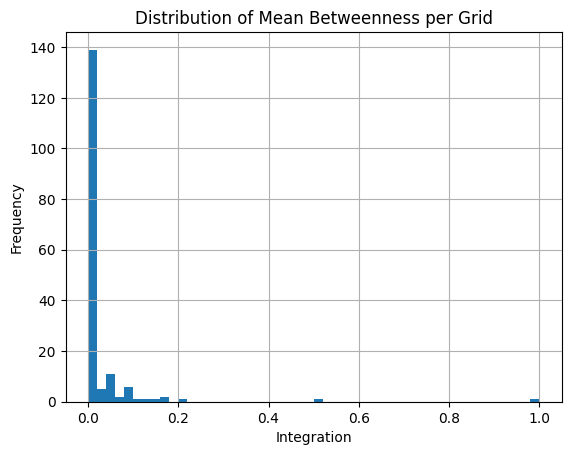

In [ ]:
import matplotlib.pyplot as plt
plt.hist(updated_grid["integration_r400_scaled"], bins=50)
plt.title("Distribution of Mean Betweenness per Grid")
plt.xlabel("Integration")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


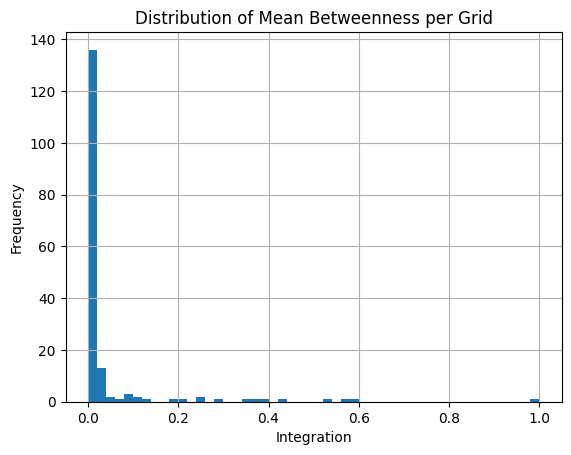

In [ ]:
import matplotlib.pyplot as plt
plt.hist(updated_grid["integration_r1200_scaled"], bins=50)
plt.title("Distribution of Mean Betweenness per Grid")
plt.xlabel("Integration")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["max_volume", "betweenness_scaled", "closeness_scaled", "integration_r400_scaled"]] # "betweenness_scaled", "closeness_scaled", "integration_r400_scaled", "integration_r1200_scaled"
y = updated_grid["point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
delta = model.coef_[3]
# epsilon = model.coef_[4]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"delta (integration 400) = {delta:.4f}")
# print(f"epsilon (integration 1200) = {epsilon:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.0556
beta (betweenness) = -38089.2358
gamma (closeness) = 71483.2125
delta (integration 400) = -13101.0989
intercept = -6445.81


In [ ]:
updated_grid["est_volume"] = (
    alpha * updated_grid["max_volume"] +
    beta * updated_grid["betweenness_scaled"] +
    gamma * updated_grid["closeness_scaled"] +
    delta * updated_grid["integration_r400_scaled"] +
    # epsilon * updated_grid["integration_r1200_scaled"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["est_volume"])
mae = mean_absolute_error(y, updated_grid["est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.625
Mean Absolute Error: 17689.78


In [ ]:
# With only integration: R2: 0.455, Mean Absolute Error: 20491.20
# With both closeness and integration: R2: 0.626, Mean Absolute Error: 17630.14

In [ ]:
# With max_voume: 0.403
# With betweenness: 0.427
# With closeness: 0.593
# With integration_400: 0.408
# With all 3 above (400): 0.621 0.618 0.622
# With integration_1200: 0.412
# With all 3 above (1200): _ 0.619
# Wiith all 4 above: _ 0.620 0.623

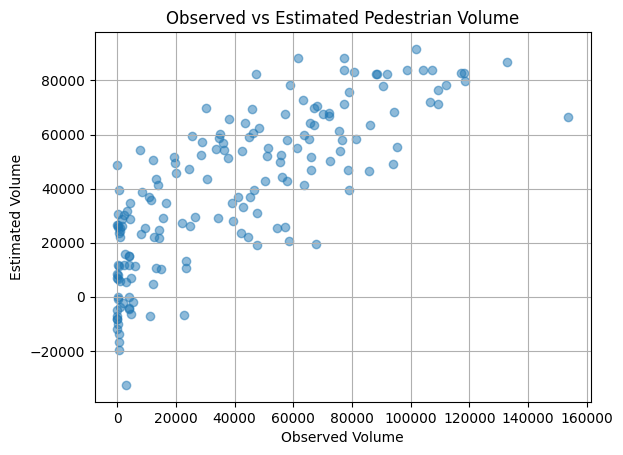

In [ ]:
# With both closeness and integration
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()


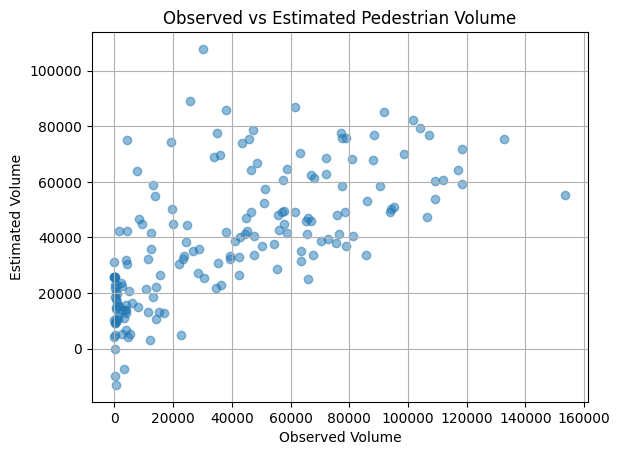

In [ ]:
# With only integration
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()


In [ ]:
# LOG values

In [ ]:
# Add log of integration fields
updated_grid["log_mean_integration_r400"] = np.log1p(updated_grid["mean_integration_r400"])  # log1p handles 0s safely
updated_grid.loc[updated_grid["mean_integration_r400"] == 0, "log_mean_integration_r400"] = 1

# updated_grid["log_mean_integration_r1200"] = np.log1p(updated_grid["mean_integration_r1200"])  # log1p handles 0s safely
# updated_grid.loc[updated_grid["mean_integration_r1200"] == 0, "log_mean_integration_r1200"] = 1

# updated_grid["log_mean_integration_full"] = np.log1p(updated_grid["mean_integration_full"])  # log1p handles 0s safely
# updated_grid.loc[updated_grid["mean_integration_full"] == 0, "log_mean_integration_full"] = 1

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["log_max_volume", "log_mean_betweenness", "log_mean_closeness", "log_mean_integration_r400"]] # "log_mean_betweenness", "log_mean_closeness", "log_mean_integration_r400", "log_mean_integration_r1200"
y = updated_grid["log_point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
delta = model.coef_[3]
# epsilon = model.coef_[4]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"delta (integration 400) = {delta:.4f}")
# print(f"epsilon (integration 1200) = {epsilon:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.4037
beta (betweenness) = 45.9323
gamma (closeness) = 1.5625
delta (integration 400) = -49.8003
intercept = 5.31


In [ ]:
updated_grid["log_est_volume"] = (
    alpha * updated_grid["log_max_volume"] +
    beta * updated_grid["log_mean_betweenness"] +
    gamma * updated_grid["log_mean_closeness"] +
    delta * updated_grid["log_mean_integration_r400"] +
    # epsilon * updated_grid["log_mean_integration_r1200"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["log_est_volume"])
mae = mean_absolute_error(y, updated_grid["log_est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.620
Mean Absolute Error: 1.05


In [ ]:
updated_grid["est_volume"] = updated_grid["log_est_volume"].apply(
    lambda x: np.expm1(x) if x != 1 else 0
)

In [ ]:
updated_grid[updated_grid['est_volume'] < 0]

Empty GeoDataFrame
Columns: [grid_id, geometry, centroid, origin, point_count, VALUE_sum, max_volume, sum, category, log_point_count, log_VALUE_sum, log_max_volume, mean_betweenness, max_betweenness, betweenness_scaled, max_volume_scaled, point_count_scaled, VALUE_sum_scaled, log_mean_betweenness, log_est_volume, est_volume, mean_closeness, max_closeness, closeness_scaled, log_mean_closeness, mean_integration_r400, max_integration_r400, integration_r400_scaled, log_mean_integration_r400]
Index: []

[0 rows x 29 columns]

In [ ]:
# With log_max_volume: 0.571
# With log_mean_betweenness: 0.616
# With log_mean_closeness: 0.577
# With log_mean_integration_r400: 0.616
# With all 3 above (400): 0.620, Mean Absolute Error: 1.05
# With integration_1200: 0.585
# With all 3 above (1200): 0.620
# Wiith all 4 above: 0.620, Mean Absolute Error: 1.05

In [ ]:
# With both closeness and integration: R2: 0.619, Mean Absolute Error: 1.06

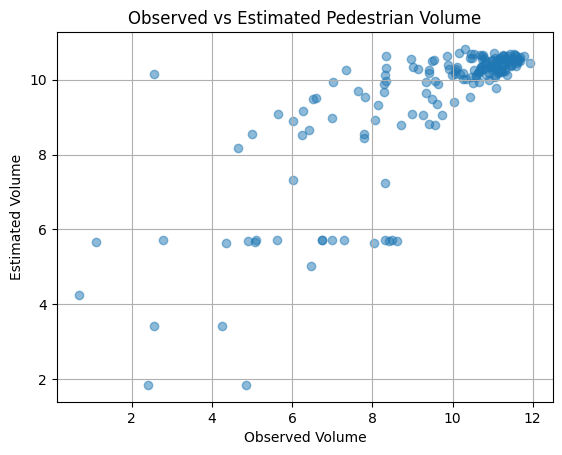

In [ ]:
# With both closeness and integration
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["log_est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()


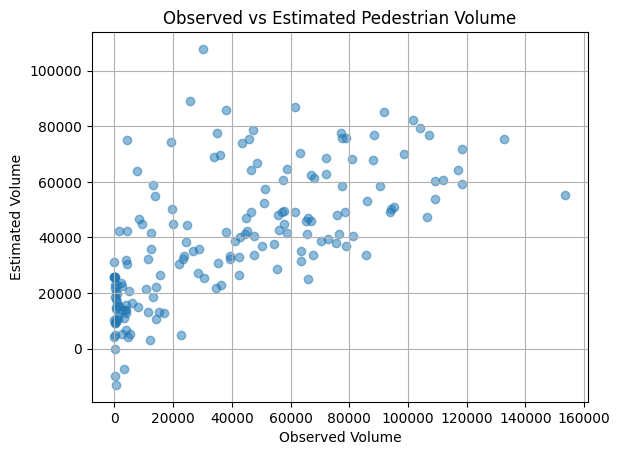

In [ ]:
# With only integration
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["log_est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()


In [ ]:
# Connectivity

In [ ]:
# Undirected degree
connectivity_dict = dict(G.degree())

# Add to node GeoDataFrame
nodes_gdf["connectivity"] = nodes_gdf.index.map(connectivity_dict)

In [ ]:
# Make sure CRS matches
nodes_gdf = nodes_gdf.to_crs(updated_grid.crs)

# Spatial join nodes to grids
joined = gpd.sjoin(nodes_gdf[["geometry", "connectivity"]], grid_gdf[["grid_id", "geometry"]], how="inner", predicate="within")

# Aggregate to grid level
connectivity_stats = (
    joined.groupby("grid_id")["connectivity"]
    .agg(["mean", "max", "min"])
    .reset_index()
    .rename(columns={"mean": "mean_connectivity", "max": "max_connectivity", "min": "min_connectivity"})
)

# Merge back to grid_gdf
updated_grid = updated_grid.merge(connectivity_stats, on="grid_id", how="left")


In [ ]:
X = updated_grid[["mean_connectivity"]]
y = updated_grid["point_count"]

In [ ]:
updated_grid[["mean_connectivity"]]

mean_connectivity
0             3.846154
1                  NaN
2             2.000000
3             4.461538
4             5.428571
..                 ...
166           5.989071
167           5.650943
168           6.028571
169           3.600000
170           3.333333

[171 rows x 1 columns]

In [ ]:
updated_grid[['mean_connectivity']] = updated_grid[['mean_connectivity']].fillna(0)
# updated_grid[['mean_closeness', 'closeness_scaled']] = updated_grid[['mean_closeness', 'closeness_scaled']].fillna(0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
updated_grid["connectivity_scaled"] = scaler.fit_transform(updated_grid[["mean_connectivity"]])

In [ ]:
# LOG values

In [ ]:
# Add log of integration fields
updated_grid["log_mean_connectivity"] = np.log1p(updated_grid["mean_connectivity"])  # log1p handles 0s safely
updated_grid.loc[updated_grid["mean_connectivity"] == 0, "log_mean_connectivity"] = 1

In [ ]:
# updated_grid

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["log_max_volume", "log_mean_betweenness", "log_mean_closeness", "log_mean_integration_r400", "log_mean_connectivity"]] # "log_mean_betweenness", "log_mean_closeness", "log_mean_integration_r400", log_mean_connectivity
y = updated_grid["log_point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
delta = model.coef_[3]
# epsilon = model.coef_[3]
zeta = model.coef_[4]

intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"delta (integration 400) = {delta:.4f}")
# print(f"epsilon (integration 1200) = {epsilon:.4f}")
print(f"zeta (connectivity) = {zeta:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.3567
beta (betweenness) = -42.3143
gamma (closeness) = 2.0037
delta (integration 400) = 42.3680
zeta (connectivity) = 5.4169
intercept = -4.42


In [ ]:
updated_grid["log_est_volume"] = (
    alpha * updated_grid["log_max_volume"] +
    beta * updated_grid["log_mean_betweenness"] +
    gamma * updated_grid["log_mean_closeness"] +
    delta * updated_grid["log_mean_integration_r400"] +
    # epsilon * updated_grid["log_mean_integration_r1200"] +
    zeta * updated_grid["log_mean_connectivity"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["log_est_volume"])
mae = mean_absolute_error(y, updated_grid["log_est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.658
Mean Absolute Error: 0.94


In [ ]:
updated_grid["est_volume"] = updated_grid["log_est_volume"].apply(
    lambda x: np.expm1(x) if x != 1 else 0
)

In [ ]:
updated_grid[updated_grid['est_volume'] < 0]

Empty GeoDataFrame
Columns: [grid_id, geometry, centroid, origin, point_count, VALUE_sum, max_volume, sum, category, log_point_count, log_VALUE_sum, log_max_volume, mean_betweenness, max_betweenness, betweenness_scaled, max_volume_scaled, point_count_scaled, VALUE_sum_scaled, log_mean_betweenness, log_est_volume, est_volume, mean_closeness, max_closeness, closeness_scaled, log_mean_closeness, mean_integration_r400, max_integration_r400, integration_r400_scaled, log_mean_integration_r400, mean_connectivity, max_connectivity, min_connectivity, connectivity_scaled, log_mean_connectivity]
Index: []

[0 rows x 34 columns]

In [ ]:
# With Connectivity: R² score: 0.652, Mean Absolute Error: 0.95
# With all above: 0.658, Mean Absolute Error: 0.94

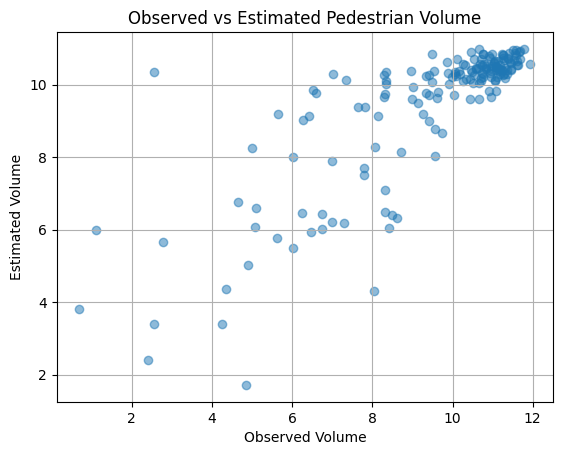

In [ ]:
# With both closeness and integration
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["log_est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()


In [ ]:
# Regular values

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["max_volume", "betweenness_scaled", "closeness_scaled", "integration_r400_scaled", "connectivity_scaled"]] # "log_mean_betweenness", "log_mean_closeness", "log_mean_integration_r400", "integration_r1200_scaled", log_mean_connectivity
y = updated_grid["point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
delta = model.coef_[3]
# epsilon = model.coef_[4]
zeta = model.coef_[4]

intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"delta (integration 400) = {delta:.4f}")
# print(f"epsilon (integration 1200) = {epsilon:.4f}")
print(f"zeta (connectivity) = {zeta:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.0541
beta (betweenness) = -44493.9192
gamma (closeness) = 65051.3657
delta (integration 400) = -5664.7793
zeta (connectivity) = 20822.6894
intercept = -18305.79


In [ ]:
updated_grid["est_volume"] = (
    alpha * updated_grid["max_volume"] +
    beta * updated_grid["betweenness_scaled"] +
    gamma * updated_grid["closeness_scaled"] +
    delta * updated_grid["integration_r400_scaled"] +
    # epsilon * updated_grid["integration_r1200_scaled"] +
    zeta * updated_grid["connectivity_scaled"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["est_volume"])
mae = mean_absolute_error(y, updated_grid["est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.626
Mean Absolute Error: 17455.04


In [ ]:
updated_grid["est_volume"] = updated_grid["log_est_volume"].apply(
    lambda x: np.expm1(x) if x != 1 else 0
)

In [ ]:
updated_grid[updated_grid['est_volume'] < 0]

Empty GeoDataFrame
Columns: [grid_id, geometry, centroid, origin, point_count, VALUE_sum, max_volume, sum, category, log_max_volume, log_point_count, log_VALUE_sum, mean_betweenness, max_betweenness, betweenness_scaled, max_volume_scaled, point_count_scaled, VALUE_sum_scaled, log_mean_betweenness, log_est_volume, est_volume, mean_closeness, max_closeness, closeness_scaled, log_mean_closeness, mean_integration_r400, max_integration_r400, mean_integration_r1200, max_integration_r1200, integration_r400_scaled, integration_r1200_scaled, log_mean_integration_r400, log_mean_integration_r1200, mean_connectivity, max_connectivity, min_connectivity, connectivity_scaled, log_mean_connectivity]
Index: []

[0 rows x 38 columns]

In [ ]:
# With Connectivity: R² score: 0.447, Mean Absolute Error: 19950.79
# With all above: 0.624, Mean Absolute Error: 17641.01

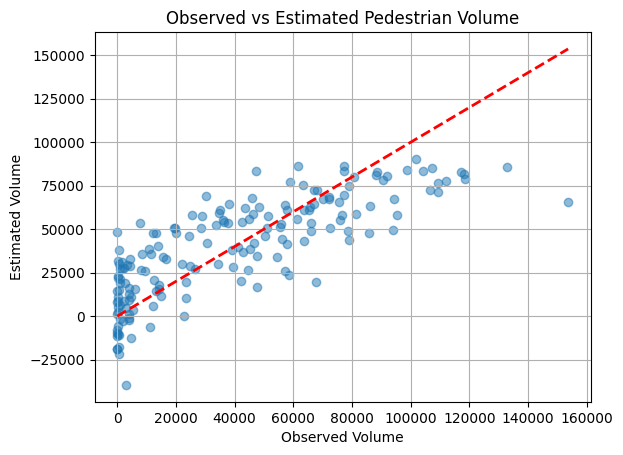

In [ ]:
# With both closeness and integration
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Perfect Fit Line")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()


In [ ]:
# Population density

In [ ]:
updated_grid["pop_density"] = updated_grid["VALUE_sum"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
updated_grid["pop_density_scaled"] = scaler.fit_transform(updated_grid[["pop_density"]])

In [ ]:
# X = updated_grid[["mean_closeness", "pop_density"]] # "mean_integration_r400",
# y = updated_grid["observed_volume"]
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["max_volume", "betweenness_scaled", "closeness_scaled", "integration_r400_scaled", "connectivity_scaled", "pop_density"]] # "pop_density",
y = updated_grid["point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
delta = model.coef_[3]
epsilon = model.coef_[4]
zeta = model.coef_[5]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"delta (integration) = {delta:.4f}")
print(f"epsilon (pop density) = {delta:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.1204
beta (betweenness) = -51143.1919
gamma (closeness) = 65528.9925
delta (integration) = -4103.3067
epsilon (pop density) = -4103.3067
intercept = -17842.67


In [ ]:
updated_grid["est_volume"] = (
    alpha * updated_grid["max_volume"] +
    beta * updated_grid["betweenness_scaled"] +
    gamma * updated_grid["closeness_scaled"] +
    delta * updated_grid["integration_r400_scaled"] +
    epsilon * updated_grid["connectivity_scaled"] +
    zeta * updated_grid["pop_density"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["est_volume"])
mae = mean_absolute_error(y, updated_grid["est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.634
Mean Absolute Error: 17465.67


In [ ]:
# With only pop_density_scaled: R2: 0.413, Mean Absolute Error: 21292.39
# With integration_400+pop_density_scaled: R2: 0.627, Mean Absolute Error: 17687.29
# With integration_400+connectivity+pop_density_scaled: R2: 0.632, Mean Absolute Error: 17453.23

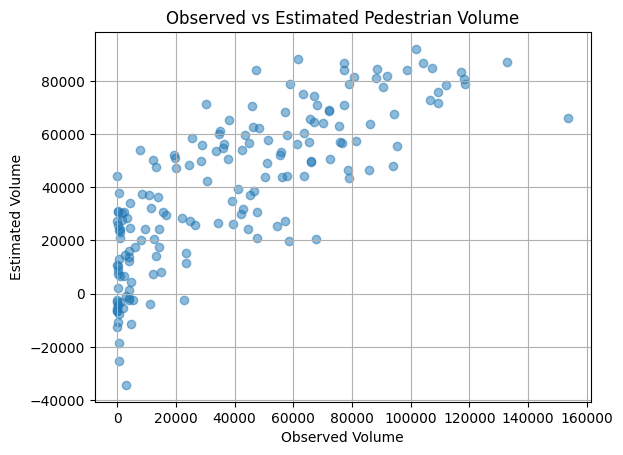

In [ ]:
# With betweenness + closeness + population density
import matplotlib.pyplot as plt

plt.scatter(y, updated_grid["est_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Estimated Volume")
plt.title("Observed vs Estimated Pedestrian Volume")
plt.grid(True)
plt.show()

In [ ]:
# Log values pop_density

In [ ]:
updated_grid['log_VALUE_sum']

0       7.174948
1       1.000000
2       4.912877
3       6.698492
4       5.755966
         ...    
166    10.778110
167    10.645592
168     8.299816
169     1.000000
170     7.341365
Name: log_VALUE_sum, Length: 171, dtype: float64

In [ ]:
# X = updated_grid[["mean_closeness", "pop_density"]] # "mean_integration_r400",
# y = updated_grid["observed_volume"]
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["log_max_volume", "log_mean_betweenness", "log_mean_closeness", "log_mean_integration_r400", "log_mean_connectivity", "log_VALUE_sum"]] # "pop_density",
y = updated_grid["log_point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
delta = model.coef_[3]
epsilon = model.coef_[4]
zeta = model.coef_[5]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"delta (integration) = {delta:.4f}")
print(f"epsilon (pop density) = {delta:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.2707
beta (betweenness) = -48.2131
gamma (closeness) = 2.4169
delta (integration) = 47.9823
epsilon (pop density) = 47.9823
intercept = -3.83


In [ ]:
updated_grid["log_est_volume"] = (
    alpha * updated_grid["log_max_volume"] +
    beta * updated_grid["log_mean_betweenness"] +
    gamma * updated_grid["log_mean_closeness"] +
    delta * updated_grid["log_mean_integration_r400"] +
    epsilon * updated_grid["log_mean_connectivity"] +
    zeta * updated_grid["log_VALUE_sum"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["log_est_volume"])
mae = mean_absolute_error(y, updated_grid["log_est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.668
Mean Absolute Error: 0.92


In [ ]:
# BUILT ENVRONMENT factors:
# street_light, surface: paved/unpaved, footpath presence, smoothness,
# crossing, kerb, deadend

In [ ]:
backup_updated_grid = updated_grid

In [ ]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)
# print(nodes[["street_count"]].head())

In [ ]:
nodes

y          x  street_count highway junction railway  ref                   geometry
osmid                                                                                                   
175610054    28.569235  77.193175             3     NaN      NaN     NaN  NaN  POINT (77.19317 28.56924)
249237060    28.674401  77.216855             4     NaN      NaN     NaN  NaN   POINT (77.21686 28.6744)
249237063    28.679143  77.217981             3     NaN      NaN     NaN  NaN  POINT (77.21798 28.67914)
249237069    28.677008  77.224731             4     NaN      NaN     NaN  NaN  POINT (77.22473 28.67701)
249237075    28.674425  77.225516             3     NaN      NaN     NaN  NaN  POINT (77.22552 28.67442)
...                ...        ...           ...     ...      ...     ...  ...                        ...
12706382523  28.656071  77.229893             3     NaN      NaN     NaN  NaN  POINT (77.22989 28.65607)
12706382528  28.656061  77.230126             1     NaN      NaN     NaN  NaN  POINT (77.23013 28.65606)
12706382537  28.657817  77.230283             3     NaN      NaN     NaN  NaN  POINT (77.23028 28.65782)
12706382541  28.657816  77.230368             1     NaN      NaN     NaN  NaN  POINT (77.23037 28.65782)
12706382542  28.655927  77.230119             1     NaN      NaN     NaN  NaN  POINT (77.23012 28.65593)

[89976 rows x 8 columns]

In [ ]:
edges.count()

osmid       255656
highway     255656
name         28568
oneway      255656
reversed    255656
length      255656
geometry    255656
lanes        10646
junction      1556
bridge        2078
maxspeed      3690
access        8348
service       1068
tunnel         758
width          384
ref           1428
area             8
dtype: int64

In [ ]:
edges_filtered = edges[
    edges[["surface", "lit", "crossing"]].notna().any(axis=1)
]

NameError: name 'edges' is not defined

In [ ]:
import geopandas as gpd

# Make sure both GeoDataFrames are in the same CRS
edges = edges.to_crs(grid_gdf.crs)

# Add flags for sidewalk, paved, lit, crossings
# edges["has_sidewalk"] = edges["sidewalk"].notna()
edges["is_paved"] = edges["surface"].isin(["asphalt", "concrete", "paved"])
edges["is_lit"] = edges["lit"] == "yes"
edges["has_crossing"] = edges["crossing"].notna()

# If width is available and stored as string, convert to float
if "width" in edges.columns:
    edges["width"] = pd.to_numeric(edges["width"], errors="coerce")


KeyError: 'sidewalk'

In [ ]:
# Spatial join: each edge to the grid it intersects
joined_edges = gpd.sjoin(edges, grid_gdf[["grid_id", "geometry"]], how="inner", predicate="intersects")


In [ ]:
# Count total edges and flagged attributes per grid
stats = (
    joined_edges.groupby("grid_id")
    .agg(
        total_edges=("has_sidewalk", "count"),
        sidewalk_edges=("has_sidewalk", "sum"),
        paved_edges=("is_paved", "sum"),
        lit_edges=("is_lit", "sum"),
        crossing_edges=("has_crossing", "sum"),
        avg_width=("width", "mean")
    )
    .reset_index()
)

# Compute percentages
stats["sidewalk_coverage_percent"] = 100 * stats["sidewalk_edges"] / stats["total_edges"]
stats["paved_percent"] = 100 * stats["paved_edges"] / stats["total_edges"]
stats["lit_percent"] = 100 * stats["lit_edges"] / stats["total_edges"]
stats["crossing_percent"] = 100 * stats["crossing_edges"] / stats["total_edges"]


In [ ]:
updated_grid = updated_grid.merge(stats, on="grid_id", how="left")

In [ ]:
total_length=("length", "sum"),
sidewalk_length=("length", lambda x: x[edges["has_sidewalk"]].sum())

In [ ]:
# Weights from paper
w1 = 0.55
w2 = 0.45
df = updated_grid.dropna(subset=["max_volume", "closeness_scaled", "mean_integration_r400_x", "mean_integration_r400_y", "pop_density"]).copy()

In [ ]:
# Scale integration values (to match magnitude of population)
# df["integration_scaled"] = df["mean_integration_r400_x"] * 10_000  # now ranges ~0 to 100

# Proportionally allocate observed volume
df["vol_from_integration"] = df["point_count"] * w1
df["vol_from_density"] = df["point_count"] * w2

# Compute partial coefficients
df["pppi"] = df["vol_from_integration"] / df["closeness_scaled"].replace(0, np.nan)
df["pppd"] = df["vol_from_density"] / df["pop_density"].replace(0, np.nan)

# Weighted averages
vc_integration = (df["pppi"] * df["closeness_scaled"]).sum() / df["closeness_scaled"].sum()
vc_density = (df["pppd"] * df["pop_density"]).sum() / df["pop_density"].sum()

In [ ]:
df["predicted_volume"] = (
    vc_integration * w1 * df["mean_integration_r400_x"] +
    vc_density * w2 * df["pop_density"]
)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(df["point_count"], df["predicted_volume"])
print(f"R² (Integration + Density): {r2:.3f}")

R² (Integration + Density): -0.586


In [ ]:
from sklearn.linear_model import LinearRegression

X = df[["mean_betweenness", "mean_integration_r400_x", "pop_density"]]
y = df["point_count"]

model = LinearRegression().fit(X, y)
print("R² (Closeness + Density):", model.score(X, y))


R² (Closeness + Density): 0.39077200397963585


In [ ]:
# !pip3 install statsmodels

In [ ]:
r2_baseline = r2_score(df["point_count"], df["max_volume"])
print("R² (max_volume vs actual):", r2_baseline)

R² (max_volume vs actual): -38.24949629024083


In [ ]:
import numpy as np
import statsmodels.api as sm

X = df["point_count"]
y = df["max_volume"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             max_volume   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           4.31e-21
Time:                        06:21:11   Log-Likelihood:                -2264.4
No. Observations:                 171   AIC:                             4533.
Df Residuals:                     169   BIC:                             4539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.647e+04   1.56e+04      4.915      0.000    4.58e+04    1.07e+05
point_count     3.1599      0.292     10.830      0.000       2.584       3.736
==============================================================================
Omnibus:                       53.996   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.026
Skew:                           1.479   Prob(JB):                     3.49e-24
Kurtosis:                       5.533   Cond. No.                     7.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df

grid_id                                           geometry  \
0    grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...   
1    grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...   
2    grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...   
3    grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...   
4    grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...   
..            ...                                                ...   
166   grid_id_843  POLYGON ((77.28378 28.68794, 77.29278 28.68794...   
167   grid_id_844  POLYGON ((77.29278 28.68794, 77.30178 28.68794...   
168   grid_id_845  POLYGON ((77.28378 28.57994, 77.29278 28.57994...   
169   grid_id_846  POLYGON ((77.29278 28.57994, 77.30178 28.57994...   
170   grid_id_859  POLYGON ((77.29278 28.57094, 77.30178 28.57094...   

                      centroid                                   origin  \
0    POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)   
1    POINT (77.23428 28.72844)                                     None   
2    POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)   
3    POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)   
4    POINT (77.23428 28.68344)                                     None   
..                         ...                                      ...   
166  POINT (77.28828 28.68344)        (77.288277778, 28.68344444399997)   
167  POINT (77.29728 28.68344)        (77.297277778, 28.68344444399997)   
168  POINT (77.28828 28.57544)        (77.288277778, 28.57544444399996)   
169  POINT (77.29728 28.57544)                                     None   
170  POINT (77.29728 28.56644)        (77.297277778, 28.56644444399997)   

     point_count     VALUE_sum  max_volume   sum  \
0            103   1305.292494        0.00   0.0   
1             69      0.000000        0.00   0.0   
2            125    135.030258        0.00   0.0   
3           2409    810.181548     2430.54   3.0   
4            160      0.000000        0.00   0.0   
..           ...           ...         ...   ...   
166        77358  47958.383851   479583.84  10.0   
167        66937  42006.003127   378054.03   9.0   
168          676   4022.131080    28154.92   7.0   
169         3112      0.000000        0.00   0.0   
170          511   1541.816914     1541.82   1.0   

                                              category  mean_betweenness  ...  \
0                                   [shopping, health]          0.000016  ...   
1                                                   []          0.000000  ...   
2                                             [sports]          0.000000  ...   
3                   [food_and_daily, shopping, health]          0.000015  ...   
4                                                   []          0.000024  ...   
..                                                 ...               ...  ...   
166  [utility, food_and_daily, transportation, educ...          0.000003  ...   
167  [utility, food_and_daily, transportation, educ...          0.000003  ...   
168  [utility, food_and_daily, education, entertain...          0.000014  ...   
169                                                 []          0.000022  ...   
170         [food_and_daily, shopping, health, sports]          0.000007  ...   

     integration_scaled_x  integration_scaled_y   pop_density  \
0                0.046779              0.443729   1305.292494   
1                0.000000              0.000000      0.000000   
2                0.000000              0.532038    135.030258   
3                0.051508              0.552483    810.181548   
4                0.078941              0.599110      0.000000   
..                    ...                   ...           ...   
166              0.001321              0.921567  47958.383851   
167              0.003033              0.847646  42006.003127   
168              0.008781              0.059906   4022.131080

In [ ]:
print(df["point_count"].describe())
print(df["mean_integration_r400_x"].describe())
print(df["pop_density"].describe())

count       171.000000
mean      39386.508772
std       36051.110987
min           1.000000
25%        4121.000000
50%       34809.000000
75%       65773.000000
max      153625.000000
Name: point_count, dtype: float64
count    171.000000
mean       0.000369
std        0.001240
min        0.000000
25%        0.000042
50%        0.000075
75%        0.000173
max        0.013759
Name: mean_integration_r400_x, dtype: float64
count      171.000000
mean     25469.552597
std      20477.264594
min          0.000000
25%       6749.505840
50%      23055.769332
75%      38733.963539
max      86172.825618
Name: pop_density, dtype: float64


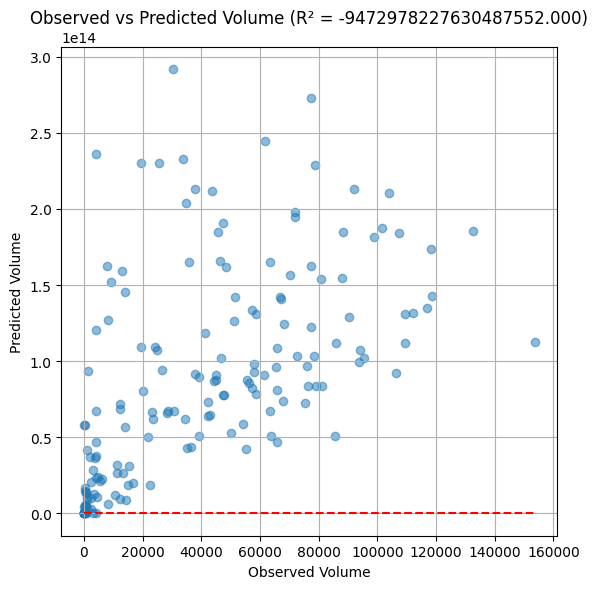

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(df["point_count"], df["predicted_volume"], alpha=0.5)
plt.xlabel("Observed Volume")
plt.ylabel("Predicted Volume")
plt.title(f"Observed vs Predicted Volume (R² = {r2:.3f})")
plt.plot([0, df["point_count"].max()], [0, df["point_count"].max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# updated_grid['max_volume']
updated_grid["log_max_volume"] = np.log1p(updated_grid["max_volume"])  # log1p handles 0s safely
updated_grid.loc[updated_grid["max_volume"] == 0, "log_max_volume"] = 1

In [ ]:
# updated_grid['max_volume']
updated_grid["log_point_count"] = np.log1p(updated_grid["point_count"])  # log1p handles 0s safely
updated_grid.loc[updated_grid["point_count"] == 0, "log_point_count"] = 1

In [ ]:
updated_grid

grid_id                                           geometry                   centroid                                   origin  point_count     VALUE_sum  max_volume   sum                                           category  log_max_volume  ...  integration_r1200_scaled  log_mean_integration_r400  log_mean_integration_r1200  mean_connectivity  max_connectivity  min_connectivity  connectivity_scaled  log_mean_connectivity   pop_density  pop_density_scaled
0    grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...  POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)          103   1305.292494     1305.29   1.0                       [religion, shopping, health]        7.174946  ...                  0.035957                   0.000643                1.652680e-05           3.846154               6.0               2.0             0.572010               1.578185   1305.292494            0.015147
1    grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...  POINT (77.23428 28.72844)                                     None           69      0.000000        0.00   0.0                                                 []        1.000000  ...                  0.000000                   1.000000                1.000000e+00           0.000000               NaN               NaN             0.000000               1.000000      0.000000            0.000000
2    grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...  POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)          125    135.030258        0.00   0.0                                           [sports]        1.000000  ...                  0.347533                   1.000000                1.597261e-04           2.000000               2.0               2.0             0.297445               1.098612    135.030258            0.001567
3    grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...  POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)         2409    810.181548     3240.73   4.0       [religion, food_and_daily, shopping, health]        8.083862  ...                  0.050653                   0.000708                2.328184e-05           4.461538               8.0               2.0             0.663532               1.697731    810.181548            0.009402
4    grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)   (77.23427777799999, 28.68344444399997)          160    315.070602        0.00   0.0                                         [religion]        1.000000  ...                  0.388980                   0.001086                1.787735e-04           5.428571               6.0               2.0             0.807351               1.860752    315.070602            0.003656
..            ...                                                ...                        ...                                      ...          ...           ...         ...   ...                                                ...             ...  ...                       ...                        ...                         ...                ...               ...               ...                  ...                    ...           ...                 ...
166   grid_id_843  POLYGON ((77.28378 28.68794, 77.29278 28.68794...  POINT (77.28828 28.68344)        (77.288277778, 28.68344444399997)        77358  47958.383851   527542.22  11.0  [safety, transportation, health, shopping, uti...       13.175986  ...                  0.001583                   0.000018                7.276156e-07           5.989071               8.0               2.0             0.890710               1.944348  47958.383851            0.556537
167   grid_id_844  POLYGON ((77.29278 28.68794, 77.30178 28.68794...  POINT (77.29728 28.68344)        (77.297277778, 28.68344444399997)        66937  42006.003127   420060.03  10.0  [safety, transportation, health, shopping, uti...       12.948155  ...             

In [ ]:
updated_grid.to_csv()

',grid_id,geometry,centroid,origin,point_count,VALUE_sum,max_volume,sum,category,log_max_volume,log_point_count,log_VALUE_sum,mean_betweenness,max_betweenness,betweenness_scaled,max_volume_scaled,point_count_scaled,VALUE_sum_scaled,log_mean_betweenness,log_est_volume,est_volume,mean_closeness,max_closeness,closeness_scaled,log_mean_closeness,mean_integration_r400,max_integration_r400,integration_r400_scaled,mean_integration_r1200,max_integration_r1200,integration_r1200_scaled,log_mean_integration_r400,log_mean_integration_r1200,mean_connectivity,max_connectivity,min_connectivity,connectivity_scaled,log_mean_connectivity,pop_density,pop_density_scaled\n0,grid_id_1254,"POLYGON ((77.229777778 28.72394444399997, 77.238777778 28.72394444399997, 77.238777778 28.71494444399997, 77.229777778 28.71494444399997, 77.229777778 28.72394444399997))",POINT (77.234277778 28.719444443999965),"(77.23427777799999, 28.719444443999965)",103,1305.292494,1305.29,1.0,"[\'religion\', \'shopping\', \'health\']"

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["log_max_volume", "betweenness_scaled", "closeness_scaled"]]
y = updated_grid["log_point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.3830
beta (betweenness) = -0.6099
gamma (closeness) = 2.4181
intercept = 4.15


In [ ]:
updated_grid["est_volume"] = (
    alpha * updated_grid["log_max_volume"] +
    beta * updated_grid["betweenness_scaled"] +
    gamma * updated_grid["closeness_scaled"] +
    # delta * updated_grid["pop_density"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["est_volume"])
mae = mean_absolute_error(y, updated_grid["est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.684
Mean Absolute Error: 0.83


In [ ]:
import numpy as np
import statsmodels.api as sm

# X = df["point_count"]
# y = df["max_volume"]

# Add constant for intercept
# X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        log_point_count   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1835.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                   4.06e-128
Time:                        07:43:03   Log-Likelihood:                         -330.53
No. Observations:                 171   AIC:                                      667.1
Df Residuals:                     168   BIC:                                      676.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
log_max_volume         0.5612      0.032     17.536      0.000       0.498       0.624
betweenness_scaled     4.0034      0.680      5.889      0.000       2.661       5.345
closeness_scaled       4.1155      0.553      7.440      0.000       3.023       5.207
==============================================================================
Omnibus:                       43.191   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.446
Skew:                          -0.582   Prob(JB):                     3.26e-79
Kurtosis:                      10.027   Cond. No.                         61.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
import statsmodels.api as sm

# X = df["point_count"]
# y = df["max_volume"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_point_count   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.49e-41
Time:                        07:48:28   Log-Likelihood:                -290.18
No. Observations:                 171   AIC:                             588.4
Df Residuals:                     167   BIC:                             600.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1464      0.413     10.036      0.000       3.331       4.962
log_max_volume         0.3830      0.031     12.379      0.000       0.322       0.444
betweenness_scaled    -0.6099      0.708     -0.861      0.390      -2.008       0.788
closeness_scaled       2.4181      0.470      5.148      0.000       1.491       3.345
==============================================================================
Omnibus:                       80.342   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.951
Skew:                          -1.538   Prob(JB):                    2.36e-130
Kurtosis:                      11.621   Cond. No.                         83.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
import statsmodels.api as sm

X = updated_grid["point_count"]
y = updated_grid["max_volume"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             max_volume   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           4.31e-21
Time:                        07:58:56   Log-Likelihood:                -2264.4
No. Observations:                 171   AIC:                             4533.
Df Residuals:                     169   BIC:                             4539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.647e+04   1.56e+04      4.915      0.000    4.58e+04    1.07e+05
point_count     3.1599      0.292     10.830      0.000       2.584       3.736
==============================================================================
Omnibus:                       53.996   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.026
Skew:                           1.479   Prob(JB):                     3.49e-24
Kurtosis:                       5.533   Cond. No.                     7.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import numpy as np
import statsmodels.api as sm

X = updated_grid["log_max_volume"]
y = updated_grid["log_point_count"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_point_count   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     289.9
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.70e-38
Time:                        08:00:16   Log-Likelihood:                -303.24
No. Observations:                 171   AIC:                             610.5
Df Residuals:                     169   BIC:                             616.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.6405      0.302     15.373      0.000       4.045       5.236
log_max_volume     0.4662      0.027     17.025      0.000       0.412       0.520
==============================================================================
Omnibus:                       60.625   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.210
Skew:                          -1.343   Prob(JB):                     2.51e-48
Kurtosis:                       7.853   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
updated_grid['pop_density'] = updated_grid['VALUE_sum']

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = updated_grid[["log_max_volume", "closeness_scaled", "pop_density_scaled"]] # "betweenness_scaled", "closeness_scaled"
y = updated_grid["log_point_count"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
alpha = model.coef_[0]
beta = model.coef_[1]
gamma = model.coef_[2]
# delta = model.coef_[3]
intercept = model.intercept_

print(f"alpha (pop × poi) = {alpha:.4f}")
print(f"beta (betweenness) = {beta:.4f}")
print(f"gamma (closeness) = {gamma:.4f}")
# print(f"delta (pop density) = {delta:.4f}")
print(f"intercept = {intercept:.2f}")


alpha (pop × poi) = 0.3604
beta (betweenness) = 2.2930
gamma (closeness) = 0.8865
intercept = 4.06


In [ ]:
updated_grid["est_volume"] = (
    alpha * updated_grid["log_max_volume"] +
    beta * updated_grid["closeness_scaled"] +
    # gamma * updated_grid["closeness_scaled"] +
    delta * updated_grid["pop_density_scaled"] +
    intercept
)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, updated_grid["est_volume"])
mae = mean_absolute_error(y, updated_grid["est_volume"])

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.686
Mean Absolute Error: 0.86


In [ ]:
# updated_grid['max_volume']
updated_grid["log_est_volume"] = np.log1p(updated_grid["est_volume"])  # log1p handles 0s safely
updated_grid.loc[updated_grid["est_volume"] == 0, "log_est_volume"] = 1

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
import numpy as np
import statsmodels.api as sm

X = updated_grid["log_est_volume"]
y = updated_grid["log_point_count"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X).fit()
model.summary()  # Check R² and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_point_count   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     350.7
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           4.44e-43
Time:                        08:13:21   Log-Likelihood:                -292.60
No. Observations:                 171   AIC:                             589.2
Df Residuals:                     169   BIC:                             595.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.9606      1.094    -10.022      0.000     -13.120      -8.802
log_est_volume     8.7854      0.469     18.727      0.000       7.859       9.712
==============================================================================
Omnibus:                       78.078   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.175
Skew:                          -1.521   Prob(JB):                    5.53e-115
Kurtosis:                      11.037   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

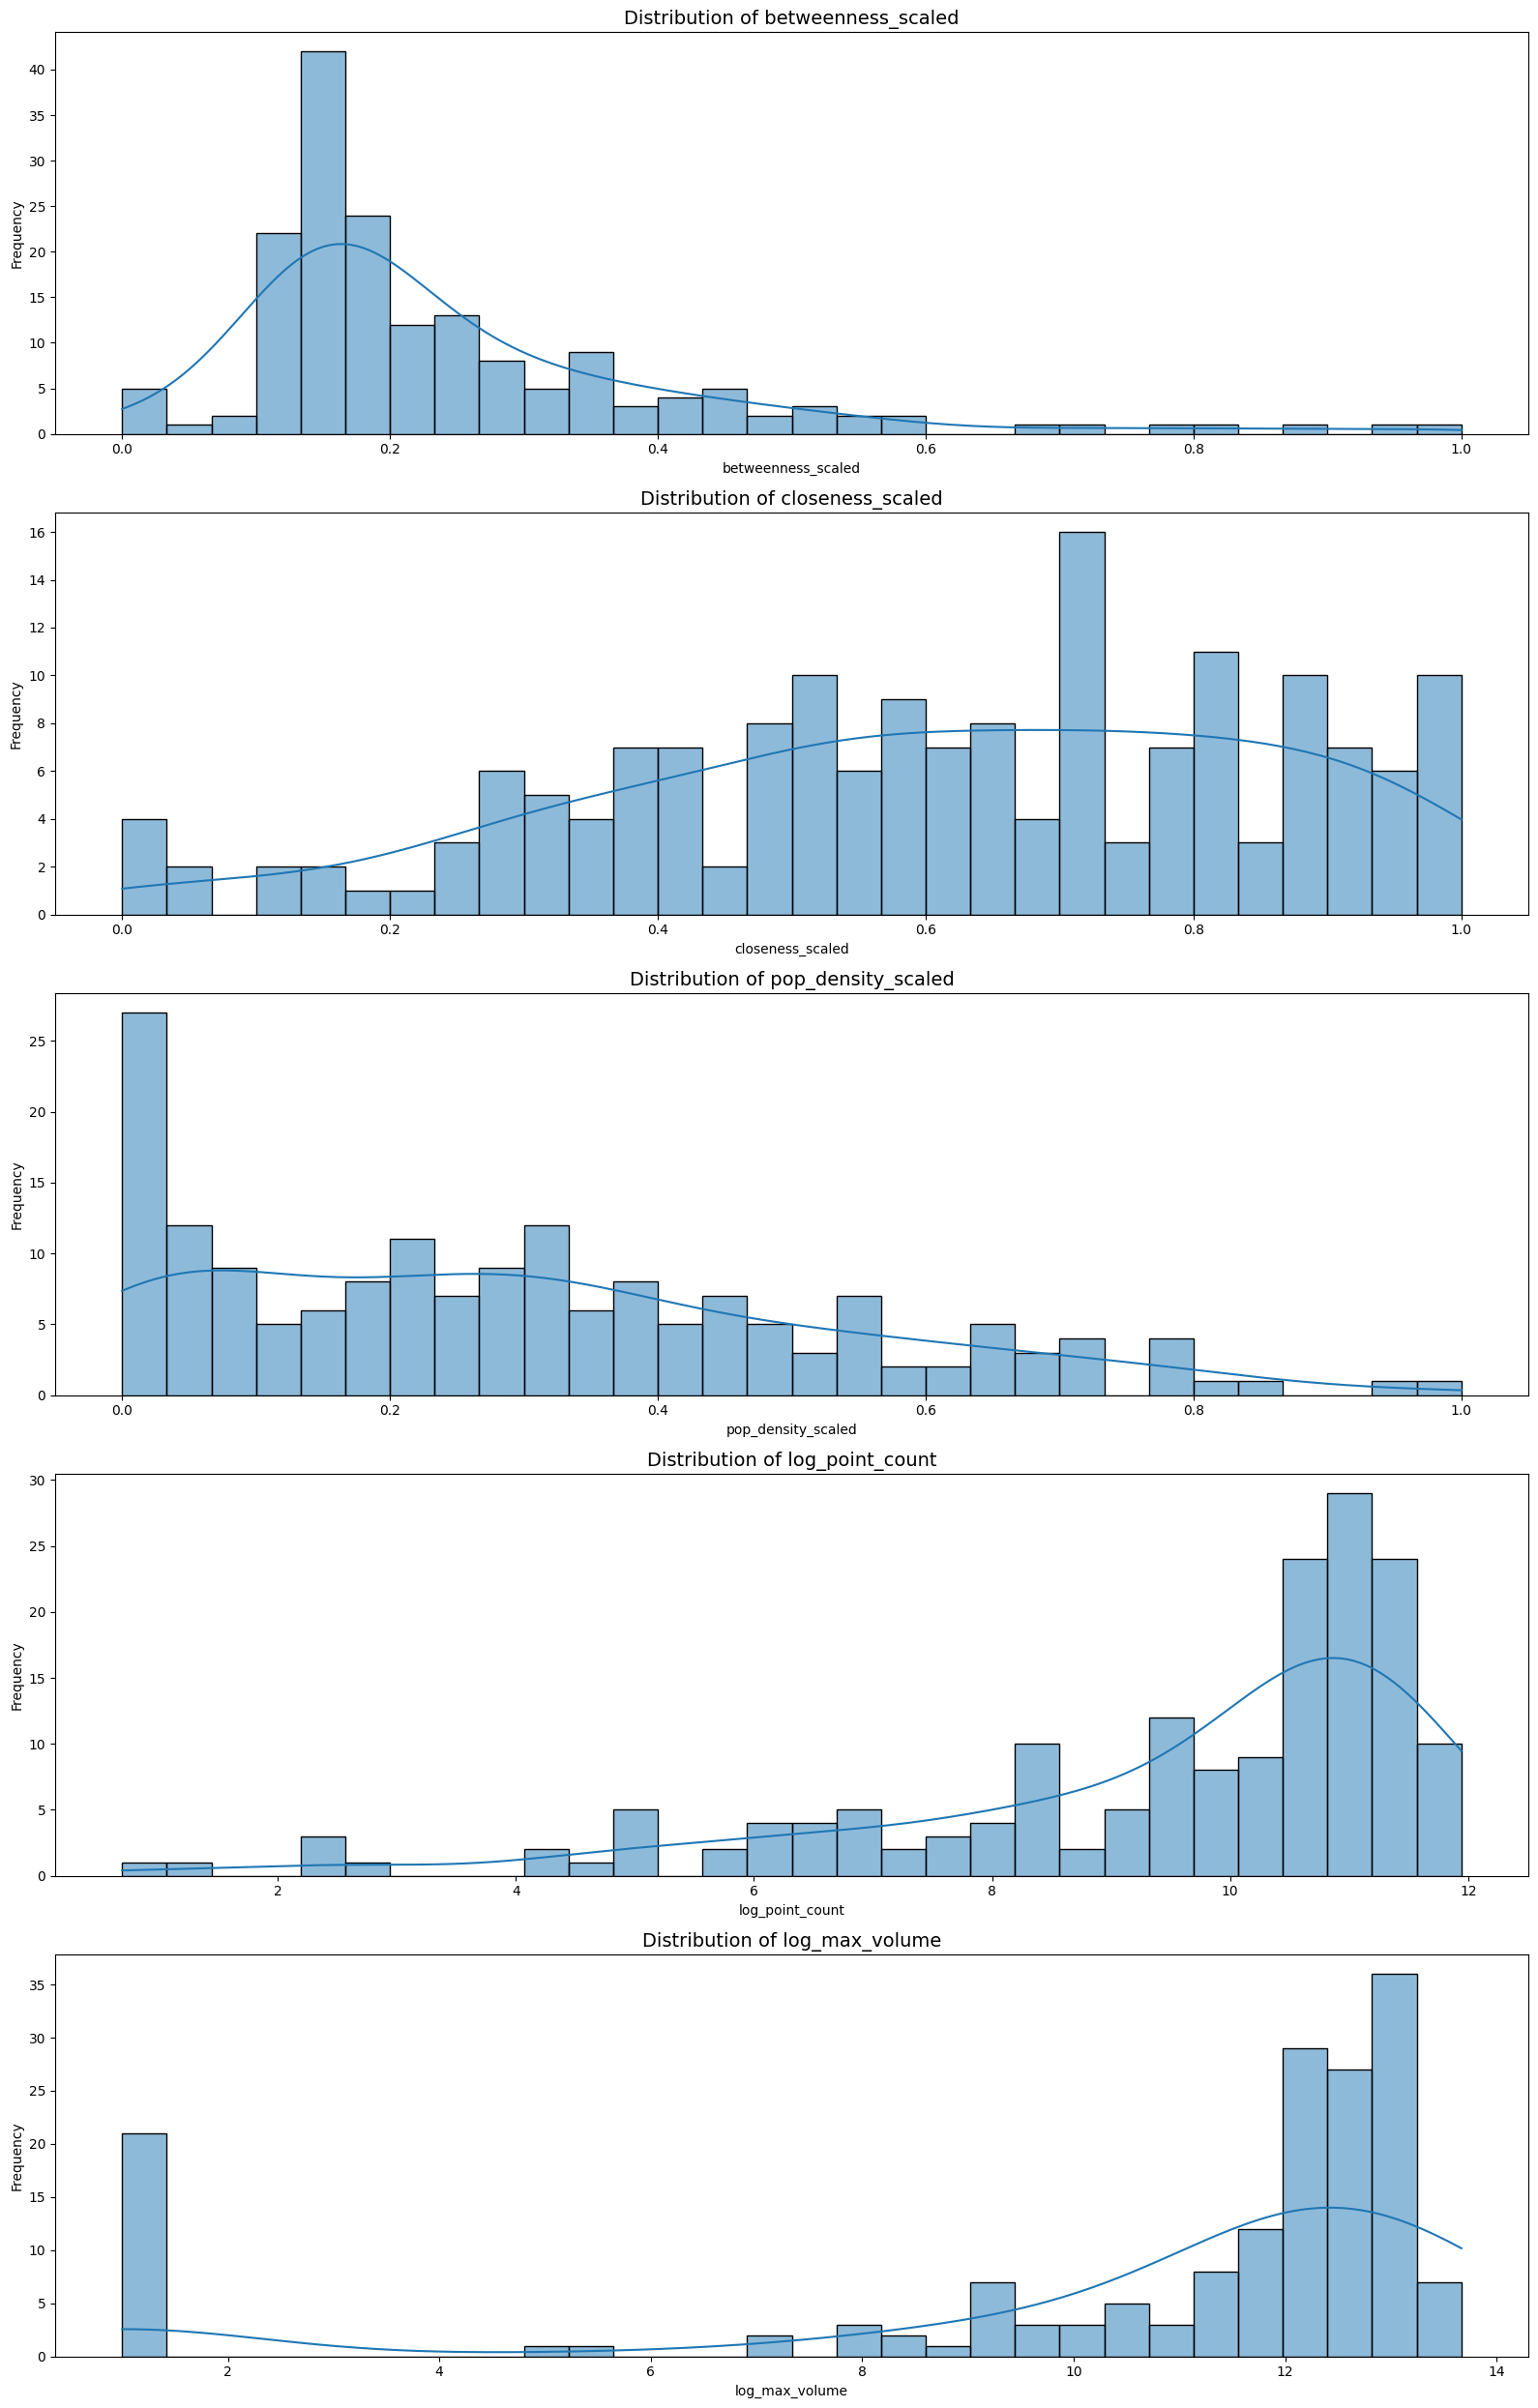

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of variables to plot
columns_to_plot = [
    "betweenness_scaled",
    "closeness_scaled",
    "pop_density_scaled",
    "log_point_count",
    "log_max_volume",        # optional
]

# Set up the figure
plt.figure(figsize=(16, 5 * len(columns_to_plot)))

# Loop over variables
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.histplot(updated_grid[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
# Crash data analysis

In [ ]:
# 1234456

In [ ]:
crash_df = pd.read_csv('/content/delhi_road_victims_2019-21.csv')

In [ ]:
crash_df.count()

Victim_ID              3393
Crash_ID               3393
Sex                    3384
Injury_category        3393
Age                    2714
Date_of_Crash          3372
Day_of_crash           3372
Month_of_crash         3372
Year_of_crash          3393
Time_of_Crash          3221
Hour_of_crash          3221
Minutes_of_crash       3221
Road_user_type         3393
Victim_vehicle_type    3393
Other_vehicle_type     3393
PS_Name                3392
FIR_Number             3381
Place_of_occurence     3393
Latitude               3371
Longitude              3371
Road_Name_DP           3281
weekday                3373
Note                   3375
dtype: int64

In [ ]:
# crash_df

In [ ]:
crash_gdf = gpd.GeoDataFrame(crash_df, geometry=gpd.points_from_xy(crash_df.Longitude, crash_df.Latitude))

In [ ]:
crash_gdf.count()

Victim_ID              3393
Crash_ID               3393
Sex                    3384
Injury_category        3393
Age                    2714
Date_of_Crash          3372
Day_of_crash           3372
Month_of_crash         3372
Year_of_crash          3393
Time_of_Crash          3221
Hour_of_crash          3221
Minutes_of_crash       3221
Road_user_type         3393
Victim_vehicle_type    3393
Other_vehicle_type     3393
PS_Name                3392
FIR_Number             3381
Place_of_occurence     3393
Latitude               3371
Longitude              3371
Road_Name_DP           3281
weekday                3373
Note                   3375
geometry               3393
dtype: int64

In [ ]:
crash_gdf.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
crash_pedestrian_gdf = crash_gdf[crash_gdf['Road_user_type']=='Pedestrian']

In [ ]:
crash_pedestrian_gdf

Victim_ID  Crash_ID      Sex Injury_category   Age Date_of_Crash  Day_of_crash  Month_of_crash  Year_of_crash Time_of_Crash  ...  Other_vehicle_type      PS_Name FIR_Number                                 Place_of_occurence   Latitude  Longitude          Road_Name_DP   weekday                                               Note                   geometry
0          5002    190000     Male           Death   NaN     19-Jan-19          19.0             1.0           2019         22:30  ...       Truck_Tractor  ADARSHNAGAR       14.0         Red Light Azadpur Chowk ,  Minor Roads ,    28.708207  77.178036           MINOR ROADS    Sunday  Victim 1:- Male/Killed\n\nA pedestrian was bee...  POINT (77.17804 28.70821)
1          5003    190001     Male           Death  57.0     13-Feb-19          13.0             2.0           2019           NaN  ...                 Bus  ADARSHNAGAR       35.0        Azadpur Mandi, GTK Road ,  Adarsh Nagar ,    28.714720  77.177160              GTK ROAD  Thursday  Victim 1:- Mohammad Hurra/57/Male/Killed\n\nA ...  POINT (77.17716 28.71472)
2          5004    190002  Unknown           Death   NaN     17-Feb-19          17.0             2.0           2019           NaN  ...             Unknown  ADARSHNAGAR       40.0       Near BP Petrol Pump ,  Azadpur, GTK Road ,    28.710980  77.175160              GTK ROAD    Monday  Victim 1:- Killed\n\nA pedestrian was been hit...  POINT (77.17516 28.71098)
4          5006    190004     Male           Death  29.0     26-Apr-19          26.0             4.0           2019           NaN  ...       Truck_Tractor  ADARSHNAGAR      120.0  GTK Road ,  Towards Jahangir Puri ,  Opposite ...  28.712220  77.174385              GTK ROAD    Sunday  Victim 1:- Aman/29/Male/Killed\n\nA pedestrian...  POINT (77.17438 28.71222)
5          5008    190005     Male           Death  30.0     05-May-19           5.0             5.0           2019         08:30  ...                 MTW  ADARSHNAGAR      131.0  On Road, Azadpur Mandi ,  Near Metr Pillar No....  28.714750  77.172028              GTK ROAD   Tuesday  Victim 1:- 30/Male/Killed\n\nA pedestrian was ...  POINT (77.17203 28.71475)
...         ...       ...      ...             ...   ...           ...           ...             ...            ...           ...  ...                 ...          ...        ...                                                ...        ...        ...                   ...       ...                                                ...                        ...
3380       9870    210768     Male           Death  45.0     13-Mar-21          13.0             3.0           2021         06:50  ...             Unknown   DELHICANNT       70.0  Sanjay T-point ,  On Flyover Towards Dhaula Ku...  28.592290  77.160920                  NH-8    Friday  A pedestrian was been hit by an unknown vehicl...  POINT (77.16092 28.59229)
3383       9875    210771   Female           Death  35.0     13-Apr-21          13.0             4.0           2021         05:30  ...                 MTW   DELHICANNT       97.0  Towards Dwarks and Palam Road ,  Prahaladpur V...  28.587130  77.086320  DWARAKA FLYOVER ROAD    Monday  A pedestrian was been hit by a motorcyclist. T...  POINT (77.08632 28.58713)
3388       9881    210776     Male           Death  45.0     07-Jul-21           7.0             7.0           2021         12:00  ...             Unknown   DELHICANNT      240.0                      Daula Kuan, New Delhi ,   ,    28.594070  77.165840             RING ROAD   Tuesday  A pedestrian was been hit by an unknown vehicl...  POINT (77.16584 28.59407)
3391       9885    210779     Male           Death  18.0     17-Aug-21          17.0             8.0           2021         00:50  ...                 Car   DELHICANNT      274.0             Near Sadar Bazar Metro Station ,   ,    28.576800  77.111300      SADAR THANA MARG    Monday  A pedestrian was been hit by a car driver. The...    POINT (77.1113 28.5768)
3392       9886    21078

In [ ]:
# crash_pedestrian_gdf[crash_pedestrian_gdf.Latitude.isna()== True]

In [ ]:
# fetch lat-long from Place_of_occurrence

In [ ]:
# remove others

In [ ]:
# plot on folium

In [ ]:
crash_pedestrian_gdf[crash_pedestrian_gdf.Latitude.isna()== True]

Victim_ID  Crash_ID      Sex Injury_category   Age Date_of_Crash  Day_of_crash  Month_of_crash  Year_of_crash Time_of_Crash  ...  Other_vehicle_type           PS_Name FIR_Number                                 Place_of_occurence Latitude Longitude  Road_Name_DP   weekday                                               Note         geometry
2581       8568    210001     Male           Death   NaN     23-Jan-21          23.0             1.0           2021         20:30  ...       Truck_Tractor      CHANDNIMAHAL       50.0  near shop no 34 ,  tpt azad pur delhi ,  new d...      NaN       NaN           NaN  Thursday  pedestrian was hit by truck from behind while ...  POINT (NaN NaN)
2750       8844    210162     Male           Death  50.0     04-Dec-21           4.0            12.0           2021         14:00  ...             Unknown  NEWFRIENDSCOLONV      421.0                  Mathura Road ,  Near CNG Pump ,        NaN       NaN           NaN    Friday  One pedestrian was found unconscious on road w...  POINT (NaN NaN)
2816       8952    210223   Female           Death   5.0           NaN           NaN             NaN           2021           NaN  ...             Unknown     PRASHANTVIHAR        NaN                                     NA ,  NA ,  NA      NaN       NaN           NaN       NaN                                                NaN  POINT (NaN NaN)
2853       9015    210259  Unknown           Death   NaN     13-Apr-21          13.0             4.0           2021         23:59  ...             Unknown       PUNJABIBAGH      298.0  Main Road Cement Shedding ,  Broad Line , Delh...      NaN       NaN   MINOR ROADS    Monday  One pedestrian was completely crushed by an un...  POINT (NaN NaN)
3194       9615    210587     Male           Death  45.0           NaN           NaN             NaN           2021           NaN  ...             Unknown            ALIPUR        NaN                                     NA ,  NA ,  NA      NaN       NaN           NaN       NaN                                                NaN  POINT (NaN NaN)
3270       9717    210662     Male           Death  50.0           NaN           NaN             NaN           2021           NaN  ...             Unknown            BAWANA        NaN                                     NA ,  NA ,  NA      NaN       NaN           NaN       NaN                                                NaN  POINT (NaN NaN)
3343       9823    210732     Male           Death   NaN           NaN           NaN             NaN           2021           NaN  ...             Unknown        CIVILLINES        NaN                                     NA ,  NA ,  NA      NaN       NaN           NaN       NaN                                                NaN  POINT (NaN NaN)
3350       9833    210739   Female           Death  40.0           NaN           NaN             NaN           2021           NaN  ...             Unknown    CONNAUGHTPLACE        NaN                                     NA ,  NA ,  NA      NaN       NaN           NaN       NaN                                                NaN  POINT (NaN NaN)

[8 rows x 24 columns]

In [ ]:
crash_pedestrian_no_na_gdf = crash_pedestrian_gdf[crash_pedestrian_gdf.Latitude.isna()== False]

In [ ]:
# plot on folium
map_center_location = (28.62944444399997, 77.07227777799999)
map_5 = folium.Map(location=[map_center_location[0], map_center_location[1]], zoom_start=13)
crash_pedestrian_no_na_gdf.explore(m=map_5, color='red')


In [ ]:
# glm negative binomial

In [ ]:
# join and merge wth grid

In [ ]:
# aggregate no. of crashes

In [ ]:
!cp '/content/drive/My Drive/Thesis_Run/combined_output_poly_centroid_1km.pq' '/content/combined_output_poly_centroid_1km.pq'

In [ ]:
polygons_gdf = gpd.read_parquet("combined_output_poly_centroid_1km.pq")
polygons_gdf.head(5)

id_polygon                                           geometry   VALUE_sum                   centroid    grid_id
0           34  POLYGON ((76.84278 28.57994, 76.85178 28.57994...   409.21868  POINT (76.84728 28.57544)  grid_id_1
1           33  POLYGON ((76.84278 28.58894, 76.85178 28.58894...   220.34852  POINT (76.84728 28.58444)  grid_id_2
14          87  POLYGON ((76.85178 28.57994, 76.86078 28.57994...  2675.66060  POINT (76.85628 28.57544)  grid_id_3
26          35  POLYGON ((76.84278 28.57094, 76.85178 28.57094...   220.34852  POINT (76.84728 28.56644)  grid_id_4
33          36  POLYGON ((76.84278 28.56194, 76.85178 28.56194...   566.61048  POINT (76.84728 28.55744)  grid_id_5

In [ ]:
polygons_gdf = grouped_filtered.copy()
polygons_gdf.head()

grid_id                                           geometry                   centroid                                   origin  point_count    VALUE_sum  max_volume  sum                                      category  log_point_count  log_VALUE_sum  log_max_volume
0  grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...  POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)          103  1305.292494     1305.29  1.0                  [health, religion, shopping]         4.644391       7.174948        7.174946
1  grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...  POINT (77.23428 28.72844)                                     None           69     0.000000        0.00  0.0                                            []         4.248495       1.000000        1.000000
2  grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...  POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)          125   135.030258        0.00  0.0                                      [sports]         4.836282       4.912877        1.000000
3  grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...  POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)         2409   810.181548     3240.73  4.0  [health, food_and_daily, religion, shopping]         7.787382       6.698492        8.083862
4  grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)   (77.23427777799999, 28.68344444399997)          160   315.070602        0.00  0.0                                    [religion]         5.081404       5.755966        1.000000

In [ ]:
# Approach 1 Multiple rows
import geopandas as gpd
from shapely import wkt

# Load the shapefiles
# points_gdf = gpd.read_file('./pop_points/population_points.shp')
points_gdf = crash_pedestrian_no_na_gdf # od_data_end_polygon # od_data_gdf_polygon
# polygons_gdf = gpd.read_file('./od_grid/od_grid.shp') # gpd.read_file('./od_grid/od_grid.shp')
# the above is the od_grid independent
# od_data_gdf_polygon

# points_gdf.set_geometry('start_location').rename_geometry('geometry')

# Ensure the coordinate reference systems (CRS) match
points_gdf = points_gdf.to_crs(polygons_gdf.crs)

print(points_gdf.count())
print()
print(polygons_gdf.count())
print(".................")
# Perform spatial join to attach points to polygons
joined_gdf = gpd.sjoin(points_gdf, polygons_gdf, how='inner', predicate='within')

print("joined_gdf=", joined_gdf.count())


Victim_ID              1746
Crash_ID               1746
Sex                    1743
Injury_category        1746
Age                    1388
Date_of_Crash          1740
Day_of_crash           1740
Month_of_crash         1740
Year_of_crash          1746
Time_of_Crash          1639
Hour_of_crash          1639
Minutes_of_crash       1639
Road_user_type         1746
Victim_vehicle_type    1746
Other_vehicle_type     1746
PS_Name                1746
FIR_Number             1746
Place_of_occurence     1746
Latitude               1746
Longitude              1746
Road_Name_DP           1688
weekday                1740
Note                   1745
geometry               1746
dtype: int64

grid_id            171
geometry           171
centroid           171
origin             162
point_count        171
VALUE_sum          171
max_volume         171
sum                171
category           171
log_point_count    171
log_VALUE_sum      171
log_max_volume     171
dtype: int64
.................
joined_

In [ ]:
# Join the polygons with the points, duplicating polygons for each point
combined_crash_gdf = joined_gdf.merge(polygons_gdf, left_on='index_right', right_index=True, suffixes=('_point', '_polygon'))

print("combined_crash_gdf=", combined_crash_gdf.count())


combined_crash_gdf= Victim_ID                  325
Crash_ID                   325
Sex                        324
Injury_category            325
Age                        263
Date_of_Crash              325
Day_of_crash               325
Month_of_crash             325
Year_of_crash              325
Time_of_Crash              306
Hour_of_crash              306
Minutes_of_crash           306
Road_user_type             325
Victim_vehicle_type        325
Other_vehicle_type         325
PS_Name                    325
FIR_Number                 325
Place_of_occurence         325
Latitude                   325
Longitude                  325
Road_Name_DP               323
weekday                    325
Note                       325
geometry_point             325
index_right                325
grid_id_point              325
centroid_point             325
origin_point               325
point_count_point          325
VALUE_sum_point            325
max_volume_point           325
sum_point          

In [ ]:
combined_crash_gdf.count()

Victim_ID                  325
Crash_ID                   325
Sex                        324
Injury_category            325
Age                        263
Date_of_Crash              325
Day_of_crash               325
Month_of_crash             325
Year_of_crash              325
Time_of_Crash              306
Hour_of_crash              306
Minutes_of_crash           306
Road_user_type             325
Victim_vehicle_type        325
Other_vehicle_type         325
PS_Name                    325
FIR_Number                 325
Place_of_occurence         325
Latitude                   325
Longitude                  325
Road_Name_DP               323
weekday                    325
Note                       325
geometry_point             325
index_right                325
grid_id_point              325
centroid_point             325
origin_point               325
point_count_point          325
VALUE_sum_point            325
max_volume_point           325
sum_point                  325
category_point             325
log_point_count_point      325
log_VALUE_sum_point        325
log_max_volume_point       325
grid_id_polygon            325
geometry_polygon           325
centroid_polygon           325
origin_polygon             325
point_count_polygon        325
VALUE_sum_polygon          325
max_volume_polygon         325
sum_polygon                325
category_polygon           325
log_point_count_polygon    325
log_VALUE_sum_polygon      325
log_max_volume_polygon     325
dtype: int64

In [ ]:
# combined_crash_gdf['point']

In [ ]:
combined_crash_gdf[['origin_point', 'origin_polygon']]

origin_point                           origin_polygon
41         (77.315277778, 28.647444443999966)       (77.315277778, 28.647444443999966)
42         (77.315277778, 28.647444443999966)       (77.315277778, 28.647444443999966)
43     (77.30627777800001, 28.65644444399996)   (77.30627777800001, 28.65644444399996)
45          (77.315277778, 28.65644444399996)        (77.315277778, 28.65644444399996)
46         (77.315277778, 28.647444443999966)       (77.315277778, 28.647444443999966)
...                                       ...                                      ...
3743  (77.27927777799998, 28.665444443999966)  (77.27927777799998, 28.665444443999966)
3744   (77.27927777799998, 28.67444444399997)   (77.27927777799998, 28.67444444399997)
3756  (77.30627777800001, 28.629444443999976)  (77.30627777800001, 28.629444443999976)
3757  (77.30627777800001, 28.638444443999962)  (77.30627777800001, 28.638444443999962)
3776   (77.23427777799999, 28.67444444399997)   (77.23427777799999, 28.67444444399997)

[361 rows x 2 columns]

In [ ]:
# combined_crash_gdf['origin_polygon	']

In [ ]:
# combined_gdf['geometry_point'] = combined_gdf['geometry_point'].apply(wkt.loads)
# combined_gdf['geometry_polygon'] = combined_gdf['geometry_polygon'].apply(wkt.loads)

# combined_gdf['geometry_point'] = combined_gdf['geometry_point'].apply(lambda geom: geom.wkt)
# combined_gdf['geometry_polygon'] = combined_gdf['geometry_polygon'].apply(lambda geom: geom.wkt)
# combined_gdf['fid'] = combined_gdf['fid'].apply(lambda geom: geom.wkt)
# combined_gdf['fid'] = combined_gdf['fid'].astype(int)
# combined_crash_gdf['id_polygon_polygon'] = combined_crash_gdf['id_polygon_polygon'].astype(int)

# Rename columns for clarity
combined_crash_gdf.rename(columns={'geometry_point': 'point', 'geometry_polygon': 'geometry'}, inplace=True)

# combined_gdf['geometry'] = combined_gdf['geometry'].apply(wkt.loads)

# Convert back to GeoDataFrame
combined_crash_gdf = gpd.GeoDataFrame(combined_crash_gdf, geometry='geometry')

# Save the combined GeoDataFrame as a new shapefile
# combined_gdf.to_file('combined_output_poly_1km.shp')

print("Done")

Done


In [ ]:
# # combined_gdf['geometry'] = combined_gdf['centroid_point']
# # combined_gdf = combined_gdf.set_geometry('geometry')
# # combined_gdf.to_crs(epsg=3857, inplace=True)
# pop_gdf = combined_crash_gdf.copy()
# pop_gdf.to_crs(epsg=4326, inplace=True)
# pop_gdf["centroid"] = pop_gdf["geometry"].centroid
# pop_gdf = pop_gdf.set_geometry('centroid')
# pop_gdf.rename(columns={'geometry': 'polygon'}, inplace=True)
# pop_gdf.rename(columns={'id_polygon_polygon': 'id_polygon', 'grid_id_polygon':'grid_id', 'VALUE_sum_polygon':'VALUE_sum', 'centroid': 'geometry'}, inplace=True)
# pop_gdf = pop_gdf.set_geometry('geometry')
# pop_gdf = pop_gdf.drop(columns=['index_right', 'id_polygon_point', 'grid_id_point', 'VALUE_sum_point', 'centroid_point', 'centroid_polygon', 'point'], axis=1)

In [ ]:
crash_gdf_pip = combined_crash_gdf.copy()
crash_gdf_pip.to_crs(epsg=4326, inplace=True)
crash_gdf_pip["centroid"] = crash_gdf_pip["geometry"].centroid
# pop_gdf = pop_gdf.set_geometry('centroid')
# pop_gdf.rename(columns={'geometry': 'polygon'}, inplace=True)
crash_gdf_pip.rename(columns={'grid_id_polygon':'grid_id', 'VALUE_sum_polygon':'VALUE_sum', 'centroid_polygon': 'centroid',
                              'origin_polygon':'origin', 'point_count_polygon': 'point_count', 'VALUE_sum_polygon': 'VALUE_sum',
                              'max_volume_polygon': 'max_volume', 'sum_polygon': 'sum', 'category_polygon': 'category',
                              'log_max_volume_polygon': 'log_max_volume', 'log_point_count_polygon': 'log_point_count',
                              'log_VALUE_sum_polygon': 'log_VALUE_sum'}
                     , inplace=True) # 'id_polygon_polygon': 'id_polygon',
crash_gdf_pip = crash_gdf_pip.set_geometry('geometry')
crash_gdf_pip = crash_gdf_pip.drop(columns=['index_right', 'grid_id_point', 'VALUE_sum_point', 'centroid_point', 'point', 'category_point', 'origin_point', 'point_count_point', 'VALUE_sum_point', 'max_volume_point', 'sum_point', 'log_max_volume_point', 'log_point_count_point', 'log_VALUE_sum_point'], axis=1) # 'id_polygon_point',

<ipython-input-189-1a216654e99e>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  crash_gdf_pip["centroid"] = crash_gdf_pip["geometry"].centroid


In [ ]:
crash_gdf_pip.count()

Victim_ID              325
Crash_ID               325
Sex                    324
Injury_category        325
Age                    263
Date_of_Crash          325
Day_of_crash           325
Month_of_crash         325
Year_of_crash          325
Time_of_Crash          306
Hour_of_crash          306
Minutes_of_crash       306
Road_user_type         325
Victim_vehicle_type    325
Other_vehicle_type     325
PS_Name                325
FIR_Number             325
Place_of_occurence     325
Latitude               325
Longitude              325
Road_Name_DP           323
weekday                325
Note                   325
grid_id                325
geometry               325
centroid               325
origin                 325
point_count            325
VALUE_sum              325
max_volume             325
sum                    325
category               325
log_point_count        325
log_VALUE_sum          325
log_max_volume         325
centroid               325
dtype: int64

In [ ]:
crash_gdf_pip_grouped = (
    crash_gdf_pip.groupby(["geometry", "grid_id"])
    .size()
    .reset_index(name="crash_count")
)

crash_gdf_pip_grouped.head()


geometry      grid_id  crash_count
0  POLYGON ((77.24778 28.62494, 77.25678 28.62494...  grid_id_776            3
1  POLYGON ((77.25678 28.60694, 77.26578 28.60694...  grid_id_738            1
2  POLYGON ((77.26578 28.60694, 77.27478 28.60694...  grid_id_754            1
3  POLYGON ((77.27478 28.61594, 77.28378 28.61594...  grid_id_756            5
4  POLYGON ((77.27478 28.62494, 77.28378 28.62494...  grid_id_760            5

In [ ]:
crash_gdf_pip["category_str"] = crash_gdf_pip["category"].apply(lambda x: ','.join(x) if isinstance(x, list) else str(x))

crash_gdf_pip_grouped = (
    crash_gdf_pip.groupby('geometry')
    .size()
    .reset_index(name="crash_count")
    .merge(crash_gdf_pip[['geometry', 'grid_id', 'VALUE_sum', 'max_volume', 'point_count','sum', 'log_max_volume', 'log_VALUE_sum', 'log_point_count', 'origin', 'category_str']], on='geometry', how='left')
    .drop_duplicates()
)

crash_gdf_pip_grouped.head()

geometry  crash_count      grid_id     VALUE_sum  max_volume  point_count   sum  log_max_volume  log_VALUE_sum  log_point_count                                   origin                                       category_str
0   POLYGON ((77.24778 28.62494, 77.25678 28.62494...            3  grid_id_776   1670.796150    11695.57          279   7.0        9.367051       7.421654         5.634790   (77.25227777799999, 28.62044444399997)  shopping,utility,food_and_daily,religion,healt...
3   POLYGON ((77.25678 28.60694, 77.26578 28.60694...            1  grid_id_738   2547.349684    10189.40         1101   4.0        9.229201       7.843201         7.004882   (77.26127777800001, 28.60244444399997)           religion,food_and_daily,finance,shopping
4   POLYGON ((77.26578 28.60694, 77.27478 28.60694...            1  grid_id_754   2850.717580     8552.15        12281   3.0        9.054055       7.955677         9.415890   (77.27027777800001, 28.60244444399997)  food_and_daily,health,sports,safety,transporta...
5   POLYGON ((77.27478 28.61594, 77.28378 28.61594...            5  grid_id_756  18364.994226    36729.99        34495   2.0       10.511376       9.818256        10.448599  (77.27927777799998, 28.611444443999964)  shopping,food_and_daily,religion,health,sports...
10  POLYGON ((77.27478 28.62494, 77.28378 28.62494...            5  grid_id_760  15037.822638   150378.23        85680  10.0       11.920916       9.618390        11.358386   (77.27927777799998, 28.62044444399997)  shopping,utility,food_and_daily,religion,healt...

In [ ]:
# Columns to keep for merging (excluding unhashable types like lists)
merge_cols = [
    'grid_id', 'VALUE_sum', 'max_volume', 'point_count',
    'sum', 'log_max_volume', 'log_VALUE_sum', 'log_point_count', 'origin', 'geometry', 'category_str'
]

# Step 1: Count crashes per grid_id
crash_counts = crash_gdf_pip.groupby("grid_id").size().reset_index(name="crash_count")

# Step 2: Take first row of each grid_id for merging attributes
crash_info = crash_gdf_pip[merge_cols].drop_duplicates(subset='grid_id')

# Step 3: Merge counts with attributes
crash_gdf_pip_grouped = crash_counts.merge(crash_info, on='grid_id', how='left')

# Step 4: Convert to GeoDataFrame
crash_gdf_pip_grouped = gpd.GeoDataFrame(crash_gdf_pip_grouped, geometry='geometry', crs=crash_gdf_pip.crs)

# Final output
# crash_gdf_pip_grouped.head()


In [ ]:
crash_gdf_pip_grouped.count()

grid_id            104
crash_count        104
VALUE_sum          104
max_volume         104
point_count        104
sum                104
log_max_volume     104
log_VALUE_sum      104
log_point_count    104
origin             104
geometry           104
category_str       104
dtype: int64

In [ ]:
crash_gdf_pip_grouped

grid_id  crash_count     VALUE_sum  max_volume  point_count   sum  log_max_volume  log_VALUE_sum  log_point_count                                   origin                                           geometry                                       category_str
0    grid_id_1254            1   1305.292494     1305.29          103   1.0        7.174946       7.174948         4.644391  (77.23427777799999, 28.719444443999965)  POLYGON ((77.22978 28.72394, 77.23878 28.72394...                           health,religion,shopping
1    grid_id_1282            6   3721.962357    22331.77         3434   6.0       10.013810       8.222275         8.141772   (77.23427777799999, 28.67444444399997)  POLYGON ((77.22978 28.67894, 77.23878 28.67894...  shopping,food_and_daily,religion,health,sports...
2    grid_id_1373            4  38739.415671   426133.57        58733  11.0       12.962510      10.564639        10.980774   (77.26127777800001, 28.68344444399997)  POLYGON ((77.25678 28.68794, 77.26578 28.68794...  shopping,utility,food_and_daily,religion,healt...
3    grid_id_1375            4  19817.192835   178354.74        28764   9.0       12.091535       9.894356        10.266915  (77.25227777799999, 28.692444443999968)  POLYGON ((77.24778 28.69694, 77.25678 28.69694...  shopping,utility,food_and_daily,religion,healt...
4    grid_id_1376            2  56255.257080   562552.57        47320  10.0       13.240242      10.937673        10.764709  (77.26127777800001, 28.692444443999968)  POLYGON ((77.25678 28.69694, 77.26578 28.69694...  shopping,utility,food_and_daily,religion,healt...
..            ...          ...           ...         ...          ...   ...             ...            ...              ...                                      ...                                                ...                                                ...
99    grid_id_835            1  21328.621626   191957.59        75490   9.0       12.165035       9.967852        11.231769       (77.297277778, 28.665444443999966)  POLYGON ((77.29278 28.66994, 77.30178 28.66994...  shopping,utility,food_and_daily,religion,healt...
100   grid_id_836            2  41574.868943   249449.21        67019   6.0       12.427015      10.635275        11.112746        (77.297277778, 28.67444444399997)  POLYGON ((77.29278 28.67894, 77.30178 28.67894...  shopping,utility,food_and_daily,religion,healt...
101   grid_id_839            4  33002.229996   330022.30       109285  10.0       12.706919      10.404361        11.601724   (77.27927777799998, 28.67444444399997)  POLYGON ((77.27478 28.67894, 77.28378 28.67894...  shopping,utility,food_and_daily,religion,healt...
102   grid_id_840           10  39799.442781   437793.87       117058  11.0       12.989506      10.591633        11.670433   (77.27027777800001, 28.67444444399997)  POLYGON ((77.26578 28.67894, 77.27478 28.67894...  shopping,utility,food_and_daily,religion,healt...
103   grid_id_841            6  38940.402932   389404.03       112016  10.0       12.872375      10.569813        11.626406        (77.288277778, 28.67444444399997)  POLYGON ((77.28378 28.67894, 77.29278 28.67894...  shopping,utility,food_and_daily,religion,healt...

[104 rows x 12 columns]

In [ ]:
crash_gdf_pip_grouped[crash_gdf_pip_grouped['grid_id']=='grid_id_801']

Empty GeoDataFrame
Columns: [grid_id, crash_count, VALUE_sum, max_volume, point_count, sum, log_max_volume, log_VALUE_sum, log_point_count, origin, geometry, category_str]
Index: []

In [ ]:
combined_gdf_uniq['grid_id'] = combined_gdf_uniq['grid_id_point']

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
combined_gdf_uniq[combined_gdf_uniq['grid_id']=='grid_id_801']

trip_id                             device_id  start_timestamp start_cell  end_timestamp end_cell  trip_distance_km  trip_duration_hours  trip_speed_kmh  trip_observed_speed_kmh  ... id_polygon_point VALUE_sum_point             centroid_point grid_id_point id_polygon_polygon                                           geometry  VALUE_sum_polygon           centroid_polygon grid_id_polygon      grid_id
0  b67c8db9-3bb4-4881-8994-f3d30bdb1d16322  b67c8db9-3bb4-4881-8994-f3d30bdb1d16     1.689318e+09    ttnfyyx     1689324160  ttnfzp1          1.400275             1.600103        0.875116                 1.881343  ...             2729    12461.666568  POINT (77.30628 28.64744)   grid_id_801               2729  POLYGON ((77.30178 28.65194, 77.31078 28.65194...       12461.666568  POINT (77.30628 28.64744)     grid_id_801  grid_id_801

[1 rows x 26 columns]

In [ ]:
updated_grid[updated_grid['grid_id']=='grid_id_801']

grid_id                                           geometry                   centroid                                   origin  point_count     VALUE_sum  max_volume  sum                                           category  log_point_count  ...  log_mean_closeness  mean_integration_r400  max_integration_r400  integration_r400_scaled  log_mean_integration_r400  mean_connectivity  max_connectivity  min_connectivity  connectivity_scaled  log_mean_connectivity
126  grid_id_801  POLYGON ((77.30178 28.65194, 77.31078 28.65194...  POINT (77.30628 28.64744)  (77.30627777800001, 28.647444443999966)        55336  12461.666568    112155.0  9.0  [shopping, utility, food_and_daily, religion, ...        10.921197  ...        1.090945e-09               0.000097               0.00055                  0.00705                   0.000097            5.41791               8.0               2.0             0.805766               1.859093

[1 rows x 34 columns]

In [ ]:
updated_grid.count()

grid_id                      171
geometry                     171
centroid                     171
origin                       162
point_count                  171
VALUE_sum                    171
max_volume                   171
sum                          171
category                     171
log_point_count              171
log_VALUE_sum                171
log_max_volume               171
mean_betweenness             171
max_betweenness              169
betweenness_scaled           171
max_volume_scaled            171
point_count_scaled           171
VALUE_sum_scaled             171
log_mean_betweenness         171
log_est_volume               171
est_volume                   171
mean_closeness               171
max_closeness                169
closeness_scaled             171
log_mean_closeness           171
mean_integration_r400        171
max_integration_r400         169
integration_r400_scaled      171
log_mean_integration_r400    171
mean_connectivity            171
max_connectivity             169
min_connectivity             169
connectivity_scaled          171
log_mean_connectivity        171
dtype: int64

In [ ]:
combined_gdf_uniq['grid_id'] = combined_gdf_uniq['grid_id_polygon']

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# # Merge crash counts with all grids
# grid_with_crash_counts = combined_gdf_uniq.merge(
#     crash_gdf_pip_grouped[['grid_id', 'geometry', 'VALUE_sum', 'max_volume', 'point_count',
#     'sum', 'log_max_volume', 'log_VALUE_sum', 'log_point_count', 'origin', 'category_str', "crash_count"]],
#     on="grid_id",
#     how="left"
# )

# # Fill NaN crash_count with 0 (for grids without crashes)
# grid_with_crash_counts["crash_count"] = grid_with_crash_counts["crash_count"].fillna(0).astype(int)

# # grid_with_crash_counts.count()

# grid_with_crash_counts.rename(columns={'geometry_x':'geometry'}, inplace=True)

# # # # Convert to GeoDataFrame (if not already)
# grid_with_crash_counts = gpd.GeoDataFrame(grid_with_crash_counts, geometry='geometry', crs=combined_gdf_uniq.crs)

# # # # Final check
# grid_with_crash_counts.head()

# List of all columns you want to merge
columns_to_merge = [
    "grid_id", "crash_count", "VALUE_sum", "max_volume", "point_count", "sum",
    "log_max_volume", "log_VALUE_sum", "log_point_count", "origin", "category_str"
]

# Merge crash data back into full grid_gdf
grid_with_crash_data = updated_grid.merge(
    crash_gdf_pip_grouped[columns_to_merge],
    on="grid_id",
    how="left"
)

# Fill missing crash_count with 0 for grids with no crashes
grid_with_crash_data["crash_count"] = grid_with_crash_data["crash_count"].fillna(0).astype(int)

grid_with_crash_data

# # Optional: Fill other missing columns too, if needed (you can drop this if you want to keep them as NaN)
# fill_zero_cols = ["VALUE_sum", "max_volume", "point_count", "sum", "log_max_volume", "log_VALUE_sum", "log_point_count"]
# grid_with_crash_data[fill_zero_cols] = grid_with_crash_data[fill_zero_cols].fillna(0)

# # Convert to GeoDataFrame (if needed)
# grid_with_crash_data = gpd.GeoDataFrame(grid_with_crash_data, geometry="geometry", crs=updated_grid.crs)

# # Final result
# grid_with_crash_data.head()


grid_id                                           geometry                   centroid                                 origin_x  point_count_x   VALUE_sum_x  max_volume_x  sum_x                                           category  log_point_count_x  ...  crash_count  VALUE_sum_y  max_volume_y  point_count_y  sum_y  log_max_volume_y  log_VALUE_sum_y  log_point_count_y                                 origin_y              category_str
0    grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...  POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)            103   1305.292494       1305.29    1.0                       [health, religion, shopping]           4.644391  ...            1  1305.292494       1305.29          103.0    1.0          7.174946         7.174948           4.644391  (77.23427777799999, 28.719444443999965)  health,religion,shopping
1    grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...  POINT (77.23428 28.72844)                                     None             69      0.000000          0.00    0.0                                                 []           4.248495  ...            0          NaN           NaN            NaN    NaN               NaN              NaN                NaN                                      NaN                       NaN
2    grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...  POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)            125    135.030258          0.00    0.0                                           [sports]           4.836282  ...            0          NaN           NaN            NaN    NaN               NaN              NaN                NaN                                      NaN                       NaN
3    grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...  POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)           2409    810.181548       3240.73    4.0       [health, food_and_daily, religion, shopping]           7.787382  ...            0          NaN           NaN            NaN    NaN               NaN              NaN                NaN                                      NaN                       NaN
4    grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)   (77.23427777799999, 28.68344444399997)            160    315.070602          0.00    0.0                                         [religion]           5.081404  ...            0          NaN           NaN            NaN    NaN               NaN              NaN                NaN                                      NaN                       NaN
..            ...                                                ...                        ...                                      ...            ...           ...           ...    ...                                                ...                ...  ...          ...          ...           ...            ...    ...               ...              ...                ...                                      ...                       ...
166   grid_id_843  POLYGON ((77.28378 28.68794, 77.29278 28.68794...  POINT (77.28828 28.68344)        (77.288277778, 28.68344444399997)          77358  47958.383851     527542.22   11.0  [shopping, utility, food_and_daily, religion, ...          11.256212  ...            0          NaN           NaN            NaN    NaN               NaN              NaN                NaN                                      NaN                       NaN
167   grid_id_844  POLYGON ((77.29278 28.68794, 77.30178 28.68794...  POINT (77.29728 28.68344)        (77.297277778, 28.68344444399997)          66937  42006.003127     420060.03   10.0  [shopping, utility, food_and_daily, religion, ...          11.111522  ...            0          NaN           NaN            NaN    NaN               NaN              NaN                NaN                                      NaN                       NaN
168  

In [ ]:
grid_with_crash_data[grid_with_crash_data['grid_id']=='grid_id_801']

grid_id                                           geometry                   centroid                                 origin_x  point_count_x   VALUE_sum_x  max_volume_x  sum_x                                           category  log_point_count_x  ...  crash_count  VALUE_sum_y  max_volume_y  point_count_y  sum_y  log_max_volume_y  log_VALUE_sum_y  log_point_count_y  origin_y  category_str
126  grid_id_801  POLYGON ((77.30178 28.65194, 77.31078 28.65194...  POINT (77.30628 28.64744)  (77.30627777800001, 28.647444443999966)          55336  12461.666568      112155.0    9.0  [shopping, utility, food_and_daily, religion, ...          10.921197  ...            0          NaN           NaN            NaN    NaN               NaN              NaN                NaN       NaN           NaN

[1 rows x 44 columns]

In [ ]:
grid_with_crash_data[grid_with_crash_data['grid_id']=='grid_id_801'].to_csv()

',grid_id,geometry,centroid,origin_x,point_count_x,VALUE_sum_x,max_volume_x,sum_x,category,log_point_count_x,log_VALUE_sum_x,log_max_volume_x,mean_betweenness,max_betweenness,betweenness_scaled,max_volume_scaled,point_count_scaled,VALUE_sum_scaled,log_mean_betweenness,log_est_volume,est_volume,mean_closeness,max_closeness,closeness_scaled,log_mean_closeness,mean_integration_r400,max_integration_r400,integration_r400_scaled,log_mean_integration_r400,mean_connectivity,max_connectivity,min_connectivity,connectivity_scaled,log_mean_connectivity,crash_count,VALUE_sum_y,max_volume_y,point_count_y,sum_y,log_max_volume_y,log_VALUE_sum_y,log_point_count_y,origin_y,category_str\n126,grid_id_801,"POLYGON ((77.301777778 28.651944443999966, 77.310777778 28.651944443999966, 77.310777778 28.642944443999966, 77.301777778 28.642944443999966, 77.301777778 28.651944443999966))",POINT (77.30627777800001 28.647444443999966),"(77.30627777800001, 28.647444443999966)",55336,12461.666568,112155.0,9.0,"[\'shopp

In [ ]:
grid_with_crash_data.count()

grid_id                      171
geometry                     171
centroid                     171
origin_x                     162
point_count_x                171
VALUE_sum_x                  171
max_volume_x                 171
sum_x                        171
category                     171
log_point_count_x            171
log_VALUE_sum_x              171
log_max_volume_x             171
mean_betweenness             171
max_betweenness              169
betweenness_scaled           171
max_volume_scaled            171
point_count_scaled           171
VALUE_sum_scaled             171
log_mean_betweenness         171
log_est_volume               171
est_volume                   171
mean_closeness               171
max_closeness                169
closeness_scaled             171
log_mean_closeness           171
mean_integration_r400        171
max_integration_r400         169
integration_r400_scaled      171
log_mean_integration_r400    171
mean_connectivity            171
max_connectivity             169
min_connectivity             169
connectivity_scaled          171
log_mean_connectivity        171
crash_count                  171
VALUE_sum_y                  104
max_volume_y                 104
point_count_y                104
sum_y                        104
log_max_volume_y             104
log_VALUE_sum_y              104
log_point_count_y            104
origin_y                     104
category_str                 104
dtype: int64

In [ ]:
grid_with_crash_data.rename(columns={'origin_x':'origin', 'VALUE_sum_x':'VALUE_sum', 'centroid_polygon': 'centroid',
                              'origin_polygon':'origin', 'point_count_x': 'point_count',
                              'max_volume_x': 'max_volume', 'sum_x': 'sum',
                              'log_max_volume_x': 'log_max_volume', 'log_point_count_x': 'log_point_count',
                              'log_VALUE_sum_x': 'log_VALUE_sum', 'geometry_x': 'geometry'}, inplace=True) # 'id_polygon_polygon': 'id_polygon',
grid_with_crash_data = grid_with_crash_data.set_geometry('geometry')
grid_with_crash_data = grid_with_crash_data.drop(columns=['VALUE_sum_y', 'max_volume_y', 'sum_y', 'log_max_volume_y', 'log_VALUE_sum_y', 'log_point_count_y', 'origin_y'], axis=1) # 'id_polygon_point',

In [ ]:
# # crash_gdf_pip = grid_with_crash_counts.copy()
# # crash_gdf_pip.to_crs(epsg=4326, inplace=True)
# # crash_gdf_pip["centroid"] = crash_gdf_pip["geometry"].centroid
# # pop_gdf = pop_gdf.set_geometry('centroid')
# # pop_gdf.rename(columns={'geometry': 'polygon'}, inplace=True)
# grid_with_crash_data.rename(columns={'grid_id_polygon':'grid_id', 'VALUE_sum_polygon':'VALUE_sum', 'centroid_polygon': 'centroid',
#                               'origin_polygon':'origin', 'point_count_polygon': 'point_count', 'VALUE_sum_polygon': 'VALUE_sum',
#                               'max_volume_polygon': 'max_volume', 'sum_polygon': 'sum', 'category_polygon': 'category',
#                               'log_max_volume_polygon': 'log_max_volume', 'log_point_count_polygon': 'log_point_count',
#                               'log_VALUE_sum_polygon': 'log_VALUE_sum', 'geometry_x': 'geometry'}
#                      , inplace=True) # 'id_polygon_polygon': 'id_polygon',
# grid_with_crash_data = grid_with_crash_data.set_geometry('geometry')
# grid_with_crash_data = grid_with_crash_data.drop(columns=['trip_id', 'device_id', 'start_timestamp', 'start_cell', 'end_timestamp', 'end_cell', 'trip_distance_km', 'trip_duration_hours', 'trip_speed_kmh', 'trip_observed_speed_kmh', 'home_cell', 'mode_of_transport', 'start_location', 'end_location', 'point', 'index_right', 'id_polygon_point', 'VALUE_sum_point', 'centroid_point', 'grid_id_point', 'id_polygon_polygon'], axis=1) # 'id_polygon_point',

KeyError: "['trip_id', 'device_id', 'start_timestamp', 'start_cell', 'end_timestamp', 'end_cell', 'trip_distance_km', 'trip_duration_hours', 'trip_speed_kmh', 'trip_observed_speed_kmh', 'home_cell', 'mode_of_transport', 'start_location', 'end_location', 'point', 'index_right', 'id_polygon_point', 'VALUE_sum_point', 'centroid_point', 'grid_id_point', 'id_polygon_polygon'] not found in axis"

In [ ]:
grid_with_crash_data.count()

grid_id                      171
geometry                     171
centroid                     171
origin                       162
point_count                  171
VALUE_sum                    171
max_volume                   171
sum                          171
category                     171
log_point_count              171
log_VALUE_sum                171
log_max_volume               171
mean_betweenness             171
max_betweenness              169
betweenness_scaled           171
max_volume_scaled            171
point_count_scaled           171
VALUE_sum_scaled             171
log_mean_betweenness         171
log_est_volume               171
est_volume                   171
mean_closeness               171
max_closeness                169
closeness_scaled             171
log_mean_closeness           171
mean_integration_r400        171
max_integration_r400         169
integration_r400_scaled      171
log_mean_integration_r400    171
mean_connectivity            171
max_connectivity             169
min_connectivity             169
connectivity_scaled          171
log_mean_connectivity        171
crash_count                  171
point_count_y                104
category_str                 104
dtype: int64

In [ ]:
grid_with_crash_data = grid_with_crash_data.drop(columns=['point_count_y', 'category_str'], axis=1)

In [ ]:
grid_with_crash_data

grid_id                                           geometry                   centroid                                   origin  point_count     VALUE_sum  max_volume   sum                                           category  log_point_count  ...  mean_integration_r400  max_integration_r400  integration_r400_scaled  log_mean_integration_r400  mean_connectivity  max_connectivity  min_connectivity  connectivity_scaled  log_mean_connectivity  crash_count
0    grid_id_1254  POLYGON ((77.22978 28.72394, 77.23878 28.72394...  POINT (77.23428 28.71944)  (77.23427777799999, 28.719444443999965)          103   1305.292494     1305.29   1.0                       [health, religion, shopping]         4.644391  ...               0.000644              0.002665                 0.046779                   0.000643           3.846154               6.0               2.0             0.572010               1.578185            1
1    grid_id_1255  POLYGON ((77.22978 28.73294, 77.23878 28.73294...  POINT (77.23428 28.72844)                                     None           69      0.000000        0.00   0.0                                                 []         4.248495  ...               0.000000                   NaN                 0.000000                   1.000000           0.000000               NaN               NaN             0.000000               1.000000            0
2    grid_id_1277  POLYGON ((77.22978 28.69694, 77.23878 28.69694...  POINT (77.23428 28.69244)  (77.23427777799999, 28.692444443999968)          125    135.030258        0.00   0.0                                           [sports]         4.836282  ...               0.000000              0.000000                 0.000000                   1.000000           2.000000               2.0               2.0             0.297445               1.098612            0
3    grid_id_1280  POLYGON ((77.22978 28.71494, 77.23878 28.71494...  POINT (77.23428 28.71044)   (77.23427777799999, 28.71044444399997)         2409    810.181548     3240.73   4.0       [health, food_and_daily, religion, shopping]         7.787382  ...               0.000709              0.002174                 0.051508                   0.000708           4.461538               8.0               2.0             0.663532               1.697731            0
4    grid_id_1281  POLYGON ((77.22978 28.68794, 77.23878 28.68794...  POINT (77.23428 28.68344)   (77.23427777799999, 28.68344444399997)          160    315.070602        0.00   0.0                                         [religion]         5.081404  ...               0.001086              0.001609                 0.078941                   0.001086           5.428571               6.0               2.0             0.807351               1.860752            0
..            ...                                                ...                        ...                                      ...          ...           ...         ...   ...                                                ...              ...  ...                    ...                   ...                      ...                        ...                ...               ...               ...                  ...                    ...          ...
166   grid_id_843  POLYGON ((77.28378 28.68794, 77.29278 28.68794...  POINT (77.28828 28.68344)        (77.288277778, 28.68344444399997)        77358  47958.383851   527542.22  11.0  [shopping, utility, food_and_daily, religion, ...        11.256212  ...               0.000018              0.000105                 0.001321                   0.000018           5.989071               8.0               2.0             0.890710               1.944348            0
167   grid_id_844  POLYGON ((77.29278 28.68794, 77.30178 28.68794...  POINT (77.29728 28.68344)        (77.297277778, 28.68344444399997)        66937  42006.003127   420060.03  10.0  [shopping, utility, food_and_daily, religion, ...        11.111522  ...               0.000042              0.00077

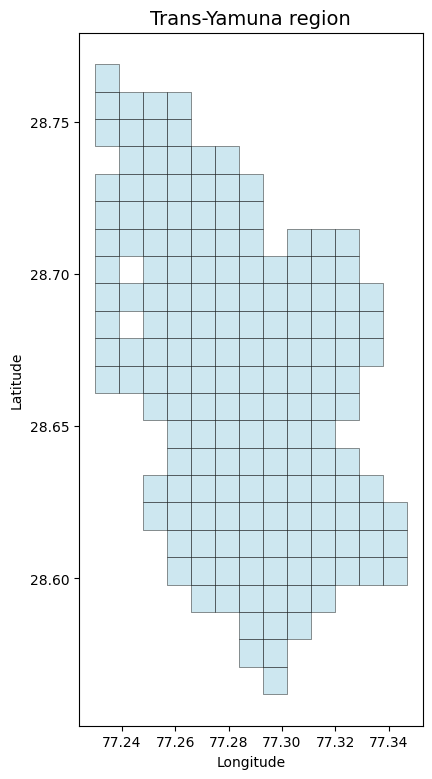

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
grid_with_crash_data.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.6, linewidth=0.5)

# Add titles and labels
ax.set_title("Trans-Yamuna region", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [ ]:
grid_with_crash_data.count()

grid_id                       171
geometry                      171
centroid                      171
origin                        162
point_count                   171
VALUE_sum                     171
max_volume                    171
sum                           171
category                      171
log_max_volume                171
log_point_count               171
log_VALUE_sum                 171
mean_betweenness              171
max_betweenness               169
betweenness_scaled            171
max_volume_scaled             171
point_count_scaled            171
VALUE_sum_scaled              171
log_mean_betweenness          171
log_est_volume                151
est_volume                    171
mean_closeness                171
max_closeness                 169
closeness_scaled              171
log_mean_closeness            171
mean_integration_r400         171
max_integration_r400          169
integration_r400_scaled       171
mean_integration_r1200        171
max_integration_r1200         169
integration_r1200_scaled      171
log_mean_integration_r400     171
log_mean_integration_r1200    171
mean_connectivity             171
max_connectivity              169
min_connectivity              169
connectivity_scaled           171
log_mean_connectivity         171
pop_density                   171
pop_density_scaled            171
crash_count                   171
dtype: int64

In [ ]:
grid_with_crash_data['est_volume']

0       -709.799513
1     -19059.506702
2      22577.816625
3       5448.313556
4      -5034.540490
           ...     
166    84554.751416
167    69979.449622
168   -17855.205895
169   -38821.431789
170   -21847.860336
Name: est_volume, Length: 171, dtype: float64

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "crash_count ~ log_max_volume"

model_nb = smf.glm(formula=formula, data=grid_with_crash_data, family=sm.families.NegativeBinomial())
result_nb = model_nb.fit()

print(result_nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            crash_count   No. Observations:                  171
Model:                            GLM   Df Residuals:                      169
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -300.11
Date:                Thu, 01 May 2025   Deviance:                       170.61
Time:                        12:23:10   Pearson chi2:                     173.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2029
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1184      0.524     -4.

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "crash_count ~ log_est_volume"

model_nb = smf.glm(formula=formula, data=grid_with_crash_data, family=sm.families.NegativeBinomial())
result_nb = model_nb.fit()

print(result_nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            crash_count   No. Observations:                  171
Model:                            GLM   Df Residuals:                      169
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -320.54
Date:                Tue, 29 Apr 2025   Deviance:                       181.94
Time:                        17:02:17   Pearson chi2:                     210.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1463
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2183      0.188     -1.159      0.2

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit full model
model_nb = smf.glm(
    formula="crash_count ~ log_max_volume",
    data=grid_with_crash_data,
    family=sm.families.NegativeBinomial()
).fit()

# Fit null model (intercept only)
null_model_nb = smf.glm(
    formula="crash_count ~ 1",
    data=grid_with_crash_data,
    family=sm.families.NegativeBinomial()
).fit()

# McFadden's Pseudo R²
loglik_full = model_nb.llf
loglik_null = null_model_nb.llf

pseudo_r2 = 1 - (loglik_full / loglik_null)
print(f"McFadden's Pseudo R²: {pseudo_r2:.4f}")


McFadden's Pseudo R²: 0.0607


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [ ]:
null_model = smf.glm(
    formula="crash_count ~ 1",
    data=grid_with_crash_data,
    family=sm.families.NegativeBinomial()
).fit()

pseudo_r2 = 1 - (model_nb.llf / null_model.llf)
print(f"McFadden's Pseudo R²: {pseudo_r2:.3f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


AttributeError: 'GLM' object has no attribute 'llf'

In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict crashes
grid_with_crash_data["predicted_crash_count"] = model_nb.predict(grid_with_crash_data)

# Evaluate
mae = mean_absolute_error(grid_with_crash_data["crash_count"], grid_with_crash_data["predicted_crash_count"])
print(f"Mean Absolute Error: {mae:.2f}")


ValueError: shapes (171,2) and (171,41) not aligned: 2 (dim 1) != 171 (dim 0)

In [ ]:
initial
grid_with_crash_data

geometry     VALUE_sum                   centroid       grid_id       grid_id  crash_count     VALUE_sum  max_volume  point_count   sum  log_max_volume  log_VALUE_sum  log_point_count                                   origin                                       category_str
0    POLYGON ((77.30178 28.65194, 77.31078 28.65194...  12461.666568  POINT (77.30628 28.64744)   grid_id_801   grid_id_801            0      0.000000        0.00          0.0   0.0        0.000000       0.000000         0.000000                                      NaN                                                NaN
1    POLYGON ((77.26578 28.66994, 77.27478 28.66994...  55252.696276  POINT (77.27028 28.66544)   grid_id_837   grid_id_837            0      0.000000        0.00          0.0   0.0        0.000000       0.000000         0.000000                                      NaN                                                NaN
2    POLYGON ((77.30178 28.64294, 77.31078 28.64294...  30439.253892  POINT (77.30628 28.63844)   grid_id_800   grid_id_800            4  30439.253892   213074.78      72644.0   7.0       12.269403      10.323521        11.193340  (77.30627777800001, 28.638444443999962)  finance,transportation,food_and_daily,sports,h...
3    POLYGON ((77.31978 28.60694, 77.32878 28.60694...  19688.072688  POINT (77.32428 28.60244)   grid_id_742   grid_id_742            3  19688.072688   196880.73      23357.0  10.0       12.190358       9.887819        10.058695   (77.32427777800002, 28.60244444399997)  finance,transportation,food_and_daily,safety,s...
4    POLYGON ((77.29278 28.69694, 77.30178 28.69694...  67554.706991  POINT (77.29728 28.69244)  grid_id_1391  grid_id_1391            1  67554.706991   540437.66      78850.0   8.0       13.200136      11.120708        11.275315       (77.297277778, 28.692444443999968)  finance,transportation,food_and_daily,sports,h...
..                                                 ...           ...                        ...           ...           ...          ...           ...         ...          ...   ...             ...            ...              ...                                      ...                                                ...
166  POLYGON ((77.22978 28.75994, 77.23878 28.75994...    857.137314  POINT (77.23428 28.75544)   grid_id_368   grid_id_368            0      0.000000        0.00          0.0   0.0        0.000000       0.000000         0.000000                                      NaN                                                NaN
167  POLYGON ((77.22978 28.66994, 77.23878 28.66994...  17099.468128  POINT (77.23428 28.66544)   grid_id_828   grid_id_828           24  17099.468128   170994.68         12.0  10.0       12.049394       9.746861         2.564949  (77.23427777799999, 28.665444443999966)  finance,transportation,food_and_daily,sports,h...
168  POLYGON ((77.22978 28.75094, 77.23878 28.75094...     90.020172  POINT (77.23428 28.74644)  grid_id_1430  grid_id_1430            0      0.000000        0.00          0.0   0.0        0.000000       0.000000         0.000000                                      NaN                                                NaN
169  POLYGON ((77.24778 28.66094, 77.25678 28.66094...   2419.379864  POINT (77.25228 28.65644)   grid_id_813   grid_id_813            0      0.000000        0.00          0.0   0.0        0.000000       0.000000         0.000000                                      NaN                                                NaN
170  POLYGON ((77.22978 28.76894, 77.23878 28.76894...   1022.822856  POINT (77.23428 28.76444)   grid_id_361   grid_id_361            0      0.000000        0.00          0.0   0.0        0.000000       0.000000         0.000000                                      NaN                                                NaN

[171 rows x 15 columns]

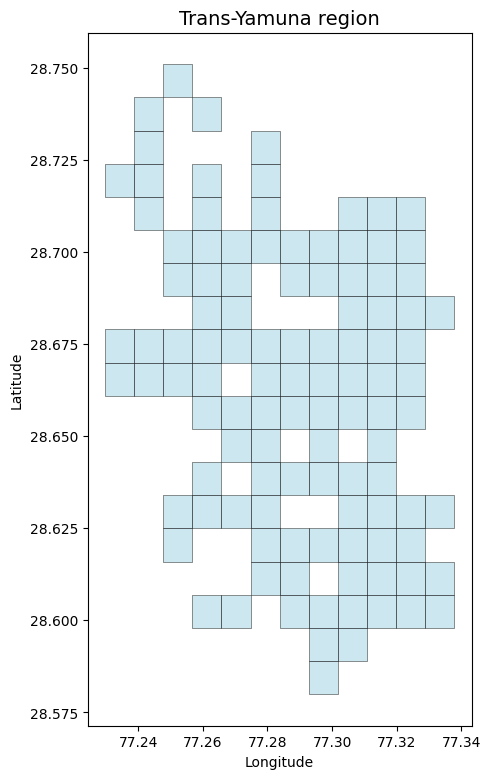

In [ ]:
initial
fig, ax = plt.subplots(figsize=(15, 9))
crash_gdf_pip_grouped.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.6, linewidth=0.5)

# Add titles and labels
ax.set_title("Trans-Yamuna region", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [ ]:
combined_crash_gdf

Victim_ID  Crash_ID     Sex Injury_category   Age Date_of_Crash  Day_of_crash  Month_of_crash  Year_of_crash Time_of_Crash  ...           centroid_polygon                           origin_polygon point_count_polygon VALUE_sum_polygon max_volume_polygon sum_polygon                                   category_polygon log_max_volume_polygon  log_point_count_polygon  log_VALUE_sum_polygon
41         5055    190039    Male           Death   NaN     23-Jan-19          23.0             1.0           2019         18:30  ...  POINT (77.31528 28.64744)       (77.315277778, 28.647444443999966)               20098      23780.599264          237805.99        10.0  [finance, transportation, food_and_daily, safe...              12.379215                 9.908425              10.076667
42         5057    190039    Male           Death   NaN     23-Jan-19          23.0             1.0           2019         18:30  ...  POINT (77.31528 28.64744)       (77.315277778, 28.647444443999966)               20098      23780.599264          237805.99        10.0  [finance, transportation, food_and_daily, safe...              12.379215                 9.908425              10.076667
43         5059    190040    Male           Death  73.0     06-Feb-19           6.0             2.0           2019         18:15  ...  POINT (77.30628 28.65644)   (77.30627777800001, 28.65644444399996)               76438      24763.568180          198108.55         8.0  [finance, transportation, food_and_daily, safe...              12.196575                11.244248              10.117169
45         5061    190042    Male           Death  60.0     15-Oct-19          15.0            10.0           2019         19:30  ...  POINT (77.31528 28.65644)        (77.315277778, 28.65644444399996)               37840      27080.160042          216641.28         8.0  [finance, transportation, food_and_daily, spor...              12.286003                10.541148              10.206594
46         5062    190043    Male           Death  35.0     24-Jun-19          24.0             6.0           2019         00:09  ...  POINT (77.31528 28.64744)       (77.315277778, 28.647444443999966)               20098      23780.599264          237805.99        10.0  [finance, transportation, food_and_daily, safe...              12.379215                 9.908425              10.076667
...         ...       ...     ...             ...   ...           ...           ...             ...            ...           ...  ...                        ...                                      ...                 ...               ...                ...         ...                                                ...                    ...                      ...                    ...
3743      10414    211110  Female           Death  55.0     07-Nov-21           7.0            11.0           2021         14:45  ...  POINT (77.27928 28.66544)  (77.27927777799998, 28.665444443999966)              118540      42205.820897          379852.39         9.0  [finance, transportation, food_and_daily, safe...              12.847541                11.683014              10.650337
3744      10415    211111    Male           Death  36.0     20-Nov-21          20.0            11.0           2021         22:30  ...  POINT (77.27928 28.67444)   (77.27927777799998, 28.67444444399997)              109285      33002.229996          330022.30        10.0  [finance, transportation, food_and_daily, safe...              12.706919                11.601724              10.404361
3756      10430    211123    Male           Death  60.0     20-Oct-21          20.0            10.0           2021         19:53  ...  POINT (77.30628 28.62944)  (77.30627777800001, 28.629444443999976)               65874      31993.118118          287938.06         9.0  [finance, transportation, food_and_daily, spor...              12.570504                11.095514              10.373307
3757      10431    211124    Male           Death  24.0     25-Jul-21       

<Axes: >

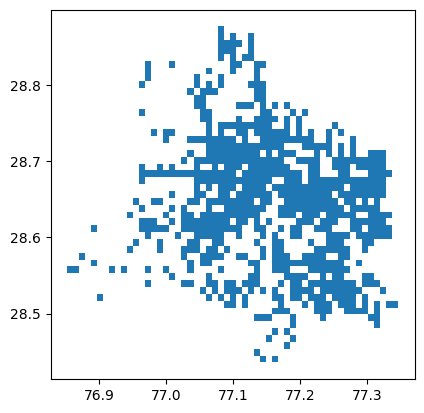

In [ ]:
combined_crash_gdf.plot()

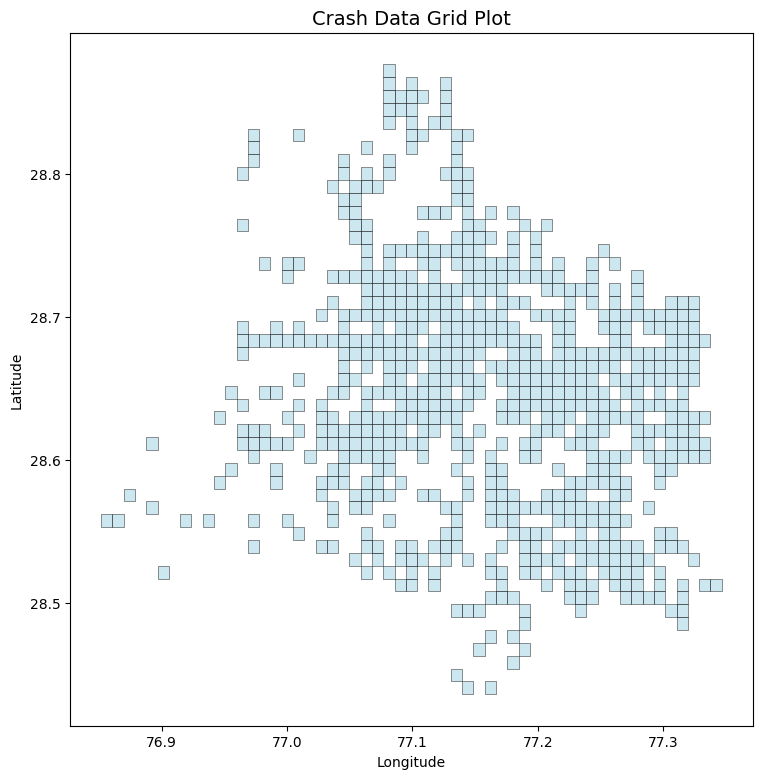

In [ ]:
combined_crash_gdf_uniq = combined_crash_gdf.drop_duplicates(subset="geometry")  # Keep only unique geometries
combined_crash_gdf_uniq.count()

fig, ax = plt.subplots(figsize=(15, 9))
combined_crash_gdf_uniq.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.6, linewidth=0.5)

# Add titles and labels
ax.set_title("Crash Data Grid Plot", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [ ]:
combined_crash_gdf_uniq.count()

Victim_ID              707
Crash_ID               707
Sex                    707
Injury_category        707
Age                    568
Date_of_Crash          704
Day_of_crash           704
Month_of_crash         704
Year_of_crash          707
Time_of_Crash          667
Hour_of_crash          667
Minutes_of_crash       667
Road_user_type         707
Victim_vehicle_type    707
Other_vehicle_type     707
PS_Name                707
FIR_Number             707
Place_of_occurence     707
Latitude               707
Longitude              707
Road_Name_DP           680
weekday                704
Note                   707
point                  707
index_right            707
id_polygon_point       707
VALUE_sum_point        707
centroid_point         707
grid_id_point          707
id_polygon_polygon     707
geometry               707
VALUE_sum_polygon      707
centroid_polygon       707
grid_id_polygon        707
dtype: int64

In [ ]:
pop_gdf_crash_pip = combined_crash_gdf_uniq.copy()
pop_gdf_crash_pip.to_crs(epsg=4326, inplace=True)
pop_gdf_crash_pip["centroid"] = pop_gdf_crash_pip["geometry"].centroid
# pop_gdf = pop_gdf.set_geometry('centroid')
# pop_gdf.rename(columns={'geometry': 'polygon'}, inplace=True)
pop_gdf_crash_pip.rename(columns={'id_polygon_polygon': 'id_polygon', 'grid_id_polygon':'grid_id', 'VALUE_sum_polygon':'VALUE_sum'}, inplace=True)
pop_gdf_crash_pip = pop_gdf_crash_pip.set_geometry('geometry')
pop_gdf_crash_pip = pop_gdf_crash_pip.drop(columns=['index_right', 'id_polygon_point', 'grid_id_point', 'VALUE_sum_point', 'centroid_point', 'centroid_polygon', 'point'], axis=1)

<ipython-input-185-a3be235074fd>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pop_gdf_crash_pip["centroid"] = pop_gdf_crash_pip["geometry"].centroid


In [ ]:
# pop_gdf_crash_pip.count()

In [ ]:
points_per_polygon = pop_gdf_crash_pip.groupby('geometry').size().reset_index(name='point_count')
points_per_polygon

geometry  point_count
0    POLYGON ((76.89678 28.52594, 76.90578 28.52594...            1
1    POLYGON ((76.96878 28.54394, 76.97778 28.54394...            1
2    POLYGON ((77.05878 28.52594, 77.06778 28.52594...            1
3    POLYGON ((77.08578 28.51694, 77.09478 28.51694...            1
4    POLYGON ((77.09478 28.51694, 77.10378 28.51694...            1
..                                                 ...          ...
702  POLYGON ((77.31078 28.51694, 77.31978 28.51694...            1
703  POLYGON ((77.31078 28.50794, 77.31978 28.50794...            1
704  POLYGON ((77.31078 28.48994, 77.31978 28.48994...            1
705  POLYGON ((77.31078 28.49894, 77.31978 28.49894...            1
706  POLYGON ((77.30178 28.49894, 77.31078 28.49894...            1

[707 rows x 2 columns]

In [ ]:
pop_gdf_crash_pip_grouped = (
    pop_gdf_crash_pip.groupby("geometry")
    .size()
    .reset_index(name="crash_count")
    .merge(pop_gdf_pip[['geometry', 'grid_id', 'centroid']], on='geometry', how='left')
    .drop_duplicates()
)

pop_gdf_crash_pip_grouped.head()


geometry  crash_count grid_id centroid
0  POLYGON ((76.89678 28.52594, 76.90578 28.52594...            1     NaN     None
1  POLYGON ((76.96878 28.54394, 76.97778 28.54394...            1     NaN     None
2  POLYGON ((77.05878 28.52594, 77.06778 28.52594...            1     NaN     None
3  POLYGON ((77.08578 28.51694, 77.09478 28.51694...            1     NaN     None
4  POLYGON ((77.09478 28.51694, 77.10378 28.51694...            1     NaN     None

In [ ]:
pop_gdf_crash_pip_grouped = (
    pop_gdf_crash_pip.groupby(["geometry", "grid_id", "centroid"])
    .size()
    .reset_index(name="crash_count")
)

pop_gdf_crash_pip_grouped.head()


geometry       grid_id                   centroid  crash_count
0  POLYGON ((76.89678 28.52594, 76.90578 28.52594...    grid_id_33  POINT (76.90128 28.52144)            1
1  POLYGON ((76.96878 28.54394, 76.97778 28.54394...   grid_id_193  POINT (76.97328 28.53944)            1
2  POLYGON ((77.05878 28.52594, 77.06778 28.52594...  grid_id_1572  POINT (77.06328 28.52144)            1
3  POLYGON ((77.08578 28.51694, 77.09478 28.51694...  grid_id_1584  POINT (77.09028 28.51244)            1
4  POLYGON ((77.09478 28.51694, 77.10378 28.51694...   grid_id_679  POINT (77.09928 28.51244)            1

In [ ]:
# run glm

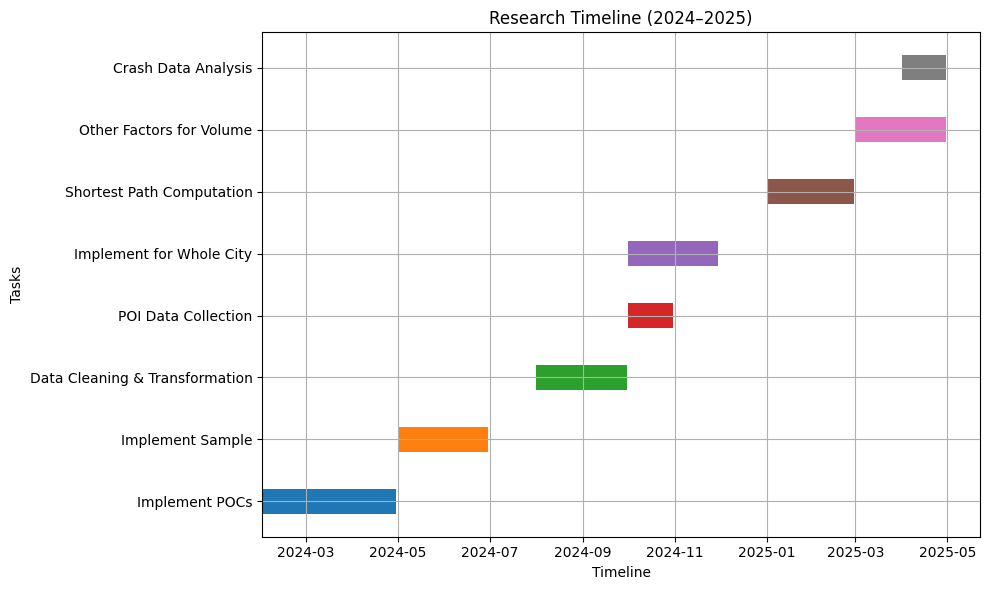

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the research phases with start and end dates
timeline = [
    {"Task": "Implement POCs", "Start": "2024-02-01", "End": "2024-04-30"},
    {"Task": "Implement Sample", "Start": "2024-05-01", "End": "2024-06-30"},
    {"Task": "Data Cleaning & Transformation", "Start": "2024-08-01", "End": "2024-09-30"},
    {"Task": "POI Data Collection", "Start": "2024-10-01", "End": "2024-10-31"},
    {"Task": "Implement for Whole City", "Start": "2024-10-01", "End": "2024-11-30"},
    {"Task": "Shortest Path Computation", "Start": "2025-01-01", "End": "2025-02-28"},
    {"Task": "Other Factors for Volume", "Start": "2025-03-01", "End": "2025-04-30"},
    {"Task": "Crash Data Analysis", "Start": "2025-04-01", "End": "2025-04-30"},
]

# Create a DataFrame
df = pd.DataFrame(timeline)
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])
df["Duration"] = (df["End"] - df["Start"]).dt.days

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))
for idx, row in df.iterrows():
    ax.barh(row["Task"], row["Duration"], left=row["Start"], height=0.4)

ax.set_xlabel("Timeline")
ax.set_ylabel("Tasks")
ax.set_title("Research Timeline (2024–2025)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 2: Approximate betweenness (e.g., sample 500 node pairs)
approx_bc = nx.betweenness_centrality(G, k=500, weight='length', normalized=True, seed=42)

# Step 3: Attach to nodes
for node, val in approx_bc.items():
    G.nodes[node]["betweenness_k500"] = val

In [ ]:
# approx_bc

In [ ]:
# Compute centrality measures
betweenness = nx.betweenness_centrality(G, weight="length", normalized=True)
closeness = nx.closeness_centrality(G, distance="length")  # proxy for integration

In [ ]:
# Add to node-level (e.g., integration)
nodes["integration"] = nodes.index.map(closeness)

# Optional: convert edge-level betweenness (averaging at both ends)
edges["betweenness"] = edges.apply(lambda row:
    (betweenness.get(row.u, 0) + betweenness.get(row.v, 0)) / 2, axis=1)

In [ ]:
import geopandas as gpd

# Load your population grid
# grid = gpd.read_file("your_population_grid.geojson")
grid = combined_gdf_uniq # polygons_gdf

# Spatial join and summarize
joined_others = gpd.sjoin(nodes, grid, how="inner", predicate="within")
grid_summary = joined_others.groupby("grid_id")[["integration"]].mean().reset_index()


In [ ]:
from sklearn.linear_model import LinearRegression

# Suppose you have a DataFrame 'df' with these columns:
# - 'pop_poi': population × POI count
# - 'integration': from space syntax
# - 'betweenness': from space syntax
# - 'volume': observed pedestrian counts

X = df[["pop_poi", "integration", "betweenness"]]
y = df["volume"]  # Actual observed pedestrian volume

# Fit model
model = LinearRegression().fit(X, y)

# Coefficients (weights)
alpha = model.coef_[0]
weight1 = model.coef_[1]
weight2 = model.coef_[2]
intercept = model.intercept_


In [ ]:
est_volume = (
    grid["population"] * grid["poi_sum"]
    + weight1 * grid["integration"]
    + weight2 * grid["betweenness"]
)
